In [1]:
# Modules Required for General Data Analysis / Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Importing other Required Modules 
%matplotlib inline
from pylab import *
import shutil
import sys
import os.path

In [3]:
# Installing 'pyomo'

!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

In [4]:
# Installing 'bonmin' Solver
!wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
!unzip -o -q bonmin-linux64

zsh:1: command not found: wget
unzip:  cannot find or open bonmin-linux64, bonmin-linux64.zip or bonmin-linux64.ZIP.


## **Extracting the Stock Price Data**

**We have chosen the following stocks for our analysis** :

 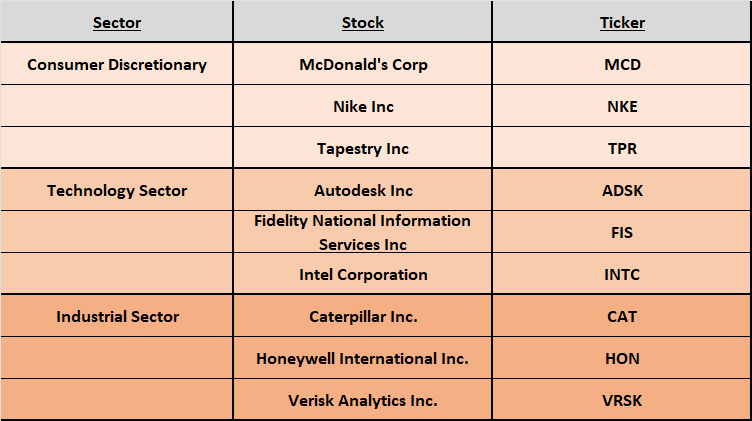

In [5]:
import yfinance as yf

tickers_list = ['NKE', 'MCD', 'TPR', 'INTC', 'ADSK', 'FIS', 'CAT', 'HON', 'VRSK']
dow_prices = {}

for ticker in tickers_list:
    try:
        df = yf.download(ticker, start="2017-01-01", end="2021-12-31", interval="1d")
        if not df.empty:
            dow_prices[ticker] = df
            print(f"{ticker} Downloaded")
        else:
            print(f"{ticker} No data found")
    except Exception as e:
        print(f"{ticker} Error: {e}")

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1438998027.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2017-01-01", end="2021-12-31", interval="1d")
[*********************100%***********************]  1 of 1 completed
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1438998027.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2017-01-01", end="2021-12-31", interval="1d")


NKE Downloaded


[*********************100%***********************]  1 of 1 completed
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1438998027.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2017-01-01", end="2021-12-31", interval="1d")


MCD Downloaded


[*********************100%***********************]  1 of 1 completed
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1438998027.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2017-01-01", end="2021-12-31", interval="1d")


TPR Downloaded


[*********************100%***********************]  1 of 1 completed
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1438998027.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2017-01-01", end="2021-12-31", interval="1d")


INTC Downloaded


[*********************100%***********************]  1 of 1 completed
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1438998027.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2017-01-01", end="2021-12-31", interval="1d")


ADSK Downloaded


[*********************100%***********************]  1 of 1 completed
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1438998027.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2017-01-01", end="2021-12-31", interval="1d")


FIS Downloaded


[*********************100%***********************]  1 of 1 completed
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1438998027.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2017-01-01", end="2021-12-31", interval="1d")


CAT Downloaded


[*********************100%***********************]  1 of 1 completed
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1438998027.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2017-01-01", end="2021-12-31", interval="1d")


HON Downloaded


[*********************100%***********************]  1 of 1 completed

VRSK Downloaded


In [6]:
# Taking a look at the data extracted
dow_prices

{'NKE': Price            Close        High         Low        Open    Volume
 Ticker             NKE         NKE         NKE         NKE       NKE
 Date                                                                
 2017-01-03   46.835640   47.304177   46.646424   46.844652  13295600
 2017-01-04   47.817757   48.070044   46.934746   47.060890  13759500
 2017-01-05   47.808762   47.844800   47.250119   47.682614   8682200
 2017-01-06   48.574619   48.736805   47.736660   47.835774  12532400
 2017-01-09   48.097080   48.646710   47.952915   48.619677   8835300
 ...                ...         ...         ...         ...       ...
 2021-12-23  157.242264  158.656472  157.023968  157.792761   3876900
 2021-12-27  159.055069  159.159474  157.061892  158.048994   3769300
 2021-12-28  157.954102  159.691010  157.840211  159.263905   2658600
 2021-12-29  160.194031  161.162147  158.124936  158.571028   3830900
 2021-12-30  158.969650  161.465850  158.694395  159.747929   2666800
 
 [1258 rows

# **1) Data Preparation and EDA**

In [7]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store the data
prep_data = pd.DataFrame()

# Using all the Tickers to add data to the DataFrame created
for i in tickers_list[0:]:
    prep_data = pd.DataFrame()

for i in tickers_list:
    prep_data[i] = dow_prices[i]['Close']



In [8]:
# Printing the First 5 Rows of the DataFrame
prep_data.head()

NKE        MCD        TPR       INTC       ADSK        FIS  \
Date                                                                           
2017-01-03  46.835640  97.792358  27.838263  29.879776  76.180000  66.551903   
2017-01-04  47.817757  97.677917  28.410557  29.724661  77.519997  67.641220   
2017-01-05  47.808762  97.857758  27.665792  29.675673  76.930000  67.476952   
2017-01-06  48.574619  98.724335  27.861790  29.781809  79.300003  68.203163   
2017-01-09  48.097080  98.454536  27.430607  29.887936  79.589996  67.468307   

                  CAT        HON       VRSK  
Date                                         
2017-01-03  77.108719  93.500549  78.016731  
2017-01-04  76.764145  93.758095  78.630745  
2017-01-05  76.296516  93.967331  78.342941  
2017-01-06  76.329300  95.391830  79.033707  
2017-01-09  75.779671  94.603111  78.410126

In [9]:
# Printing the Shape of the DataFrame
prep_data.shape

(1258, 9)

### **Checking For Missing Values**

In [10]:
# Checking for Missing Values in the DataFrame
prep_data.isnull().sum()

NKE     0
MCD     0
TPR     0
INTC    0
ADSK    0
FIS     0
CAT     0
HON     0
VRSK    0
dtype: int64

**We can see that there are no Missing / Null values in the DataFrame. Hence, no entries have to be removed.**

### **Creating a DataFrame ('return_data') considering the Percentage Difference from the Previous Day as the Return**

In [11]:
# We will be using pct_change as the return

# Creating an Empty DataFrame to Store the Data
return_data = pd.DataFrame()

for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()

In [12]:
# Printing the first 5 rows of the DataFrame
return_data.head()

NKE       MCD       TPR      INTC      ADSK       FIS  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04  0.020969 -0.001170  0.020558 -0.005191  0.017590  0.016368   
2017-01-05 -0.000188  0.001841 -0.026214 -0.001648 -0.007611 -0.002429   
2017-01-06  0.016019  0.008855  0.007084  0.003577  0.030807  0.010762   
2017-01-09 -0.009831 -0.002733 -0.015476  0.003563  0.003657 -0.010775   

                 CAT       HON      VRSK  
Date                                      
2017-01-03       NaN       NaN       NaN  
2017-01-04 -0.004469  0.002754  0.007870  
2017-01-05 -0.006092  0.002232 -0.003660  
2017-01-06  0.000430  0.015160  0.008817  
2017-01-09 -0.007201 -0.008268 -0.007890

In [13]:
# Printing the Shape of the DataFrame
return_data.shape

(1258, 9)

In [14]:
# Dropping Records with NA values
return_data.dropna(inplace=True)

In [15]:
# Printing the Shape of the DataFrame
return_data.shape

(1257, 9)

### **Creating Separate DataFrames for the 3 Sectors**

In [16]:
df_consumer=prep_data[['NKE', 'MCD', 'TPR']] # Consumer Discretionary Sector

In [17]:
df_industrial=prep_data[['CAT', 'HON', 'VRSK']] # Industrial Sector

In [18]:
df_technology=prep_data[['INTC', 'ADSK', 'FIS']] # Technology Sector

### **Visualizing the Time Series**

#### **Consumer Discretionary Sector**


Time Series Plots for Consumer Discretionary Sector:



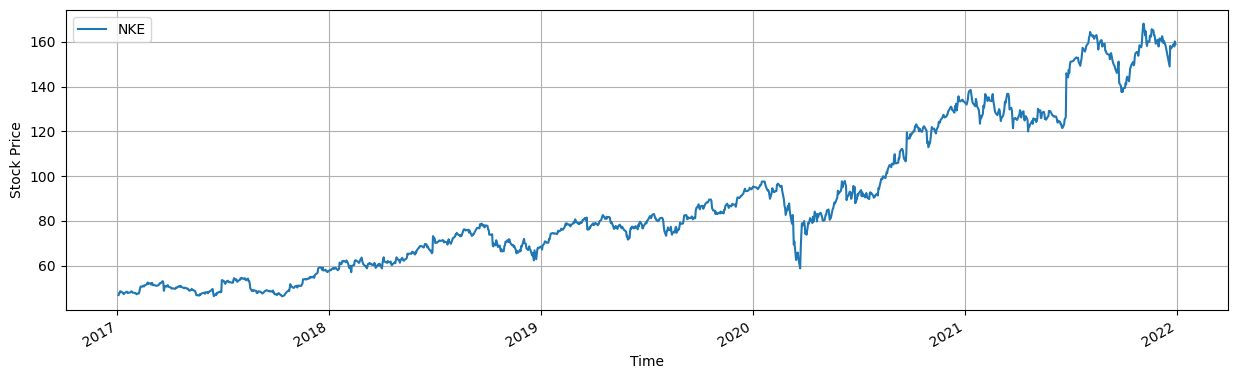

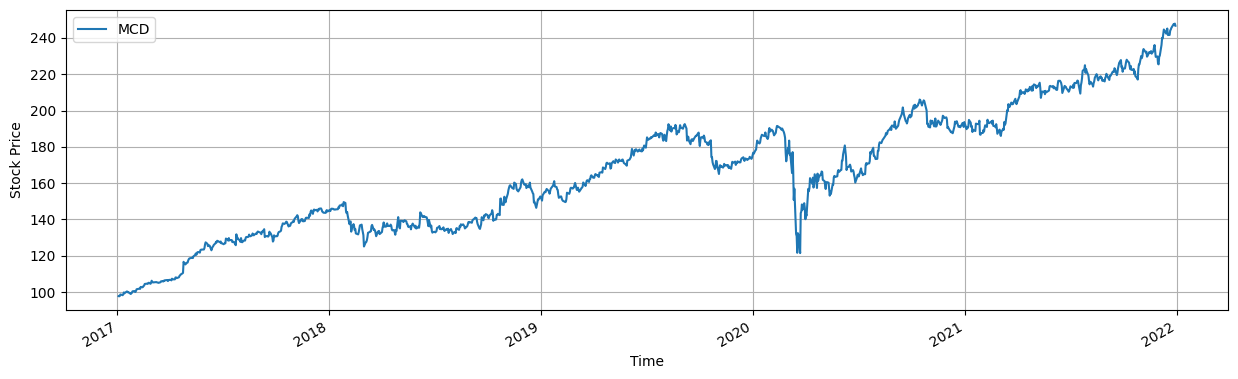

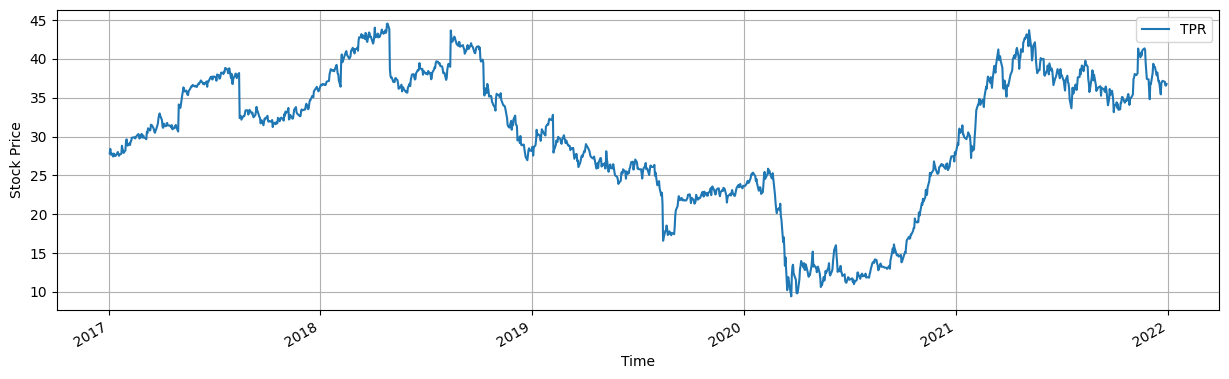

In [19]:
print("\nTime Series Plots for Consumer Discretionary Sector:\n")
for i in list(df_consumer.columns):
  df_consumer[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Stock Price',xlabel='Time',legend=i)
  plt.show()

* Under Consumer Discretionary Sector, for the Nike & McDonald's stocks , we see an overall upwards trend from 2017 to 2021. However, we see a huge dip in the stock prices for these two stocks in the first quarter of 2020 when Covid-19 affected the stock market adversely. Post first quarter of 2020, the stock prices showed an upward trend till 2021 during the recovery of the market from Covid-19.

* On the contrary for Tapestry Inc stocks, the overall trend is neither upward nor downwards.

#### **Industrial Sector**


 Time Series Plots for Industrial Sector:



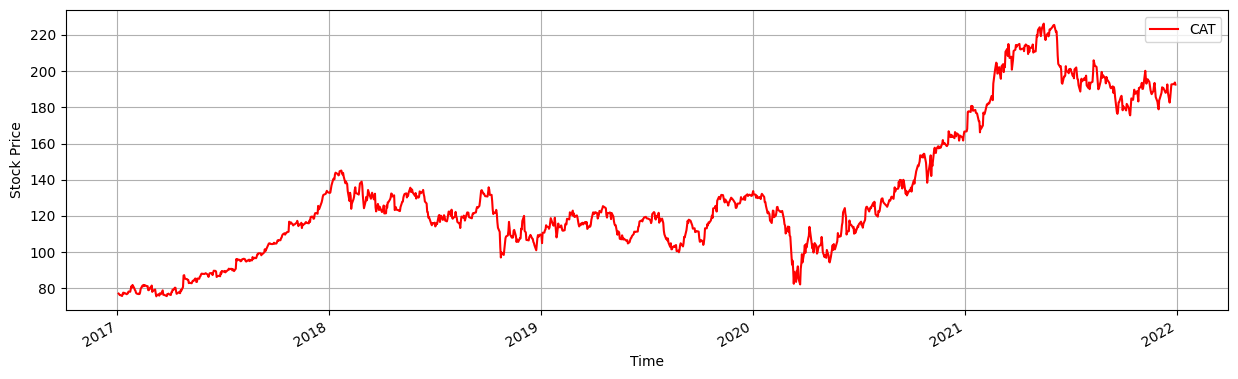

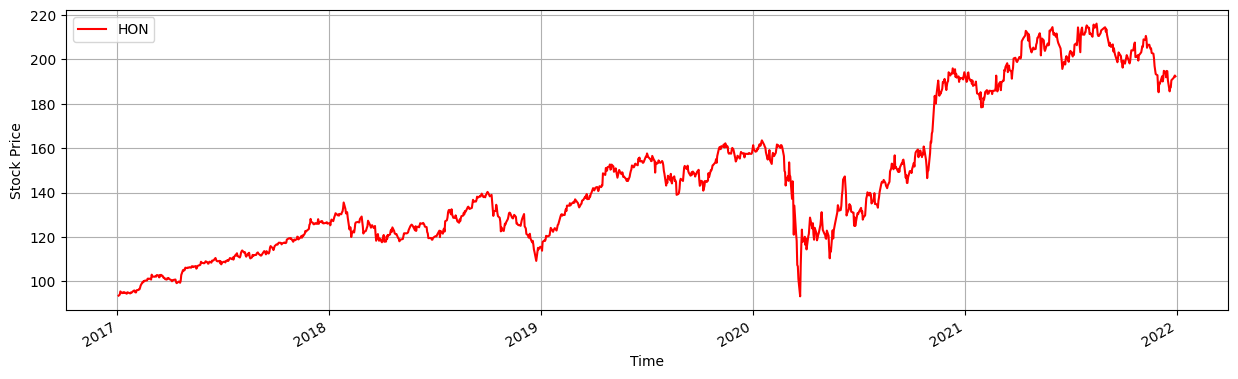

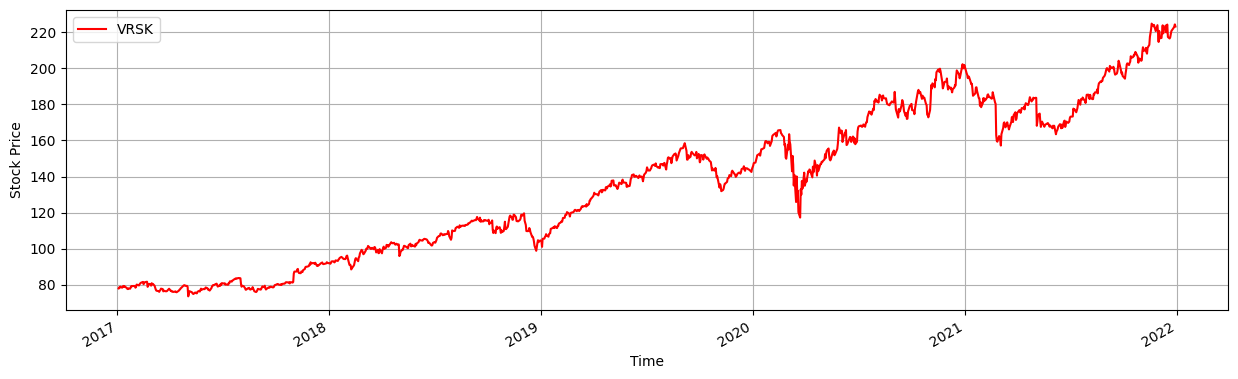

In [20]:
print("\n Time Series Plots for Industrial Sector:\n")
for i in list(df_industrial.columns):
  df_industrial[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Stock Price',xlabel='Time',legend=i,color='red')
  plt.show()

* For the Industrial Sector, we can see that for all the three stocks there is an overall upward trend from 2017 and 2021, with Verisk having the most increase from a value of 80 to 220+. Again, we can see a huge dip in the stock prices in the first quarter of 2020.

#### **Technology Sector**


 Time Series Plots for Technology Sector:



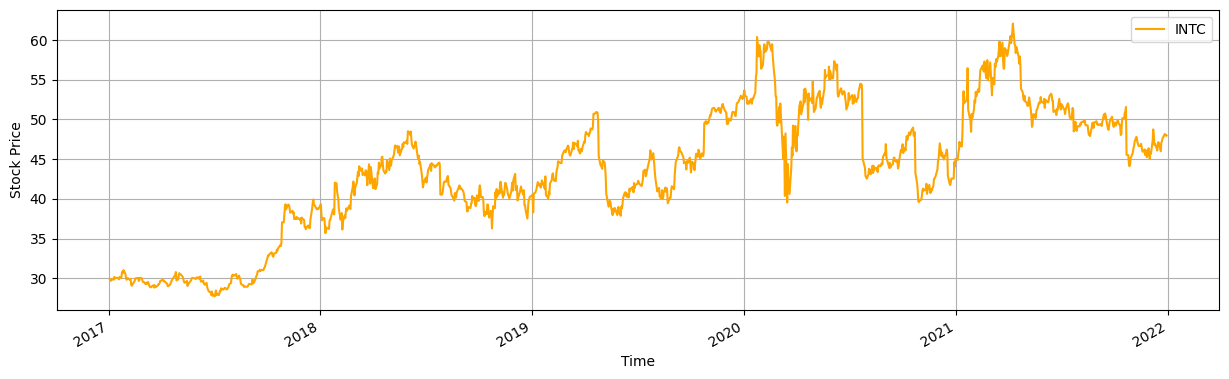

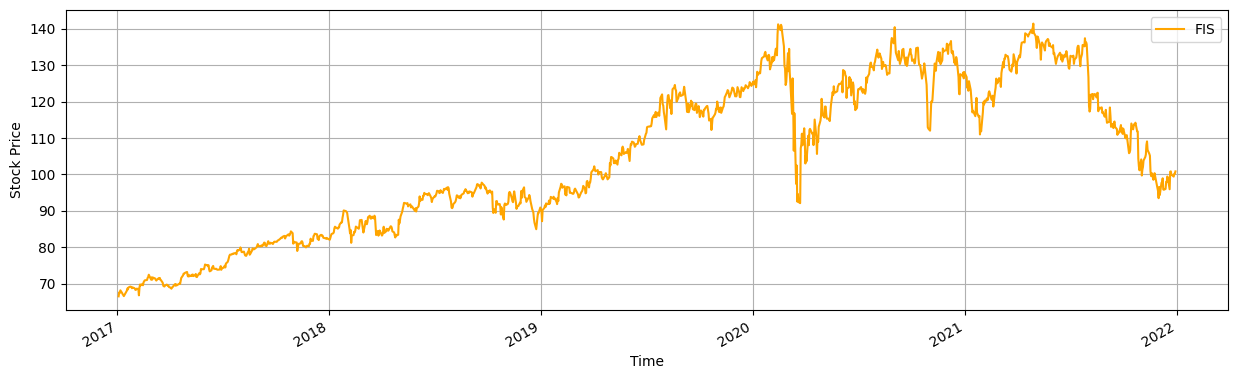

In [21]:
print("\n Time Series Plots for Technology Sector:\n")
for i in list(df_technology.columns):
  df_technology[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Stock Price',xlabel='Time',legend=i,color='orange')
  plt.show()

* For the Technology Sector, again all three stocks have an upward trend with a dip in stock prices in the first quarter of 2020. However, we can see that for Autodesk the dip in stock prices is comparatively smaller when compared to Intel & FIS stocks.

# **2) Optimization Model : Portfolio Allocation**

In [22]:
# Creating a Copy of 'return_data' DataFrame for Daily Returns
df=return_data.copy()

In [23]:
# Creating Separate DataFrames for Daily Returns for the 3 Sectors
df_consumer_ret=df[['NKE', 'MCD', 'TPR']] # Consumer Discretionary Sector
df_industrial_ret=df[['CAT', 'HON', 'VRSK']] # Industrial Sector
df_technology_ret=df[['INTC', 'ADSK', 'FIS']] # Technology Sector

### **Plotting Daily Returns for 3 Sectors**

* **Consumer Discretionary Sector**

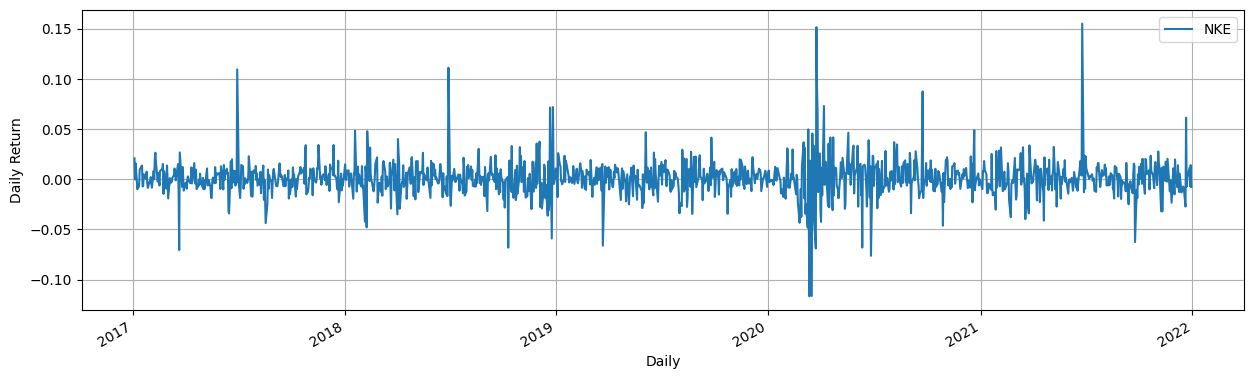

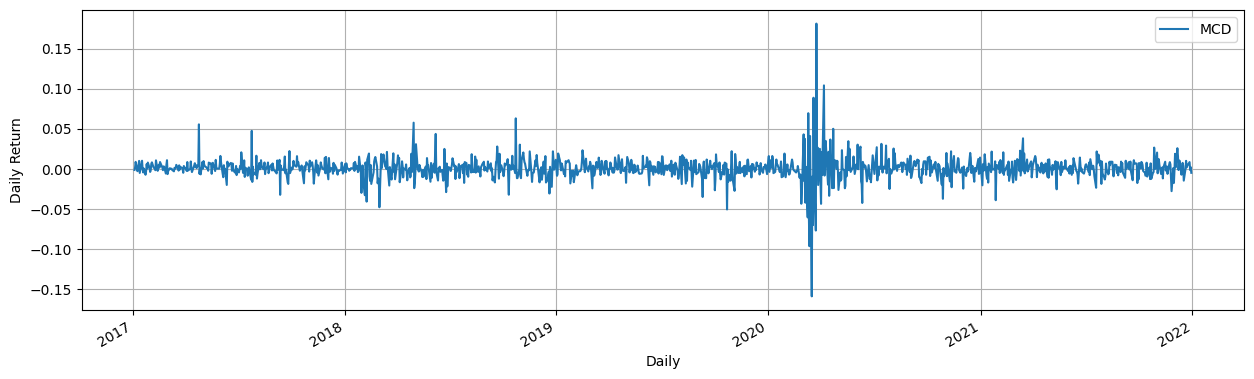

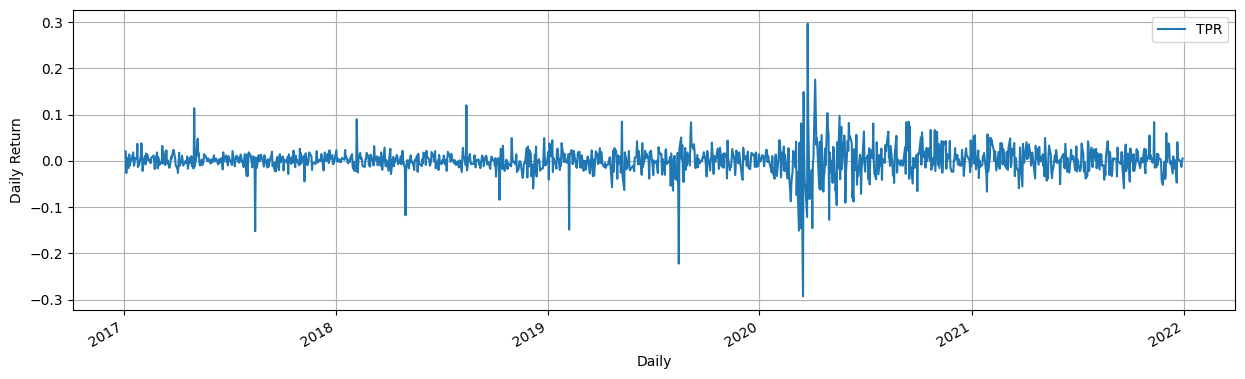

In [24]:
for i in list(df_consumer_ret.columns):
  df_consumer_ret[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Daily Return',xlabel='Daily',legend=i)
  plt.show()

* **Industrial Sector**

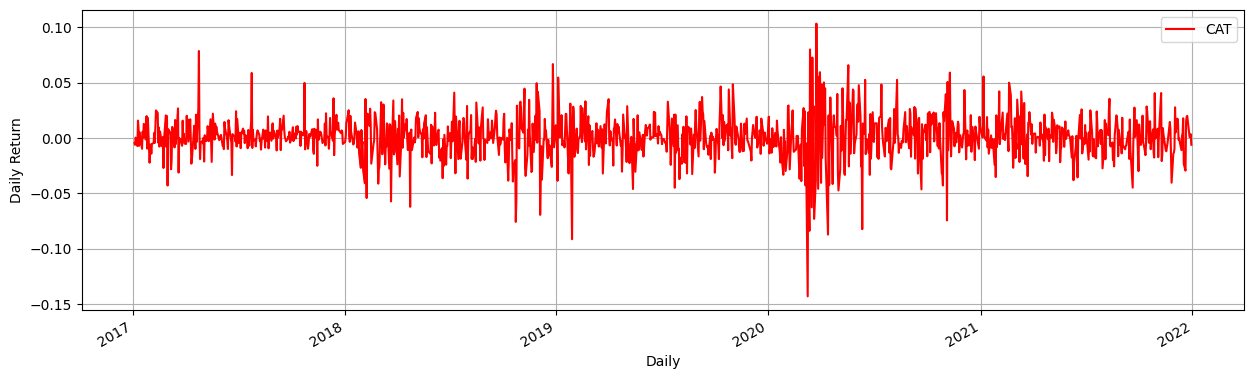

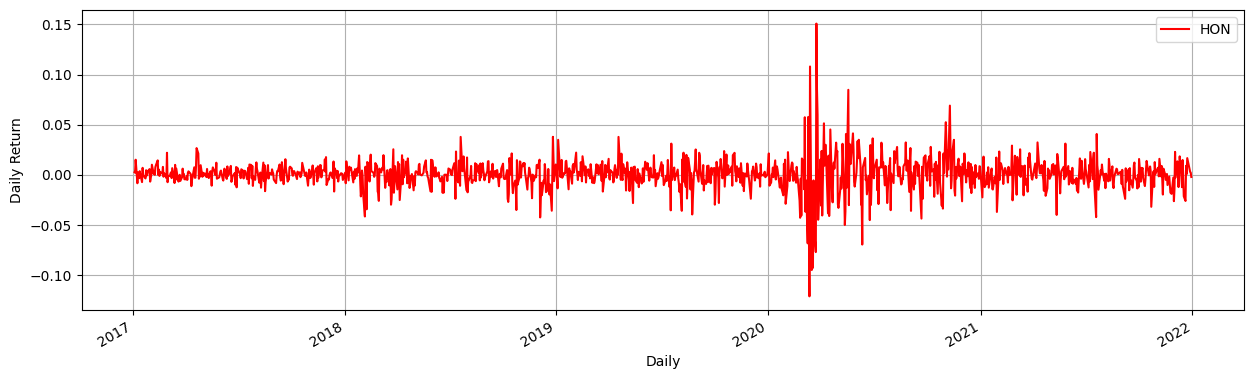

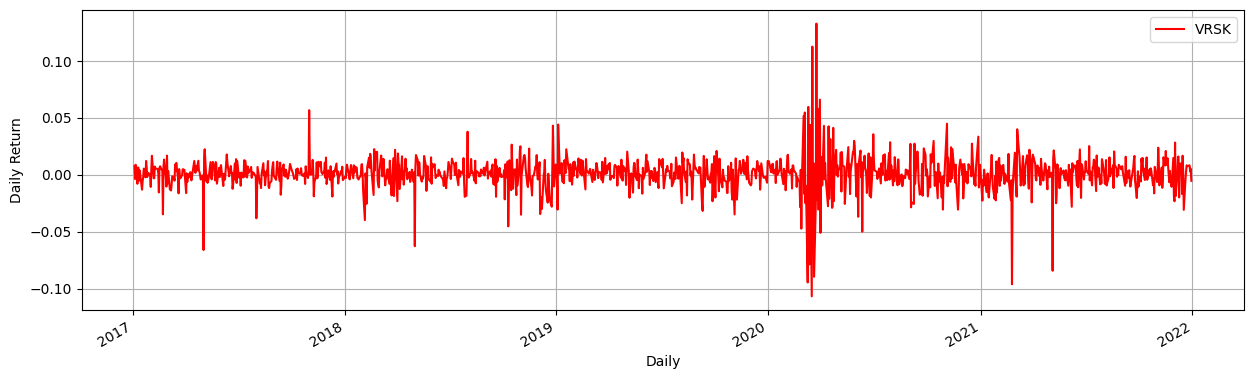

In [25]:
for i in list(df_industrial_ret.columns):
  df_industrial_ret[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Daily Return',xlabel='Daily',legend=i,color='red')
  plt.show()

* **Technology Sector**

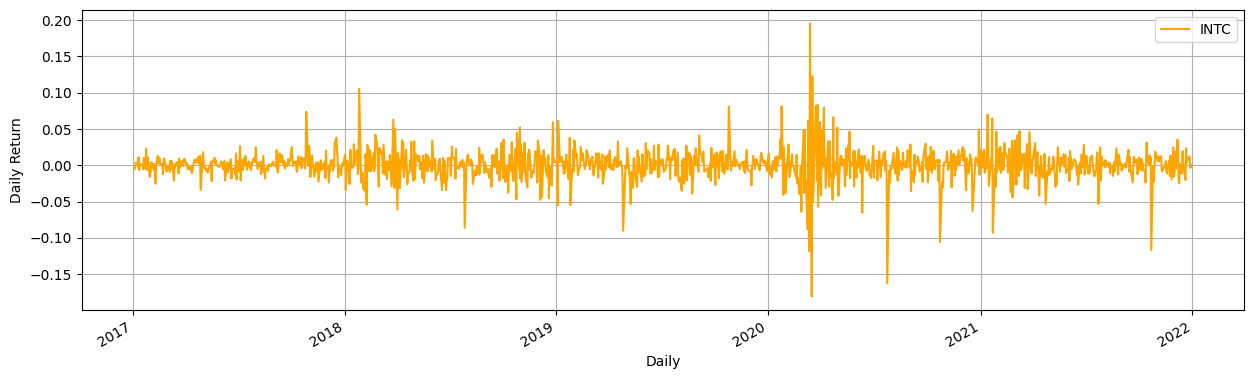

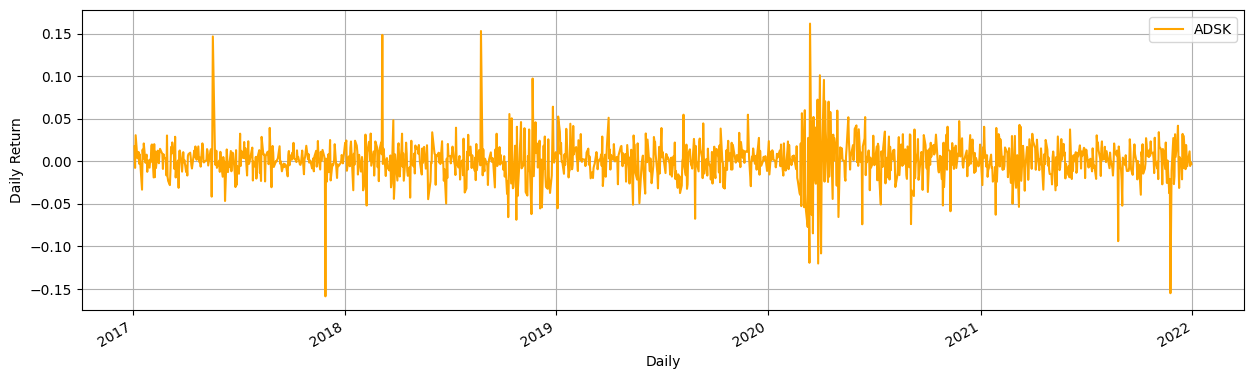

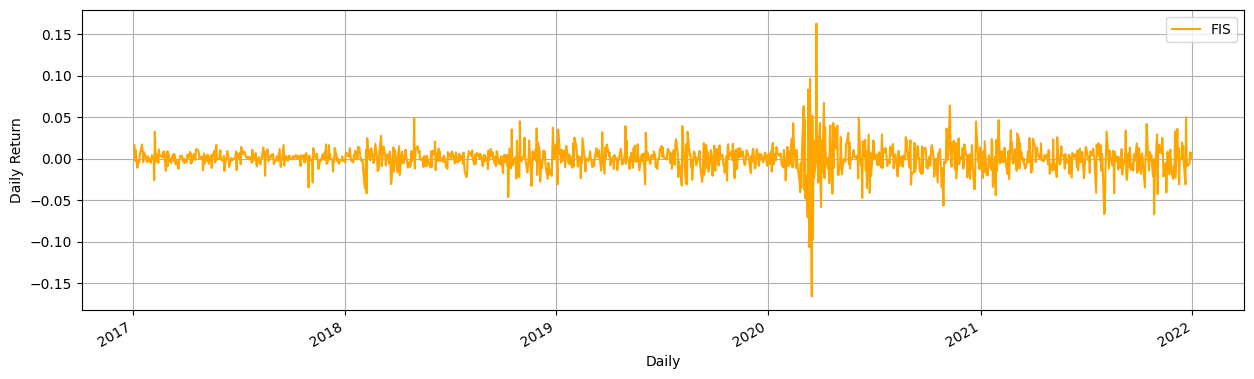

In [26]:
for i in list(df_technology_ret.columns):
  df_technology_ret[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Daily Return',xlabel='Daily',legend=i,color='orange')
  plt.show()

* For all the three sectors, we can see that the fluctuation intensity (fluctuation in stock prices) has increased in the first quarter of 2020, which is interesting as in our previous graphs, the stock values had went down during the same time.

#### **Average Value & Standard Deviation for Return for each of the Stocks**

In [27]:
# Average Return
Avg_Return = df.mean().to_frame(name="Avg_Return")
print("Average Value:\n")
print(Avg_Return)

print("\n\n")

# Standard Deviation
Std_Dev_Return = df.std().to_frame(name="Std_Dev_Return")
print("Standard Deviation:\n")
print(Std_Dev_Return)


Average Value:

      Avg_Return
NKE     0.001140
MCD     0.000842
TPR     0.000702
INTC    0.000618
ADSK    0.001327
FIS     0.000477
CAT     0.000923
HON     0.000701
VRSK    0.000950



Standard Deviation:

      Std_Dev_Return
NKE         0.018406
MCD         0.014549
TPR         0.030700
INTC        0.021858
ADSK        0.023880
FIS         0.017053
CAT         0.019669
HON         0.015923
VRSK        0.015053


### **Covariance Formula**

<center>

$\text{Cov}_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

</center>

* **Covariance Matrix**

In [28]:
# Creating Covariance Matrix from Stock Return DataFrame
df_cov = df.cov()
print('Covariance Matrix:')
df_cov

Covariance Matrix:


NKE       MCD       TPR      INTC      ADSK       FIS       CAT  \
NKE   0.000339  0.000127  0.000291  0.000153  0.000177  0.000153  0.000161   
MCD   0.000127  0.000212  0.000201  0.000118  0.000126  0.000144  0.000117   
TPR   0.000291  0.000201  0.000942  0.000239  0.000246  0.000214  0.000312   
INTC  0.000153  0.000118  0.000239  0.000478  0.000253  0.000188  0.000197   
ADSK  0.000177  0.000126  0.000246  0.000253  0.000570  0.000192  0.000208   
FIS   0.000153  0.000144  0.000214  0.000188  0.000192  0.000291  0.000156   
CAT   0.000161  0.000117  0.000312  0.000197  0.000208  0.000156  0.000387   
HON   0.000163  0.000135  0.000288  0.000172  0.000181  0.000164  0.000212   
VRSK  0.000136  0.000115  0.000165  0.000153  0.000168  0.000158  0.000125   

           HON      VRSK  
NKE   0.000163  0.000136  
MCD   0.000135  0.000115  
TPR   0.000288  0.000165  
INTC  0.000172  0.000153  
ADSK  0.000181  0.000168  
FIS   0.000164  0.000158  
CAT   0.000212  0.000125  
HON   0.000254  0.000128  
VRSK  0.000128  0.000227

* **Correlation Matrix**

In [29]:
# Printing the Correlation Matrix
Corr_matrix = df.corr()
print('Correlation Matrix:')
Corr_matrix

Correlation Matrix:


NKE       MCD       TPR      INTC      ADSK       FIS       CAT  \
NKE   1.000000  0.473296  0.514590  0.379578  0.401673  0.486760  0.444054   
MCD   0.473296  1.000000  0.449169  0.370450  0.363419  0.579407  0.410327   
TPR   0.514590  0.449169  1.000000  0.356731  0.336114  0.408039  0.516811   
INTC  0.379578  0.370450  0.356731  1.000000  0.483923  0.503138  0.457693   
ADSK  0.401673  0.363419  0.336114  0.483923  1.000000  0.472068  0.442701   
FIS   0.486760  0.579407  0.408039  0.503138  0.472068  1.000000  0.463969   
CAT   0.444054  0.410327  0.516811  0.457693  0.442701  0.463969  1.000000   
HON   0.557359  0.581446  0.589567  0.493904  0.474828  0.603997  0.677798   
VRSK  0.489796  0.527303  0.356310  0.463941  0.466829  0.614579  0.420798   

           HON      VRSK  
NKE   0.557359  0.489796  
MCD   0.581446  0.527303  
TPR   0.589567  0.356310  
INTC  0.493904  0.463941  
ADSK  0.474828  0.466829  
FIS   0.603997  0.614579  
CAT   0.677798  0.420798  
HON   1.000000  0.535025  
VRSK  0.535025  1.000000

In [30]:
# Creating a DataFrame to store the Average Value of Return for each of the stocks
# These are the Coefficients for the Objective Function
df_return = df.mean()
print('Average Return:\n')
print(df_return)

Average Return:

NKE     0.001140
MCD     0.000842
TPR     0.000702
INTC    0.000618
ADSK    0.001327
FIS     0.000477
CAT     0.000923
HON     0.000701
VRSK    0.000950
dtype: float64


### **Defining the Model**

In [31]:
# Defining the Model
m=ConcreteModel()

### **Declaring Decision Variables**

In [32]:
# Each Decision Variable Represents a Stock
m.NKE = Var(within=NonNegativeReals, bounds=(0,1))
m.MCD = Var(within=NonNegativeReals, bounds=(0,1))
m.TPR = Var(within=NonNegativeReals, bounds=(0,1))
m.INTC = Var(within=NonNegativeReals, bounds=(0,1))
m.ADSK = Var(within=NonNegativeReals, bounds=(0,1))
m.FIS = Var(within=NonNegativeReals, bounds=(0,1))
m.CAT = Var(within=NonNegativeReals, bounds=(0,1))
m.HON = Var(within=NonNegativeReals, bounds=(0,1))
m.VRSK = Var(within=NonNegativeReals, bounds=(0,1))

### **Declaring Binary Decision Variables**

In [33]:
# Binary Variables for Stock Selection
# Binary Variables take values of 0 or 1

m.b1=Var(domain=Binary)
m.b2=Var(domain=Binary)
m.b3=Var(domain=Binary)
m.b4=Var(domain=Binary)
m.b5=Var(domain=Binary)
m.b6=Var(domain=Binary)
m.b7=Var(domain=Binary)
m.b8=Var(domain=Binary)
m.b9=Var(domain=Binary)

### **Definining the Objective Function**

In [34]:
# Definining the Objective Function
m.objective = Objective(expr =               
                        m.b1*m.NKE*df_return[0] + 
                        m.b2*m.MCD*df_return[1] + 
                        m.b3*m.TPR*df_return[2] +
                        m.b4*m.INTC*df_return[3] + 
                        m.b5*m.ADSK*df_return[4]+
                        m.b6*m.FIS*df_return[5]+
                        m.b7*m.CAT*df_return[6]+
                        m.b8*m.HON*df_return[7]+
                        m.b9*m.VRSK*df_return[8],
                        sense=maximize) # We want to maximize the Return

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1949827111.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.b1*m.NKE*df_return[0] +
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1949827111.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.b2*m.MCD*df_return[1] +
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1949827111.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

### **Defining the Constraints**

In [35]:
# 1. First Constraint : Sum of Proportions of the stocks = 1
m.sum_proportions = Constraint(expr = m.NKE + m.MCD + m.TPR + m.INTC + m.ADSK +m.FIS + m.CAT +m.HON + m.VRSK == 1)

# 2. Second Constraint : Minimum Return Should be at least 0.0005 or 0.05%
m.return_floor = Constraint(expr = m.objective >= 0.0005)

# 3. Third Constraint : We set the Minimum Risk here
# We are just initializing the constraint
m.total_risk = Constraint(expr = m.NKE + m.MCD + m.TPR + m.INTC + m.ADSK + m.FIS + m.CAT + m.HON + m.VRSK >= 0.0)

### **Defining Binary Constraints**

In [36]:
# Binary Constraints to ensure that only one stock is selected from the Consumer Discretionary Sector
m.binary_constraint_1=Constraint(expr=m.b1+m.b2+m.b3 <=1)
m.binary_constraint_4=Constraint(expr=m.b1+m.b2+m.b3 >=1)

# Binary Constraints to ensure that only one stock is selected from the Technology Sector
m.binary_constraint_2=Constraint(expr=m.b4+m.b5+m.b6 <=1)
m.binary_constraint_5=Constraint(expr=m.b4+m.b5+m.b6 >=1)

# Binary Constraints to ensure that only one stock is selected from the Industrial Sector
m.binary_constraint_3=Constraint(expr=m.b7+m.b8+m.b9 <=1)
m.binary_constraint_6=Constraint(expr=m.b7+m.b8+m.b9 >=1)

### **Creating Tables for Calculating the Risk**

In [37]:
# Calculating Risks
def calc_risk(m):
  variables = m.NKE, m.MCD, m.TPR, m.INTC ,m.ADSK ,m.FIS, m.CAT, m.HON,m.VRSK
  tickers=['NKE', 'MCD', 'TPR', 'INTC', 'ADSK', 'FIS', 'CAT', 'HON', 'VRSK']
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# Computing the Risk
expr_risk = calc_risk(m)

### **Assigning Max Risk & Risk Ceilings**

In [38]:
# Max risk should be less than 0.0007
max_risk=0.0007

# Sequence of Risk Limits
risk_limits = np.arange(0.00001,max_risk, 0.000005) 
print("Risk Ceilings:")
print(risk_limits)
print("\n")

Risk Ceilings:
[1.00e-05 1.50e-05 2.00e-05 2.50e-05 3.00e-05 3.50e-05 4.00e-05 4.50e-05
 5.00e-05 5.50e-05 6.00e-05 6.50e-05 7.00e-05 7.50e-05 8.00e-05 8.50e-05
 9.00e-05 9.50e-05 1.00e-04 1.05e-04 1.10e-04 1.15e-04 1.20e-04 1.25e-04
 1.30e-04 1.35e-04 1.40e-04 1.45e-04 1.50e-04 1.55e-04 1.60e-04 1.65e-04
 1.70e-04 1.75e-04 1.80e-04 1.85e-04 1.90e-04 1.95e-04 2.00e-04 2.05e-04
 2.10e-04 2.15e-04 2.20e-04 2.25e-04 2.30e-04 2.35e-04 2.40e-04 2.45e-04
 2.50e-04 2.55e-04 2.60e-04 2.65e-04 2.70e-04 2.75e-04 2.80e-04 2.85e-04
 2.90e-04 2.95e-04 3.00e-04 3.05e-04 3.10e-04 3.15e-04 3.20e-04 3.25e-04
 3.30e-04 3.35e-04 3.40e-04 3.45e-04 3.50e-04 3.55e-04 3.60e-04 3.65e-04
 3.70e-04 3.75e-04 3.80e-04 3.85e-04 3.90e-04 3.95e-04 4.00e-04 4.05e-04
 4.10e-04 4.15e-04 4.20e-04 4.25e-04 4.30e-04 4.35e-04 4.40e-04 4.45e-04
 4.50e-04 4.55e-04 4.60e-04 4.65e-04 4.70e-04 4.75e-04 4.80e-04 4.85e-04
 4.90e-04 4.95e-04 5.00e-04 5.05e-04 5.10e-04 5.15e-04 5.20e-04 5.25e-04
 5.30e-04 5.35e-04 5.40e-04 5.45e-04

In [39]:
print("Number of Risk Ceilings:")
print(len(risk_limits))

Number of Risk Ceilings:
138


### **Solving**

In [41]:
# Importing pyomo Modules
from pyomo.opt import SolverStatus, TerminationCondition

# Updating Risk Constraints for each limit and then solving the problems
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Removing Constraints to Avoid Error Messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # Running Solver
  result = SolverFactory('ipopt').solve(m)

  # If solution is not feasible, we ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # Storing our Allocation Proportions
  param_analysis[r] = [m.NKE() , m.MCD() , m.TPR() , m.INTC() , m.ADSK() , m.FIS() , m.CAT() , m.HON() , m.VRSK()]
  # Storing our Returns
  returns[r]=m.NKE()*df_return[0] + m.MCD()*df_return[1] +  m.TPR()*df_return[2] + m.INTC()*df_return[3] + m.ADSK()*df_return[4]+ m.FIS()*df_return[5]+ m.CAT()*df_return[6]+m.HON()*df_return[7]+ m.VRSK()*df_return[8]


model.name="unknown";
    - termination condition: infeasible
    - message from solver: Ipopt 3.14.17\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
model.name="unknown";
    - termination condition: infeasible
    - message from solver: Ipopt 3.14.17\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
model.name="unknown";
    - termination condition: infeasible
    - message from solver: Ipopt 3.14.17\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
model.name="unknown";
    - termination condition: infeasible
    - message from solver: Ipopt 3.14.17\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
model.name="unknown";
    - termination condition: infeasible
    - message from solver: Ipopt 3.14.17\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
model.name="unknown";
    - termination condition: infeasible
    - message from solver: Ipopt 

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1436699458.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns[r]=m.NKE()*df_return[0] + m.MCD()*df_return[1] +  m.TPR()*df_return[2] + m.INTC()*df_return[3] + m.ADSK()*df_return[4]+ m.FIS()*df_return[5]+ m.CAT()*df_return[6]+m.HON()*df_return[7]+ m.VRSK()*df_return[8]


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.14.17\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02192068099975586
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ====

In [42]:
# Printing the Return (Objective Function)
print(m.objective())

0.0013265442253939535


### **Generating DataFrame for Proportions of the Portfolio for each risk limit**

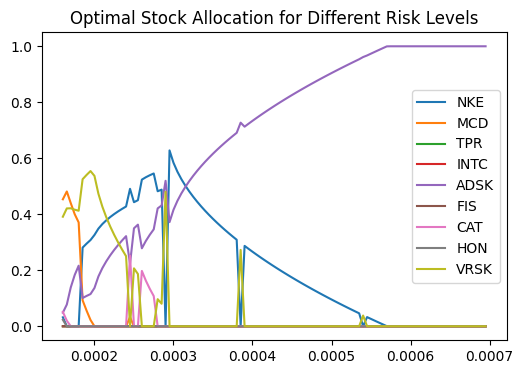

In [43]:
# Generating DataFrame for Proportions of the Portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['NKE', 'MCD', 'TPR', 'INTC', 'ADSK', 'FIS', 'CAT', 'HON', 'VRSK']
param_analysis.plot(figsize=(6,4))
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

* Towards the lefthand side, we have lower risk and higher diversity.

* Towards the righthand side, we have higher risk and lower diversity.

* We have the optimal allocation of stocks corresponding to each risk level. 

* For our analysis, we would be considering the risk value of 0.000205 and the corresponding stocks chosen are McDonald's, Autodesk and Verisk. This risk value has been chosen as these 3 stocks belong to 3 different sectors and their allocation proportion sums to 1 approximately.

* **We can see that the 3 stocks chosen by the MPT model are McDonald's, Autodesk & Verisk.**

In [44]:
# Printing the first 5 rows of the DataFrame
# Here Index represents the Risk Level
param_analysis.head()

NKE       MCD           TPR      INTC      ADSK       FIS  \
0.000160  0.032027  0.453525  9.486918e-07  0.000023  0.048605  0.000005   
0.000165  0.000040  0.481436  1.509229e-06  0.000008  0.077567  0.000004   
0.000170  0.000004  0.439867  2.118434e-06  0.000003  0.138744  0.000003   
0.000175  0.000003  0.400298  2.248753e-06  0.000003  0.183302  0.000003   
0.000180  0.000003  0.370917  2.310866e-06  0.000003  0.216387  0.000003   

               CAT       HON      VRSK  
0.000160  0.051387  0.023187  0.391239  
0.000165  0.019992  0.000021  0.420932  
0.000170  0.000004  0.000004  0.421368  
0.000175  0.000004  0.000003  0.416382  
0.000180  0.000003  0.000003  0.412679

In [45]:
# Subsetting (Creating Lists for Risks & Returns using the Dictionary 'returns')
risk = list(returns.keys()) # coercing dict_keys to a list
print("Risk:")
print(risk)
reward = list(returns.values()) # coercing dict_values to a list
print("Reward:")
print(reward) 

Risk:
[np.float64(0.00016000000000000004), np.float64(0.00016500000000000003), np.float64(0.00017000000000000004), np.float64(0.00017500000000000005), np.float64(0.00018000000000000004), np.float64(0.00018500000000000005), np.float64(0.00019000000000000004), np.float64(0.00019500000000000005), np.float64(0.00020000000000000004), np.float64(0.00020500000000000005), np.float64(0.00021000000000000004), np.float64(0.00021500000000000005), np.float64(0.00022000000000000006), np.float64(0.00022500000000000005), np.float64(0.00023000000000000006), np.float64(0.00023500000000000005), np.float64(0.00024000000000000006), np.float64(0.00024500000000000005), np.float64(0.00025000000000000006), np.float64(0.00025500000000000007), np.float64(0.0002600000000000001), np.float64(0.0002650000000000001), np.float64(0.0002700000000000001), np.float64(0.00027500000000000007), np.float64(0.0002800000000000001), np.float64(0.0002850000000000001), np.float64(0.0002900000000000001), np.float64(0.00029500000000

### **Plotting the Efficient Frontier**

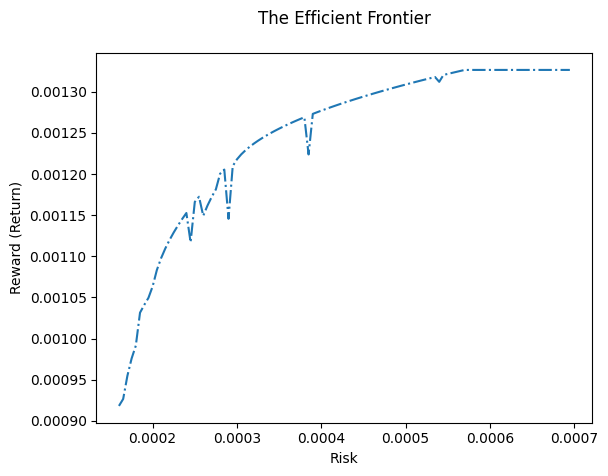

In [46]:
# Efficient Frontier
plot(risk, reward, '-.')
title('The Efficient Frontier\n')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

* We have plotted the efficient frontier, that is, risk (X) vs. return (Y).

* At a certain point, taking on more risk doesn't increase your returns! This occurs at ~Risk = 0.006 which achieves a max return around 0.135% (0.00135). 

* Any point on the efficient frontier represents an optimal allocation based on your risk tolerance.

In [47]:
# Creating a DataFrame for Risk
risk = pd.DataFrame(risk)
# Creating a DataFrame for Reward
reward = pd.DataFrame(reward)
reward['risk'] = risk
reward.rename({0:'reward'}, axis=1, inplace=True)
reward['Diff'] = reward['reward'].diff()
reward['percDiff'] = reward['reward'].pct_change()
reward.head() # Printing first 5 rows

reward      risk      Diff  percDiff
0  0.000918  0.000160       NaN       NaN
1  0.000927  0.000165  0.000008  0.009185
2  0.000955  0.000170  0.000028  0.030296
3  0.000976  0.000175  0.000021  0.022054
4  0.000991  0.000180  0.000016  0.016023

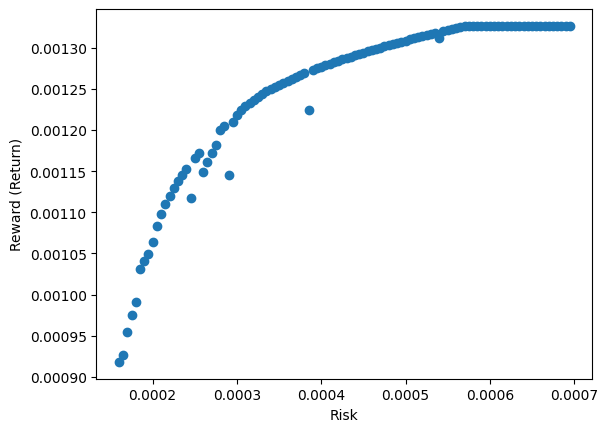

In [48]:
# Creating a Scatterplot for Reward (Return) vs Risk
plt.scatter(x=reward['risk'], y=reward['reward'])
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

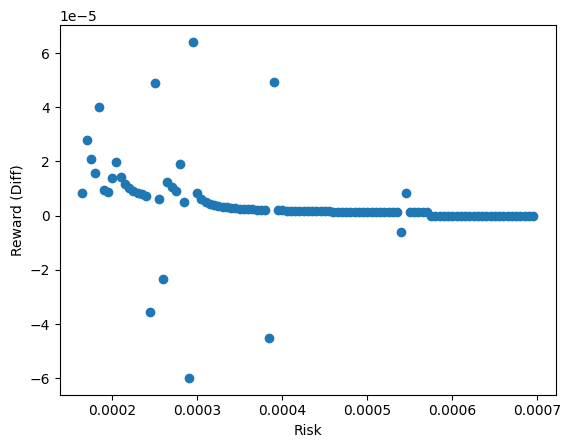

In [49]:
# Creating a Scatterplot for Reward (Diff) vs Risk
plt.scatter(x=reward['risk'], y=reward['Diff'])
xlabel('Risk')
ylabel('Reward (Diff)')
plt.show()

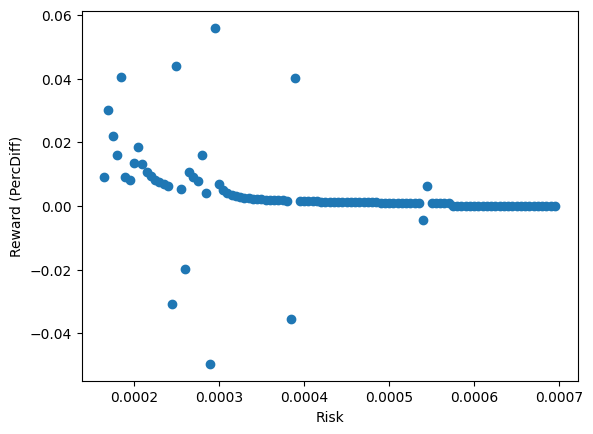

In [50]:
# Creating a Scatterplot for Reward (PercDiff) vs Risk
plt.scatter(x=reward['risk'], y=reward['percDiff'])
xlabel('Risk')
ylabel('Reward (PercDiff)')
plt.show()

In [53]:
# For the DataFrame 'param_analysis', the index represents the risk
# We have chosen an allocation corresponding to a risk of 0.000205
chosen_allocation=param_analysis[(param_analysis.index >0.000201) & (param_analysis.index <0.00021)]

In [54]:
# Printing Chosen Allocation
chosen_allocation

NKE       MCD           TPR      INTC      ADSK       FIS  \
0.000205  0.348761  0.000002  7.467013e-07  0.000001  0.177997  0.000001   

               CAT       HON      VRSK  
0.000205  0.000001  0.000001  0.473235

In [59]:
top3 = chosen_allocation.T.squeeze().sort_values(ascending=False).head(3)
print(top3)

VRSK    0.473235
ADSK    0.177997
MCD     0.000002
Name: 0.00020500000000000005, dtype: float64


In [60]:
# Printing Chosen Allocation for the Top 3 Stocks
chosen_allocation=chosen_allocation[['MCD','ADSK','VRSK']]
chosen_allocation

MCD      ADSK      VRSK
0.000205  0.000002  0.177997  0.473235

In [69]:
# Stocks Chosen from MPT Model
m.b1 = Var(domain=Binary)

print("Nike :",m.b1())
print("McDonald's:",m.b2())
print("Tapestry Inc. :",m.b3())
print("Intel :",m.b4())
print("Autodesk :",m.b5())
print("FIS :",m.b6())
print("Caterpillar :",m.b7())
print("Honeywell :",m.b8())
print("Verisk :",m.b9())

'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
(type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
Nike : None
McDonald's: None
Tapestry Inc. : None
Intel : None
Autodesk : None
FIS : None
Caterpillar : None
Honeywell : None
Verisk : None


**From the Selected Portfolio Allocation, we can see that we have allocated 0.272% of the Portfolio to McDonald's Stock , 0.328% of the Portfolio to Autodesk Stock, and 0.40% of the Portfolio to Verisk Stock.**

# **3) Momentum Trading**

In [70]:
# Creating a new DataFrame based on the stocks chosen from MPT Model for Momentum Trading
final_data=prep_data[['MCD','ADSK','VRSK']]

In [71]:
Mcd_data=final_data[['MCD']] # DataFrame for McDonald's
Autodesk_data=final_data[['ADSK']] # DataFrame for Autodesk
Verisk_data=final_data[['VRSK']] # DataFrame for Verisk

### **9-Day / 21-Day Moving Average Strategy**

In [72]:
# We use shift() to prevent data leakage
Mcd_data['9-day'] = Mcd_data['MCD'].rolling(9).mean().shift() # 9-Day Moving Average 
Mcd_data['21-day'] = Mcd_data['MCD'].rolling(21).mean().shift() # 21-Day Moving Average

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/3558214497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mcd_data['9-day'] = Mcd_data['MCD'].rolling(9).mean().shift() # 9-Day Moving Average


In [73]:
# We use shift() to prevent data leakage
Autodesk_data['9-day'] = Autodesk_data['ADSK'].rolling(9).mean().shift() # 9-Day Moving Average 
Autodesk_data['21-day'] = Autodesk_data['ADSK'].rolling(21).mean().shift() # 21-Day Moving Average

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/70624803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Autodesk_data['9-day'] = Autodesk_data['ADSK'].rolling(9).mean().shift() # 9-Day Moving Average


In [74]:
# We use shift() to prevent data leakage
Verisk_data['9-day'] = Verisk_data['VRSK'].rolling(9).mean().shift() # 9-Day Moving Average
Verisk_data['21-day'] = Verisk_data['VRSK'].rolling(21).mean().shift() # 21-Day Moving Average

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/2376580236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Verisk_data['9-day'] = Verisk_data['VRSK'].rolling(9).mean().shift() # 9-Day Moving Average


* **McDonald's**

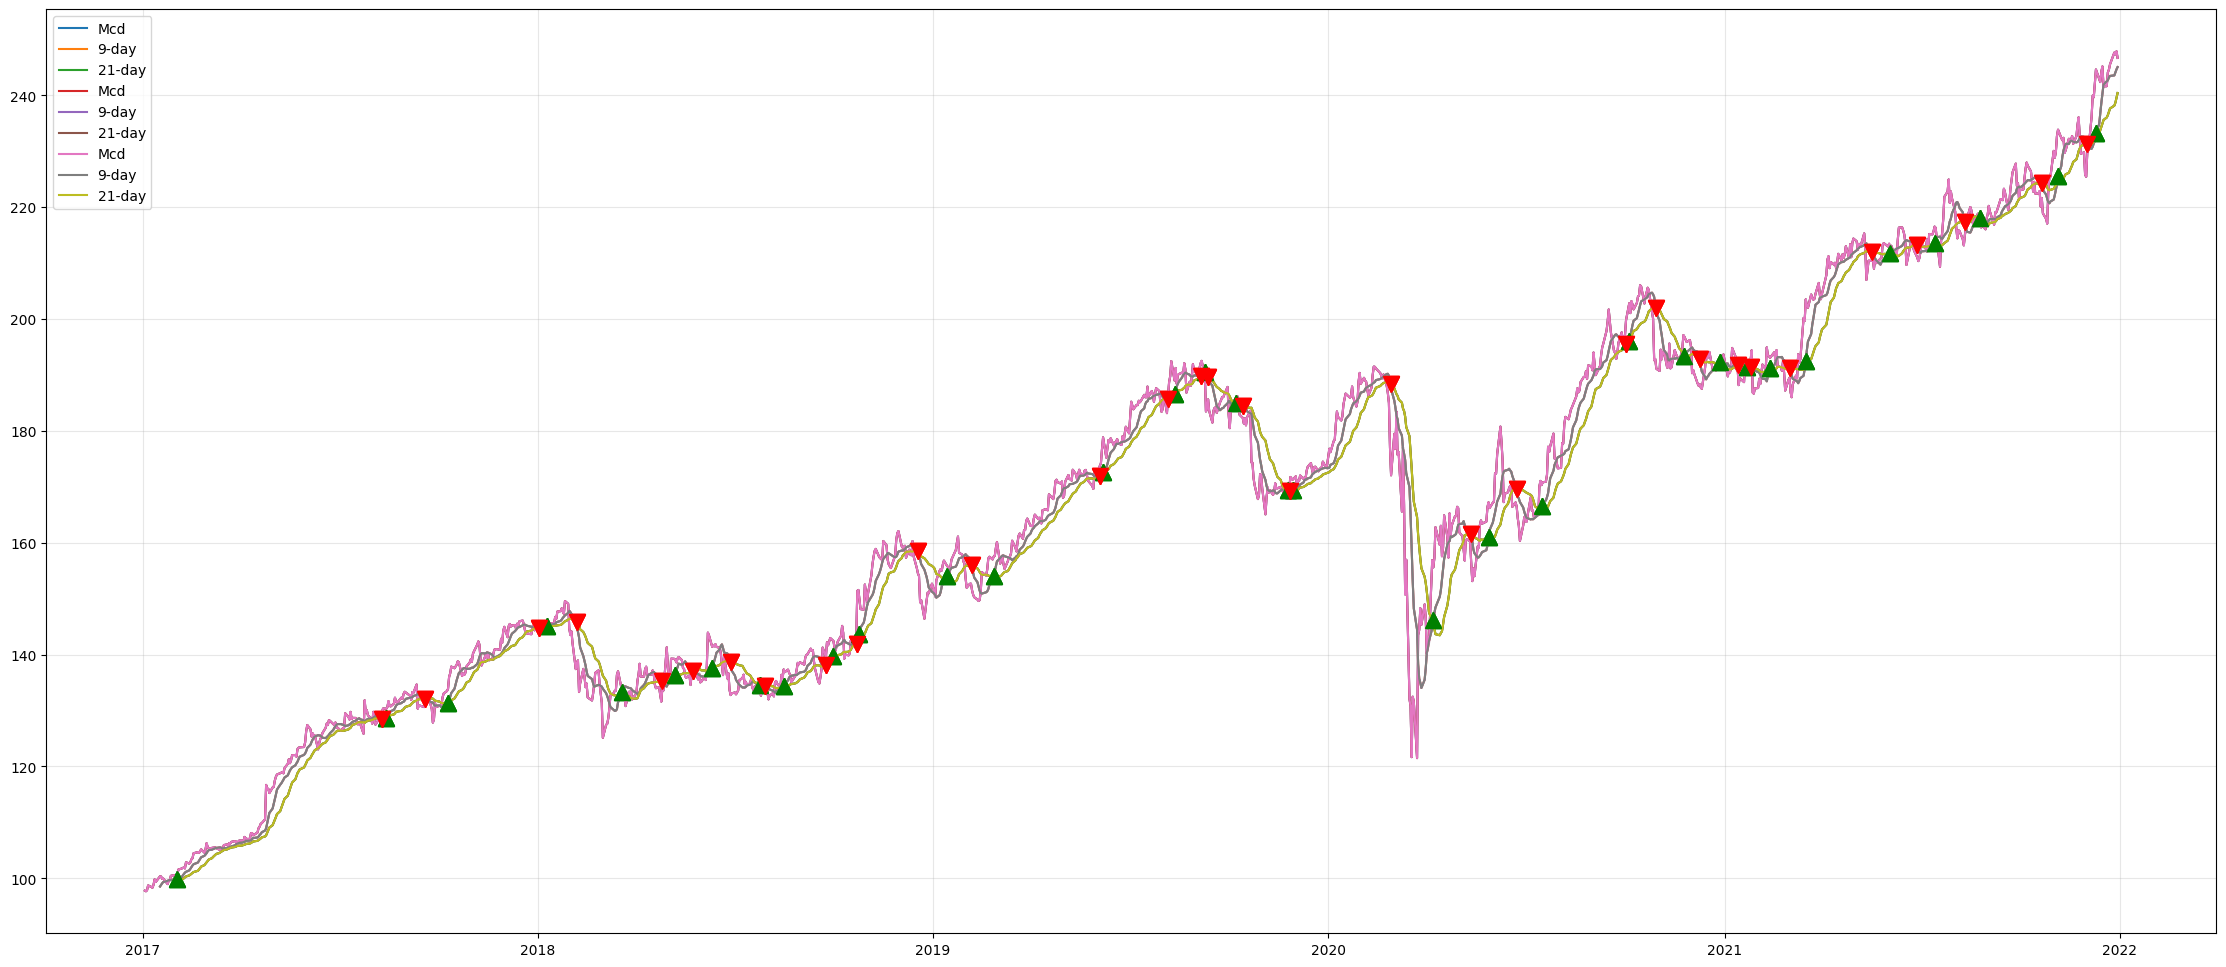

In [77]:
Mcd_data['invested_1'] = np.where(Mcd_data['9-day'] > Mcd_data['21-day'], 1, 0) # Here invested = 1 if 9-day average is greater than 21-day average
Mcd_data['signal_1'] = Mcd_data['invested_1'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Mcd_data['logClose_1'] = np.log(Mcd_data['MCD']) 
Mcd_data['return_1'] = Mcd_data['logClose_1'].diff() 
Mcd_data['system_return_1'] = Mcd_data['invested_1'] * Mcd_data['return_1'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Mcd_data['MCD'], label = 'Mcd') # Actual Value
plt.plot(Mcd_data['9-day'], label = '9-day') # 9-day Average
plt.plot(Mcd_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Mcd_data.loc[Mcd_data.signal_1 == 1].index, Mcd_data['9-day'][Mcd_data.signal_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Mcd_data.loc[Mcd_data.signal_1 == -1].index, Mcd_data['21-day'][Mcd_data.signal_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2) 
plt.show()

* **Autodesk**

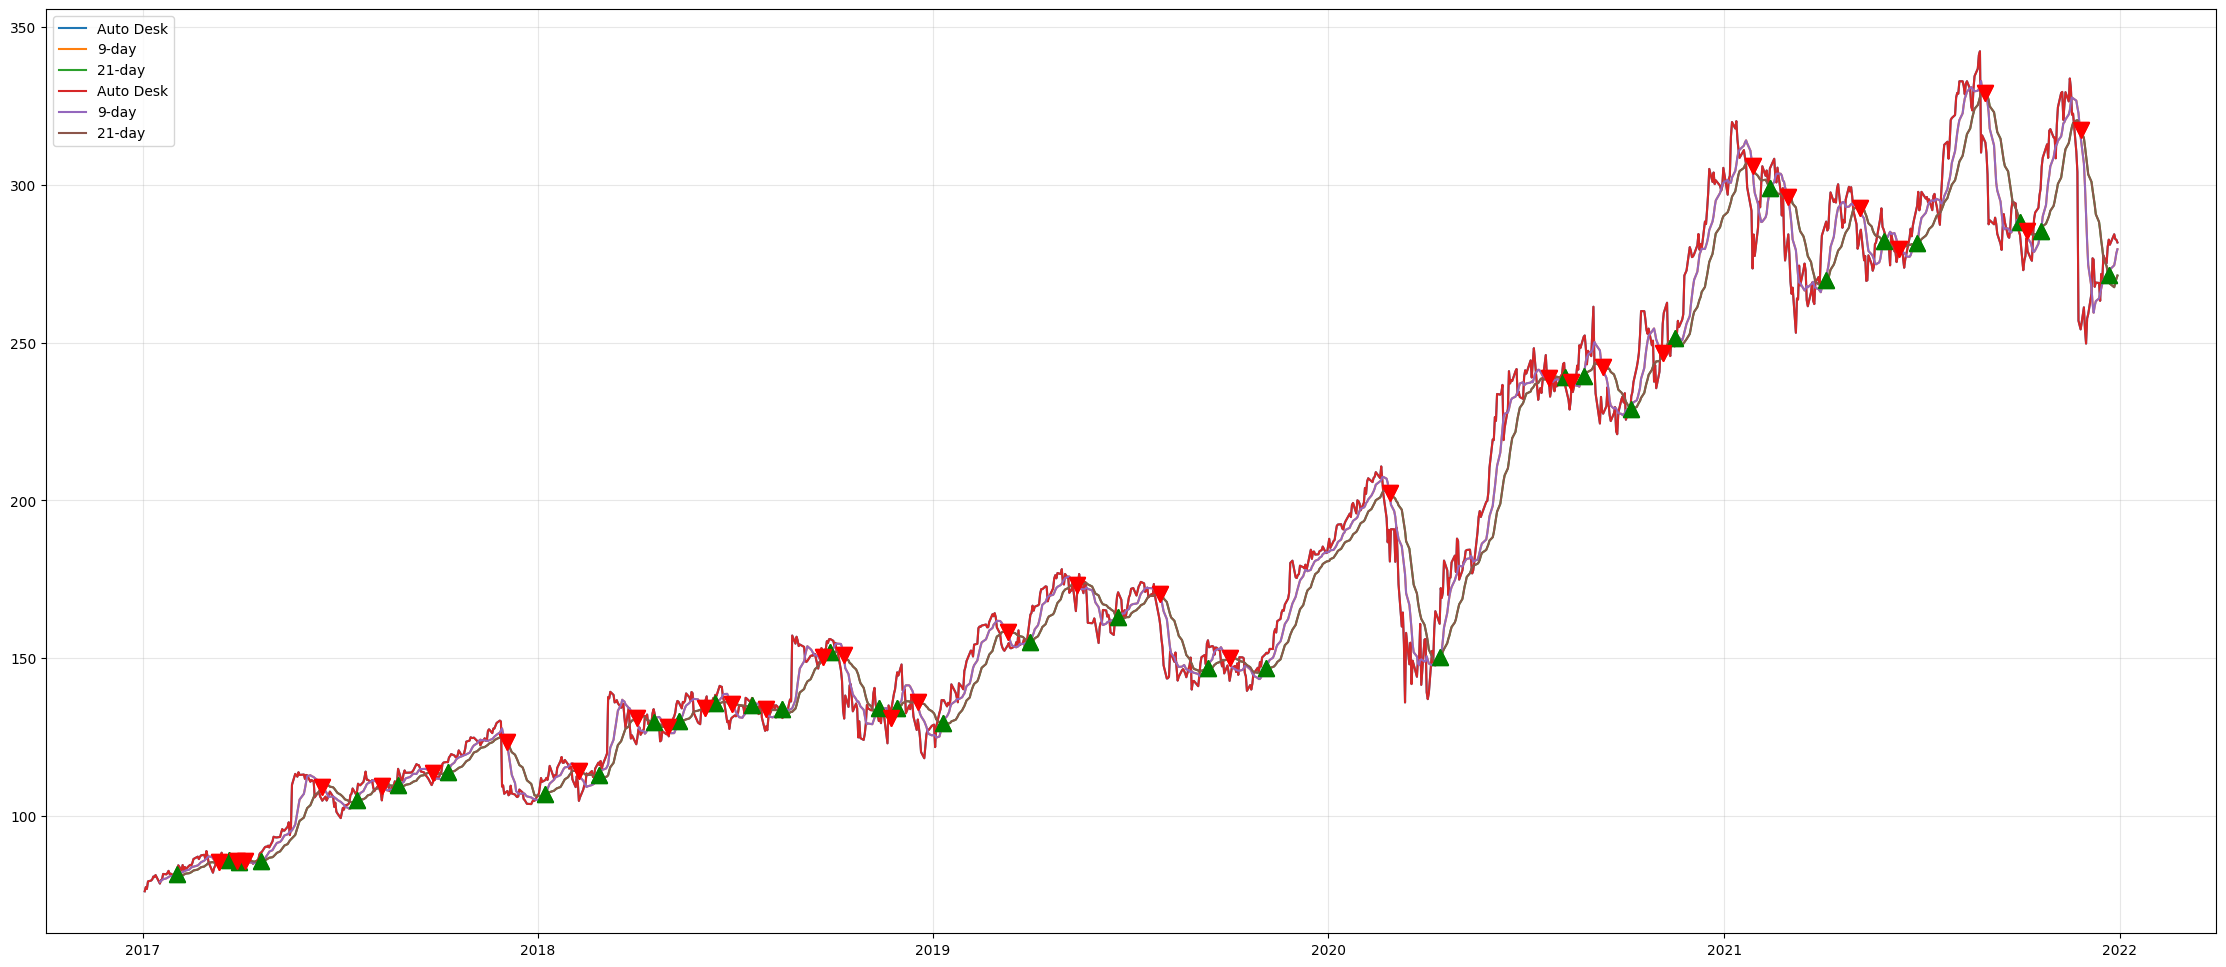

In [79]:
Autodesk_data['invested_1'] = np.where(Autodesk_data['9-day'] > Autodesk_data['21-day'], 1, 0) # Here invested = 1 if 9-day average is greater than 21-day average
Autodesk_data['signal_1'] = Autodesk_data['invested_1'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Autodesk_data['logClose_1'] = np.log(Autodesk_data['ADSK']) 
Autodesk_data['return_1'] = Autodesk_data['logClose_1'].diff() 
Autodesk_data['system_return_1'] = Autodesk_data['invested_1'] * Autodesk_data['return_1'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Autodesk_data['ADSK'], label = 'Auto Desk') # Actual Value
plt.plot(Autodesk_data['9-day'], label = '9-day') # 9-day Average
plt.plot(Autodesk_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Autodesk_data.loc[Autodesk_data.signal_1 == 1].index, Autodesk_data['9-day'][Autodesk_data.signal_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Autodesk_data.loc[Autodesk_data.signal_1 == -1].index, Autodesk_data['21-day'][Autodesk_data.signal_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

* **Verisk**

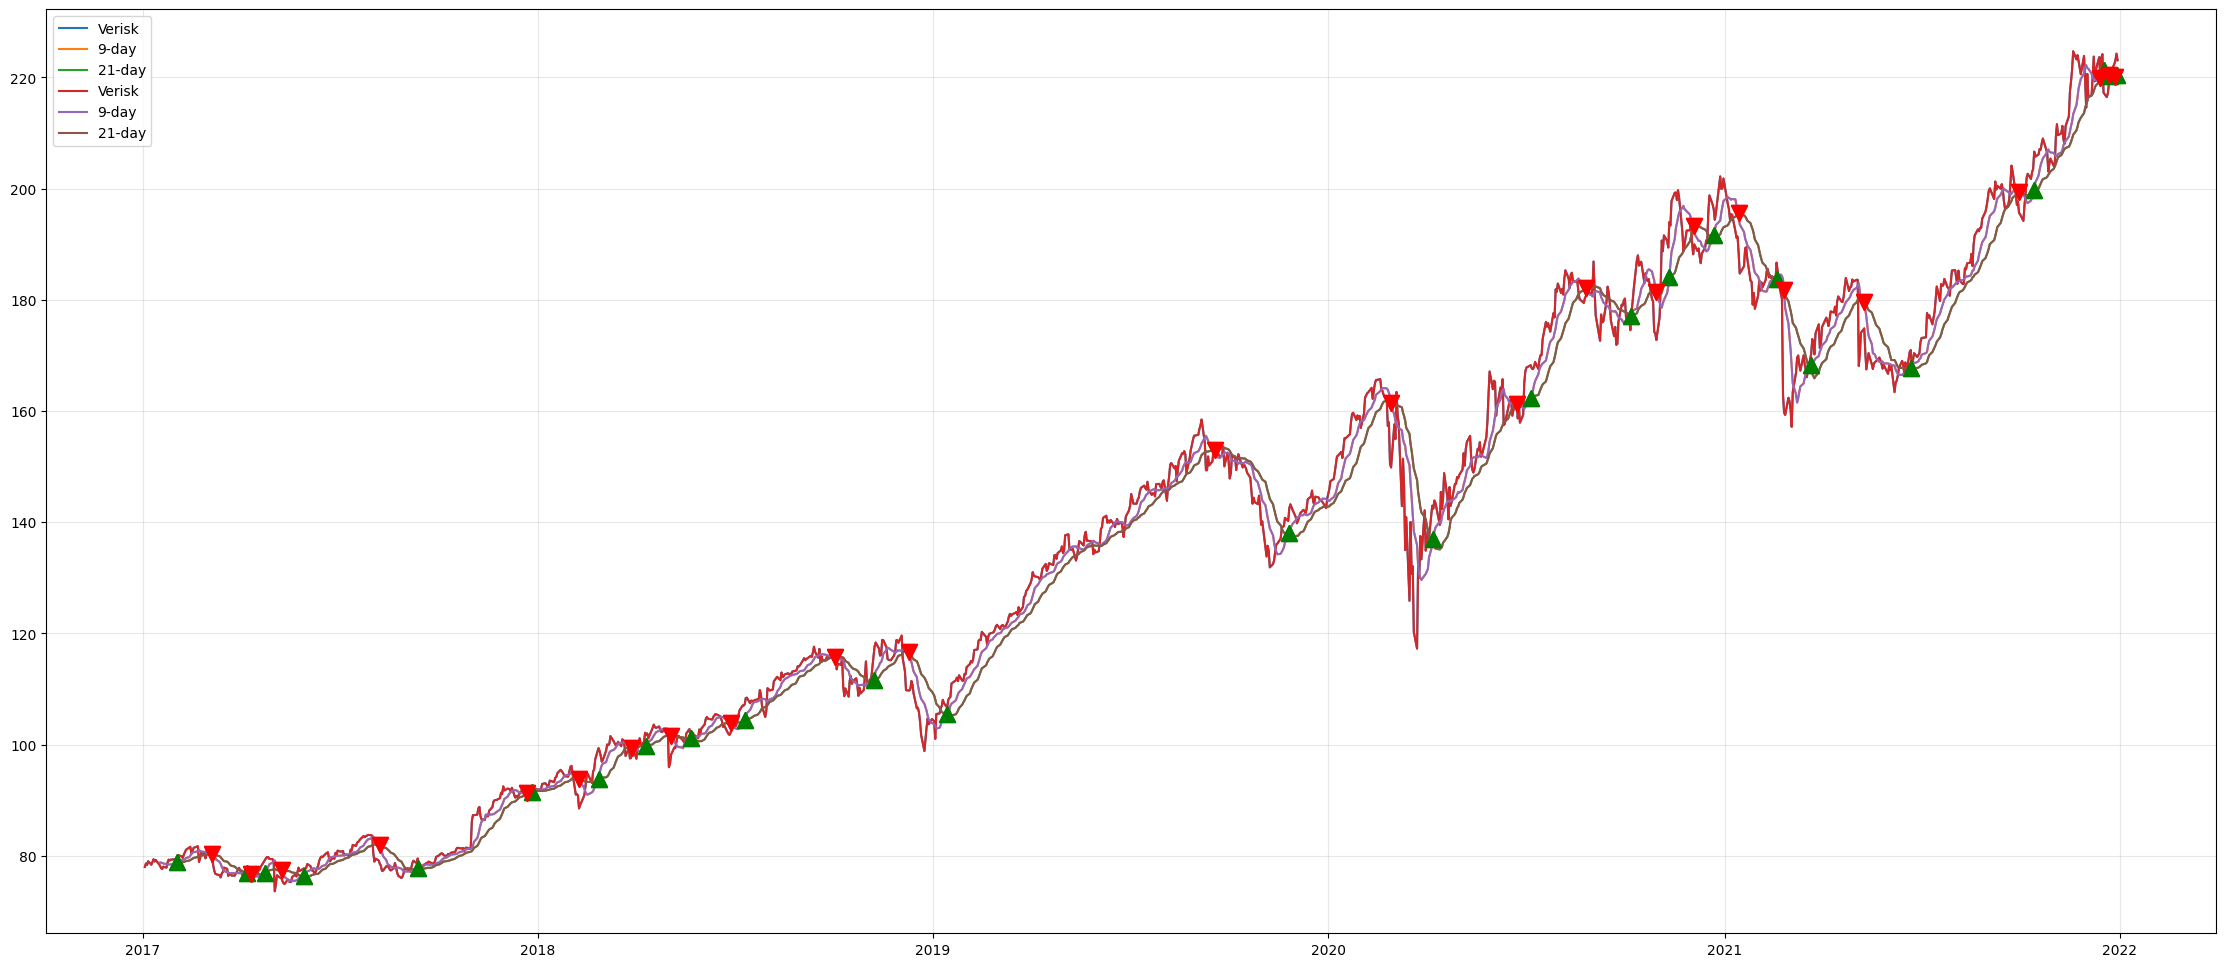

In [81]:
Verisk_data['invested_1'] = np.where(Verisk_data['9-day'] > Verisk_data['21-day'], 1, 0) # Here invested = 1 if 9-day average is greater than 21-day average
Verisk_data['signal_1'] = Verisk_data['invested_1'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Verisk_data['logClose_1'] = np.log(Verisk_data['VRSK']) 
Verisk_data['return_1'] = Verisk_data['logClose_1'].diff() 
Verisk_data['system_return_1'] = Verisk_data['invested_1'] * Verisk_data['return_1'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Verisk_data['VRSK'], label = 'Verisk') # Actual Value
plt.plot(Verisk_data['9-day'], label = '9-day') # 9-day Average
plt.plot(Verisk_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Verisk_data.loc[Verisk_data.signal_1 == 1].index, Verisk_data['9-day'][Verisk_data.signal_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Verisk_data.loc[Verisk_data.signal_1 == -1].index, Verisk_data['21-day'][Verisk_data.signal_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

### **5-Day / 13-Day Moving Average Strategy**

In [82]:
# We use shift() to prevent data leakage
Mcd_data['5-day'] = Mcd_data['MCD'].rolling(5).mean().shift() # 5-Day Moving Average
Mcd_data['13-day'] = Mcd_data['MCD'].rolling(13).mean().shift() # 13-Day Moving Average

In [83]:
# We use shift() to prevent data leakage
Autodesk_data['5-day'] = Autodesk_data['ADSK'].rolling(5).mean().shift() # 5-Day Moving Average
Autodesk_data['13-day'] = Autodesk_data['ADSK'].rolling(13).mean().shift() # 13-Day Moving Average

In [84]:
# We use shift() to prevent data leakage
Verisk_data['5-day'] = Verisk_data['VRSK'].rolling(5).mean().shift() # 5-Day Moving Average
Verisk_data['13-day'] = Verisk_data['VRSK'].rolling(13).mean().shift() # 13-Day Moving Average

* **McDonald's**

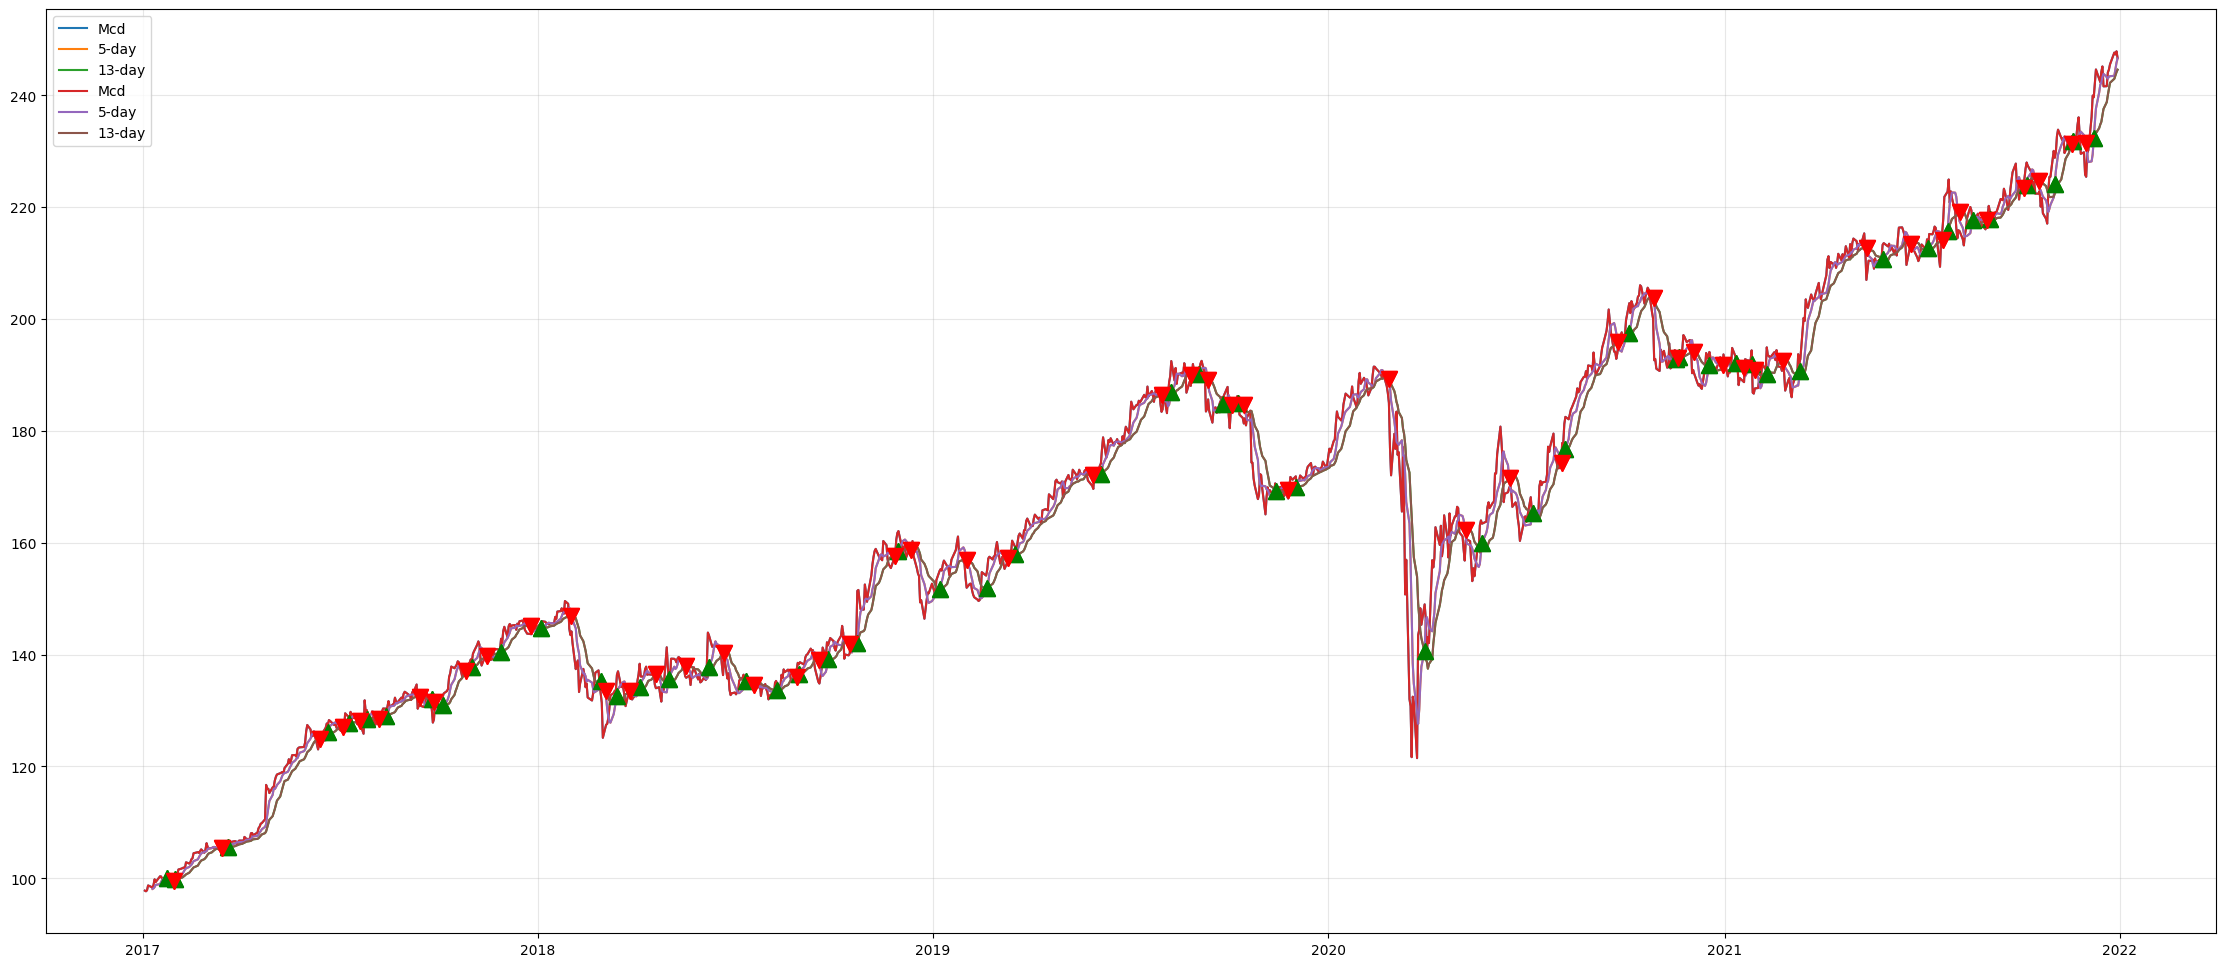

In [86]:
Mcd_data['invested_2'] = np.where(Mcd_data['5-day'] > Mcd_data['13-day'], 1, 0) # Here invested = 1 if 5-day average is greater than 13-day average
Mcd_data['signal_2'] = Mcd_data['invested_2'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Mcd_data['logClose_2'] = np.log(Mcd_data['MCD']) 
Mcd_data['return_2'] = Mcd_data['logClose_2'].diff() 
Mcd_data['system_return_2'] = Mcd_data['invested_2'] * Mcd_data['return_2'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Mcd_data['MCD'], label = 'Mcd') # Actual Value
plt.plot(Mcd_data['5-day'], label = '5-day') # 5-day Average
plt.plot(Mcd_data['13-day'], label = '13-day') # 13-day Average
plt.plot(Mcd_data.loc[Mcd_data.signal_2 == 1].index, Mcd_data['5-day'][Mcd_data.signal_2 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Mcd_data.loc[Mcd_data.signal_2 == -1].index, Mcd_data['13-day'][Mcd_data.signal_2 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

* **Autodesk**

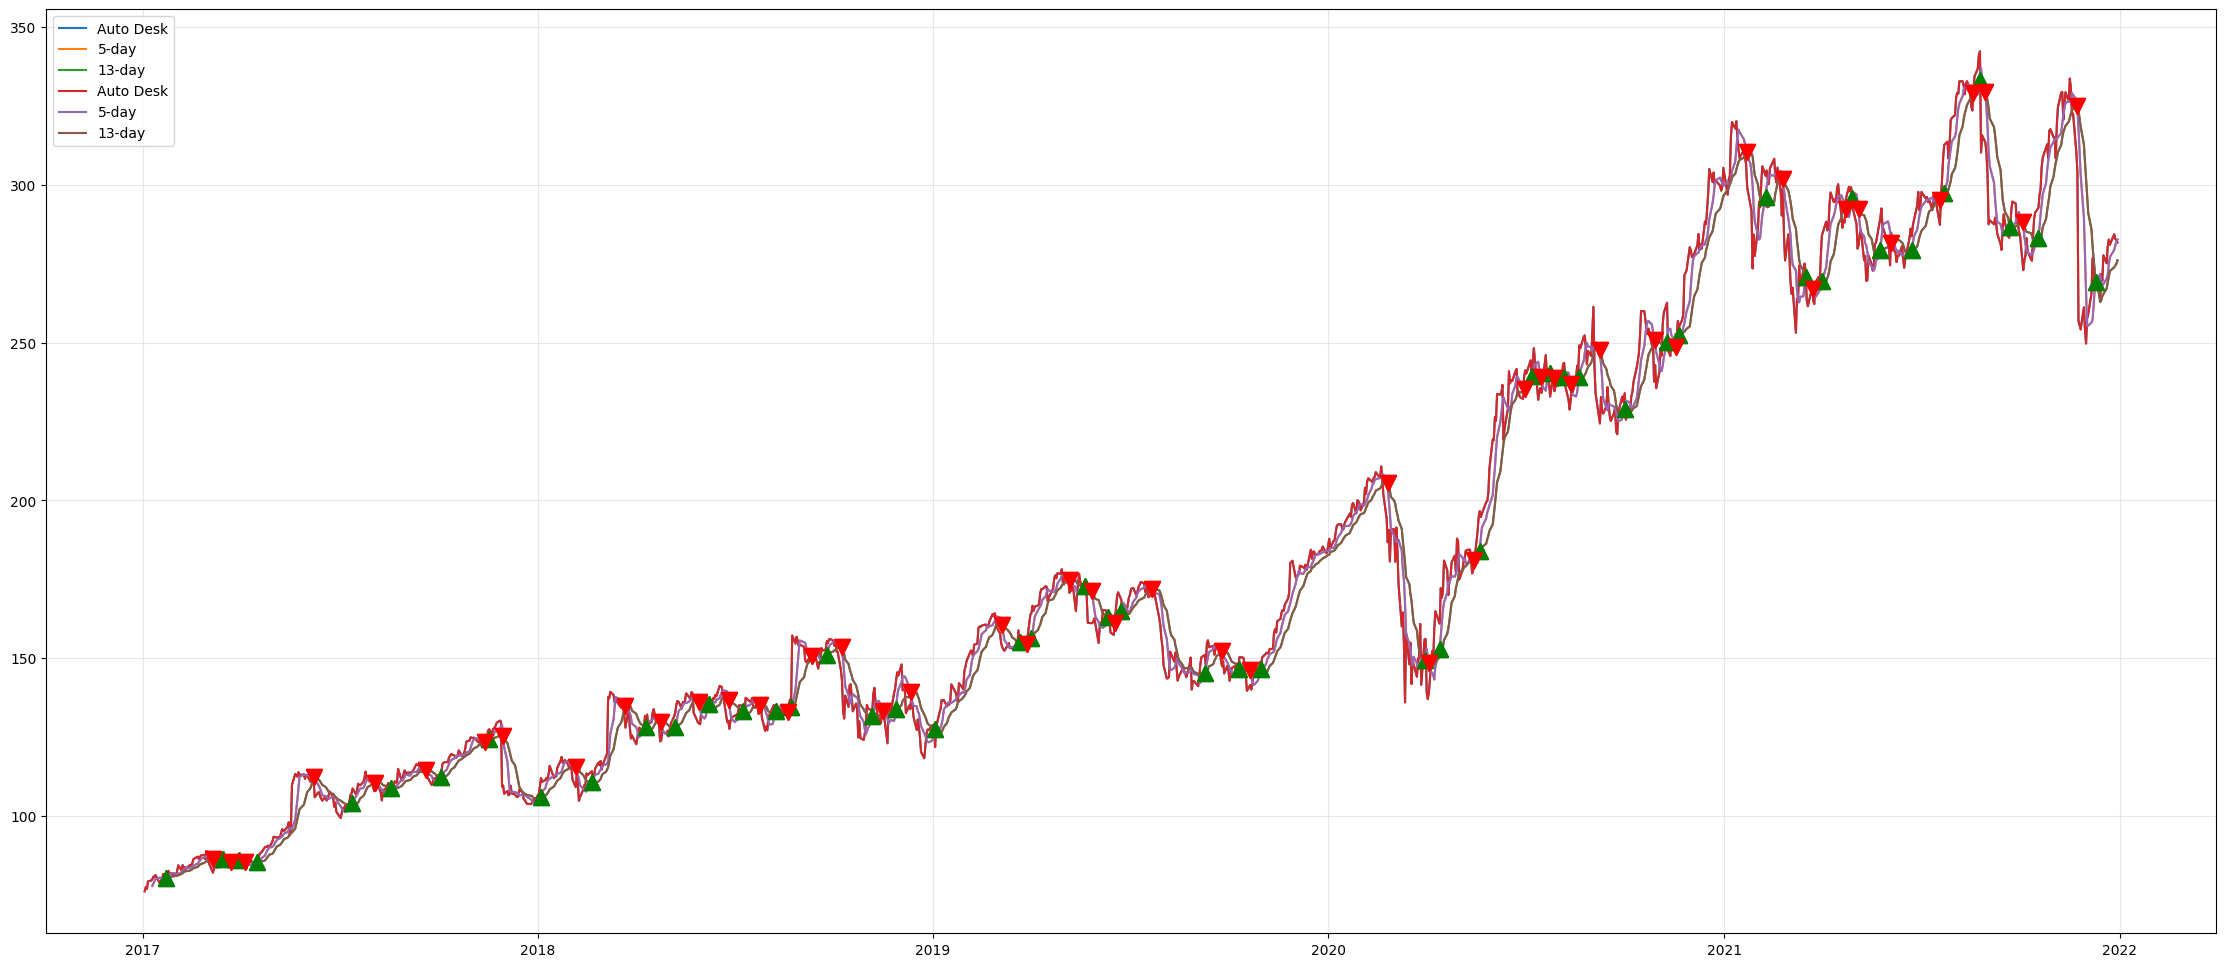

In [88]:
Autodesk_data['invested_2'] = np.where(Autodesk_data['5-day'] > Autodesk_data['13-day'], 1, 0) # Here invested = 1 if 5-day average is greater than 13-day average
Autodesk_data['signal_2'] = Autodesk_data['invested_2'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Autodesk_data['logClose_2'] = np.log(Autodesk_data['ADSK']) 
Autodesk_data['return_2'] = Autodesk_data['logClose_2'].diff() 
Autodesk_data['system_return_2'] = Autodesk_data['invested_2'] * Autodesk_data['return_2'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Autodesk_data['ADSK'], label = 'Auto Desk') # Actual Value
plt.plot(Autodesk_data['5-day'], label = '5-day') # 5-day Average
plt.plot(Autodesk_data['13-day'], label = '13-day') # 13-day Average
plt.plot(Autodesk_data.loc[Autodesk_data.signal_2 == 1].index, Autodesk_data['5-day'][Autodesk_data.signal_2 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Autodesk_data.loc[Autodesk_data.signal_2 == -1].index, Autodesk_data['13-day'][Autodesk_data.signal_2 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

* **Verisk**

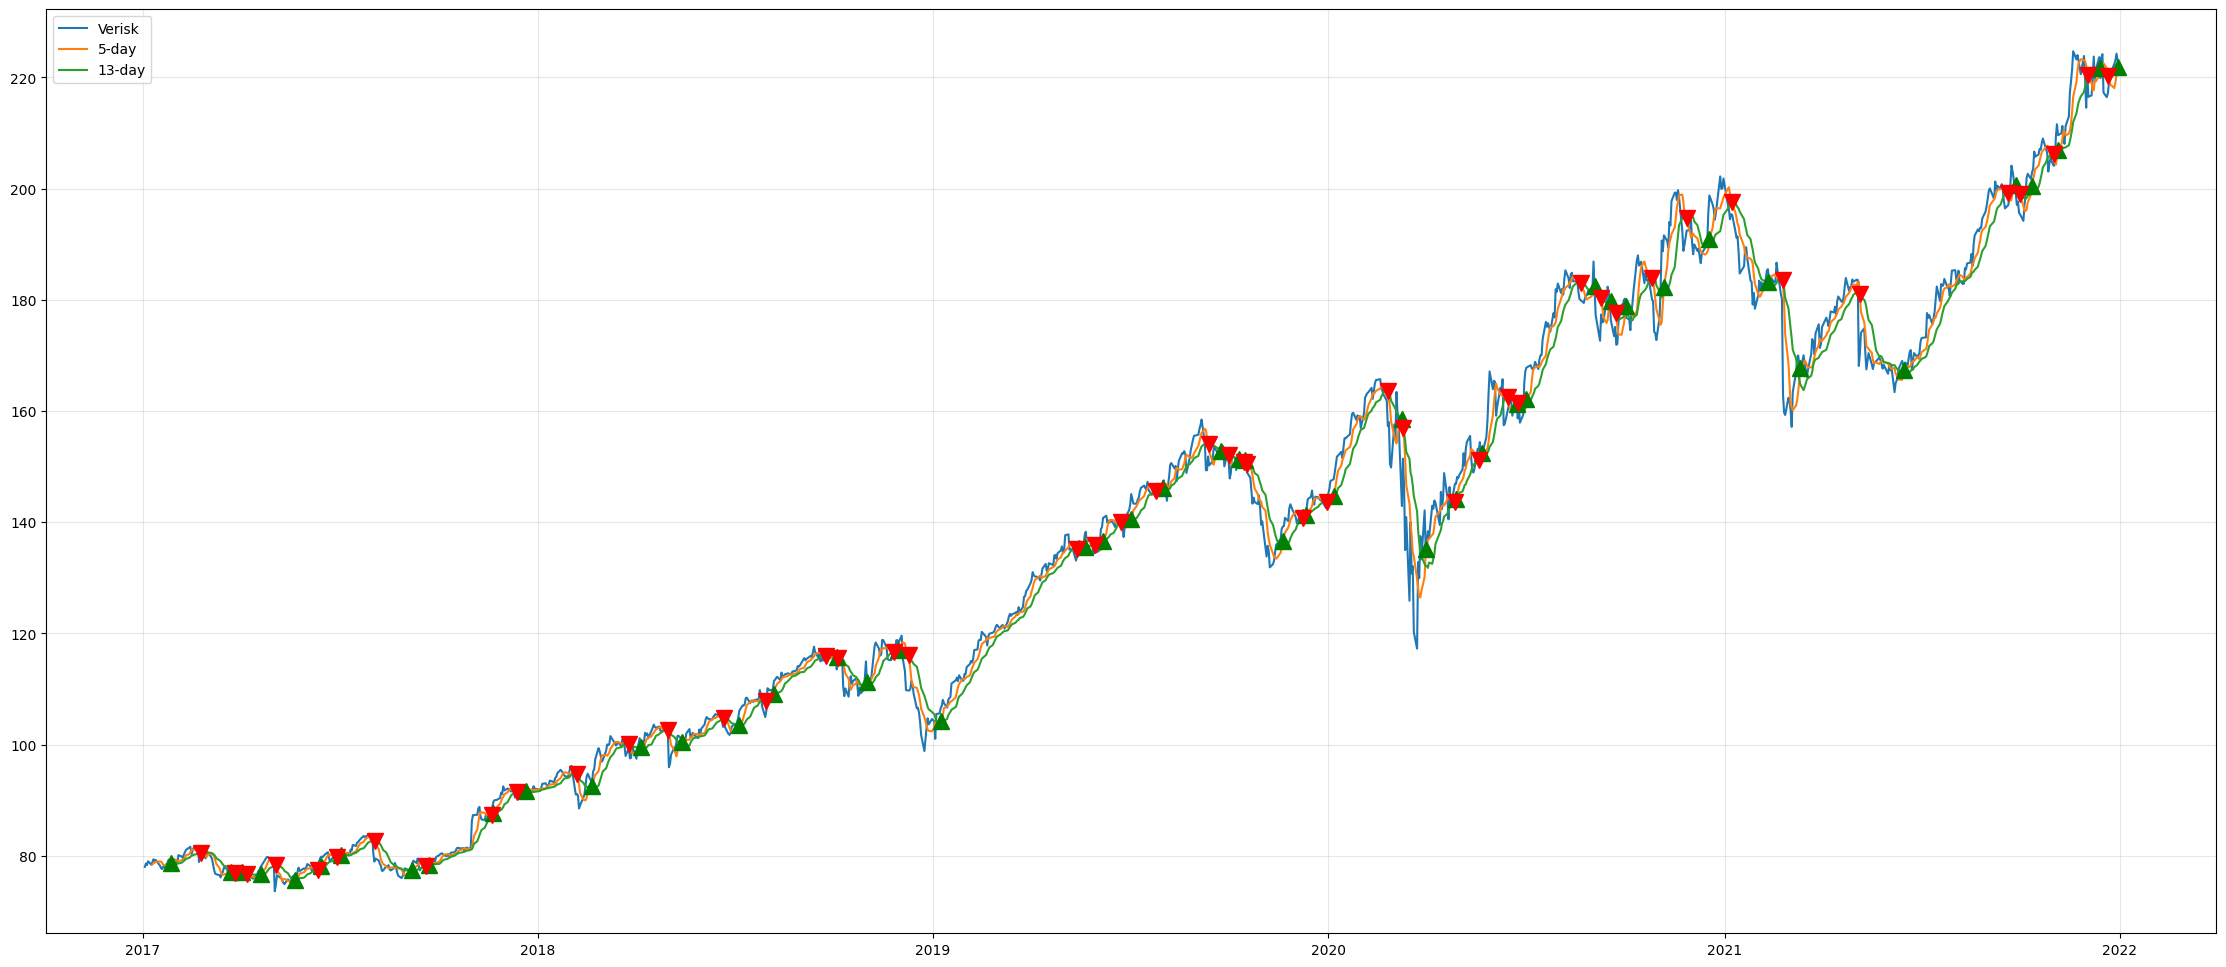

(<module 'matplotlib.pyplot' from '/Users/aditireddydoma/Desktop/miniconda3/lib/python3.13/site-packages/matplotlib/pyplot.py'>,
 None)

In [89]:
Verisk_data['invested_2'] = np.where(Verisk_data['5-day'] > Verisk_data['13-day'], 1, 0) # Here invested = 1 if 5-day average is greater than 13-day average
Verisk_data['signal_2'] = Verisk_data['invested_2'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Verisk_data['logClose_2'] = np.log(Verisk_data['VRSK']) 
Verisk_data['return_2'] = Verisk_data['logClose_2'].diff()
Verisk_data['system_return_2'] = Verisk_data['invested_2'] * Verisk_data['return_2']  # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Verisk_data['VRSK'], label = 'Verisk') # Actual Value
plt.plot(Verisk_data['5-day'], label = '5-day') # 5-day Average
plt.plot(Verisk_data['13-day'], label = '13-day') # 13-day Average
plt.plot(Verisk_data.loc[Verisk_data.signal_2 == 1].index, Verisk_data['5-day'][Verisk_data.signal_2 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Verisk_data.loc[Verisk_data.signal_2 == -1].index, Verisk_data['13-day'][Verisk_data.signal_2 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt,show()

### **50-Day / 200-Day Moving Average Strategy for Long-Term Investors**

In [90]:
# We use shift() to prevent data leakage
Mcd_data['50-day'] = Mcd_data['MCD'].rolling(50).mean().shift() # 50-Day Moving Average
Mcd_data['200-day'] = Mcd_data['MCD'].rolling(200).mean().shift() # 200-Day Moving Average

In [91]:
# We use shift() to prevent data leakage
Autodesk_data['50-day'] = Autodesk_data['ADSK'].rolling(50).mean().shift() # 50-Day Moving Average
Autodesk_data['200-day'] = Autodesk_data['ADSK'].rolling(200).mean().shift() # 200-Day Moving Average

In [92]:
# We use shift() to prevent data leakage
Verisk_data['50-day'] = Verisk_data['VRSK'].rolling(50).mean().shift() # 50-Day Moving Average
Verisk_data['200-day'] = Verisk_data['VRSK'].rolling(200).mean().shift() # 200-Day Moving Average

* **McDonald's**

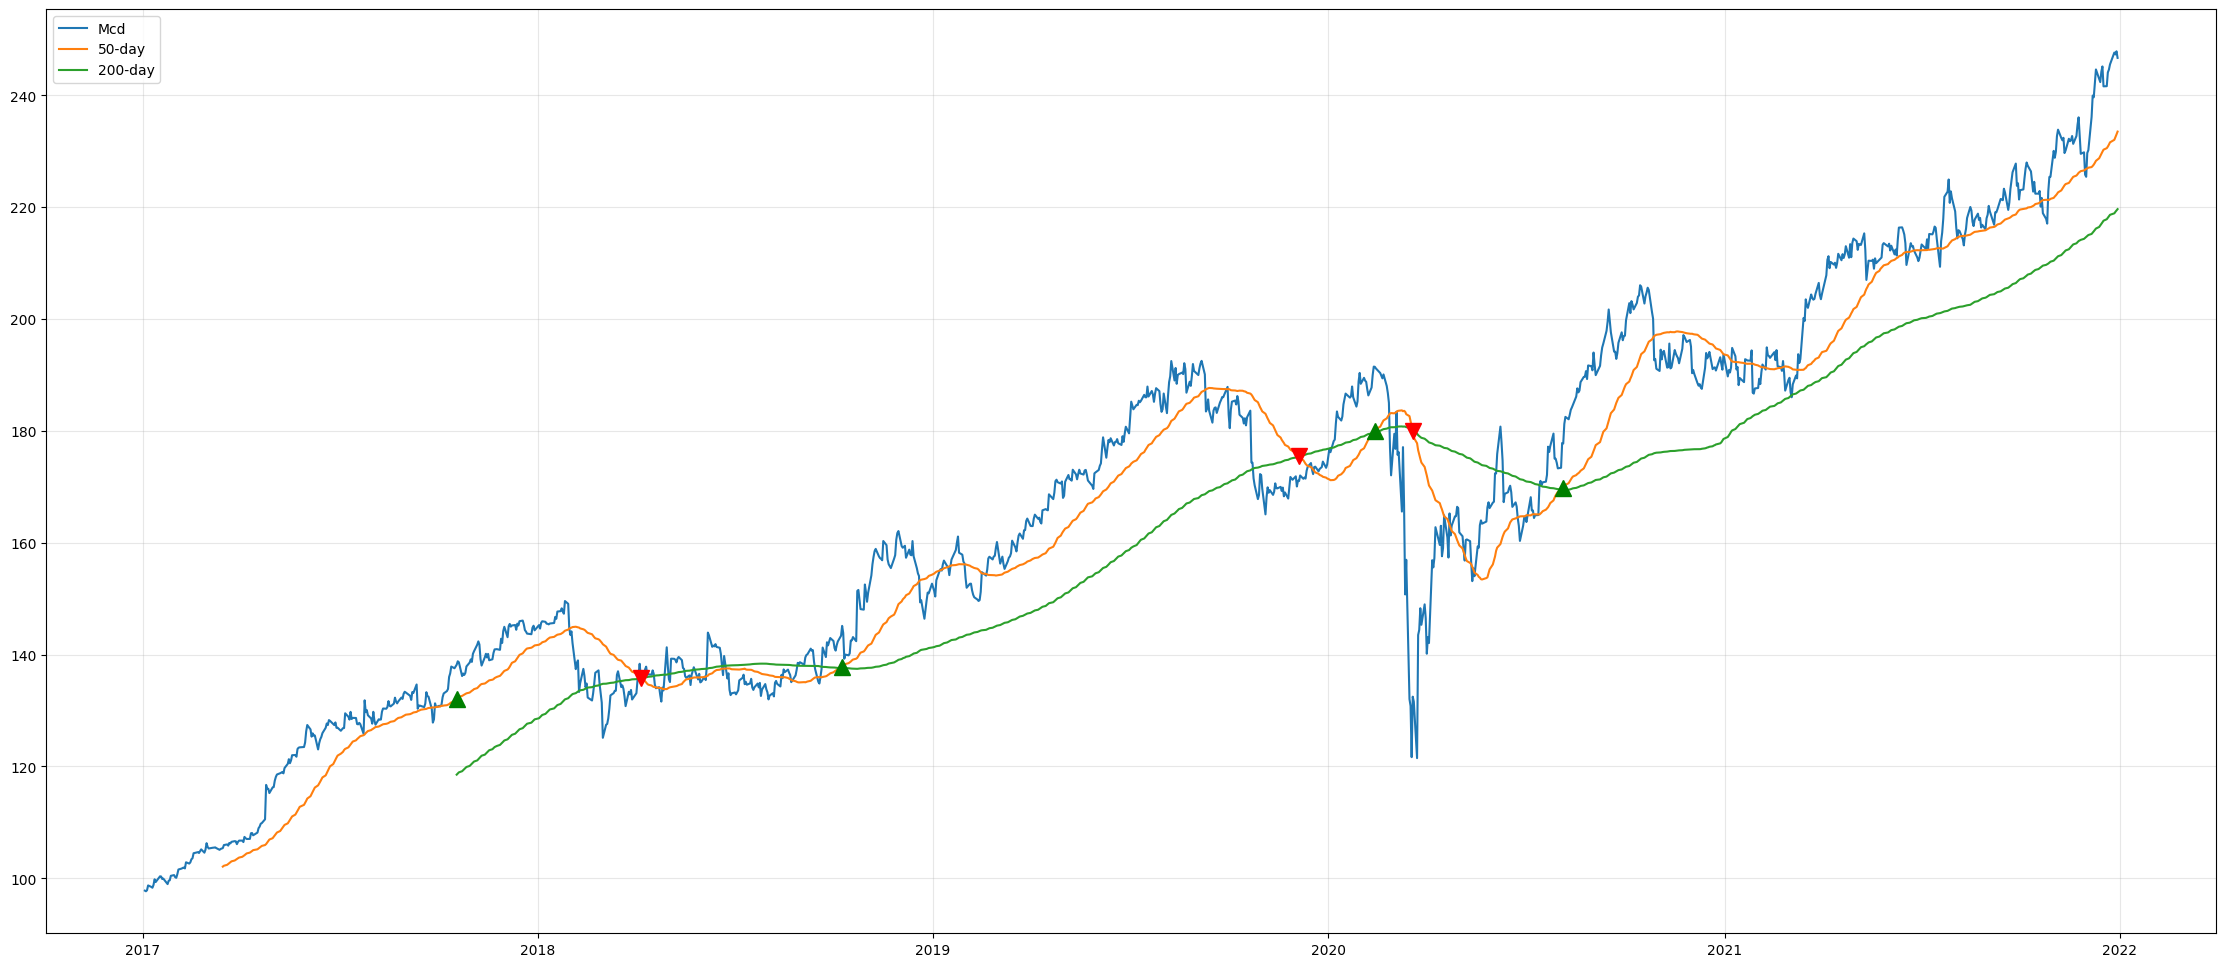

In [93]:
Mcd_data['invested_3'] = np.where(Mcd_data['50-day'] > Mcd_data['200-day'], 1, 0) # Here invested = 1 if 50-day average is greater than 200-day average
Mcd_data['signal_3'] = Mcd_data['invested_3'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Mcd_data['logClose_3'] = np.log(Mcd_data['MCD']) 
Mcd_data['return_3'] = Mcd_data['logClose_3'].diff() 
Mcd_data['system_return_3'] = Mcd_data['invested_3'] * Mcd_data['return_3'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Mcd_data['MCD'], label = 'Mcd') # Actual Value
plt.plot(Mcd_data['50-day'], label = '50-day') # 50-day Average
plt.plot(Mcd_data['200-day'], label = '200-day') # 200-day Average
plt.plot(Mcd_data.loc[Mcd_data.signal_3 == 1].index, Mcd_data['50-day'][Mcd_data.signal_3 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Mcd_data.loc[Mcd_data.signal_3 == -1].index, Mcd_data['200-day'][Mcd_data.signal_3 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

* **Autodesk**

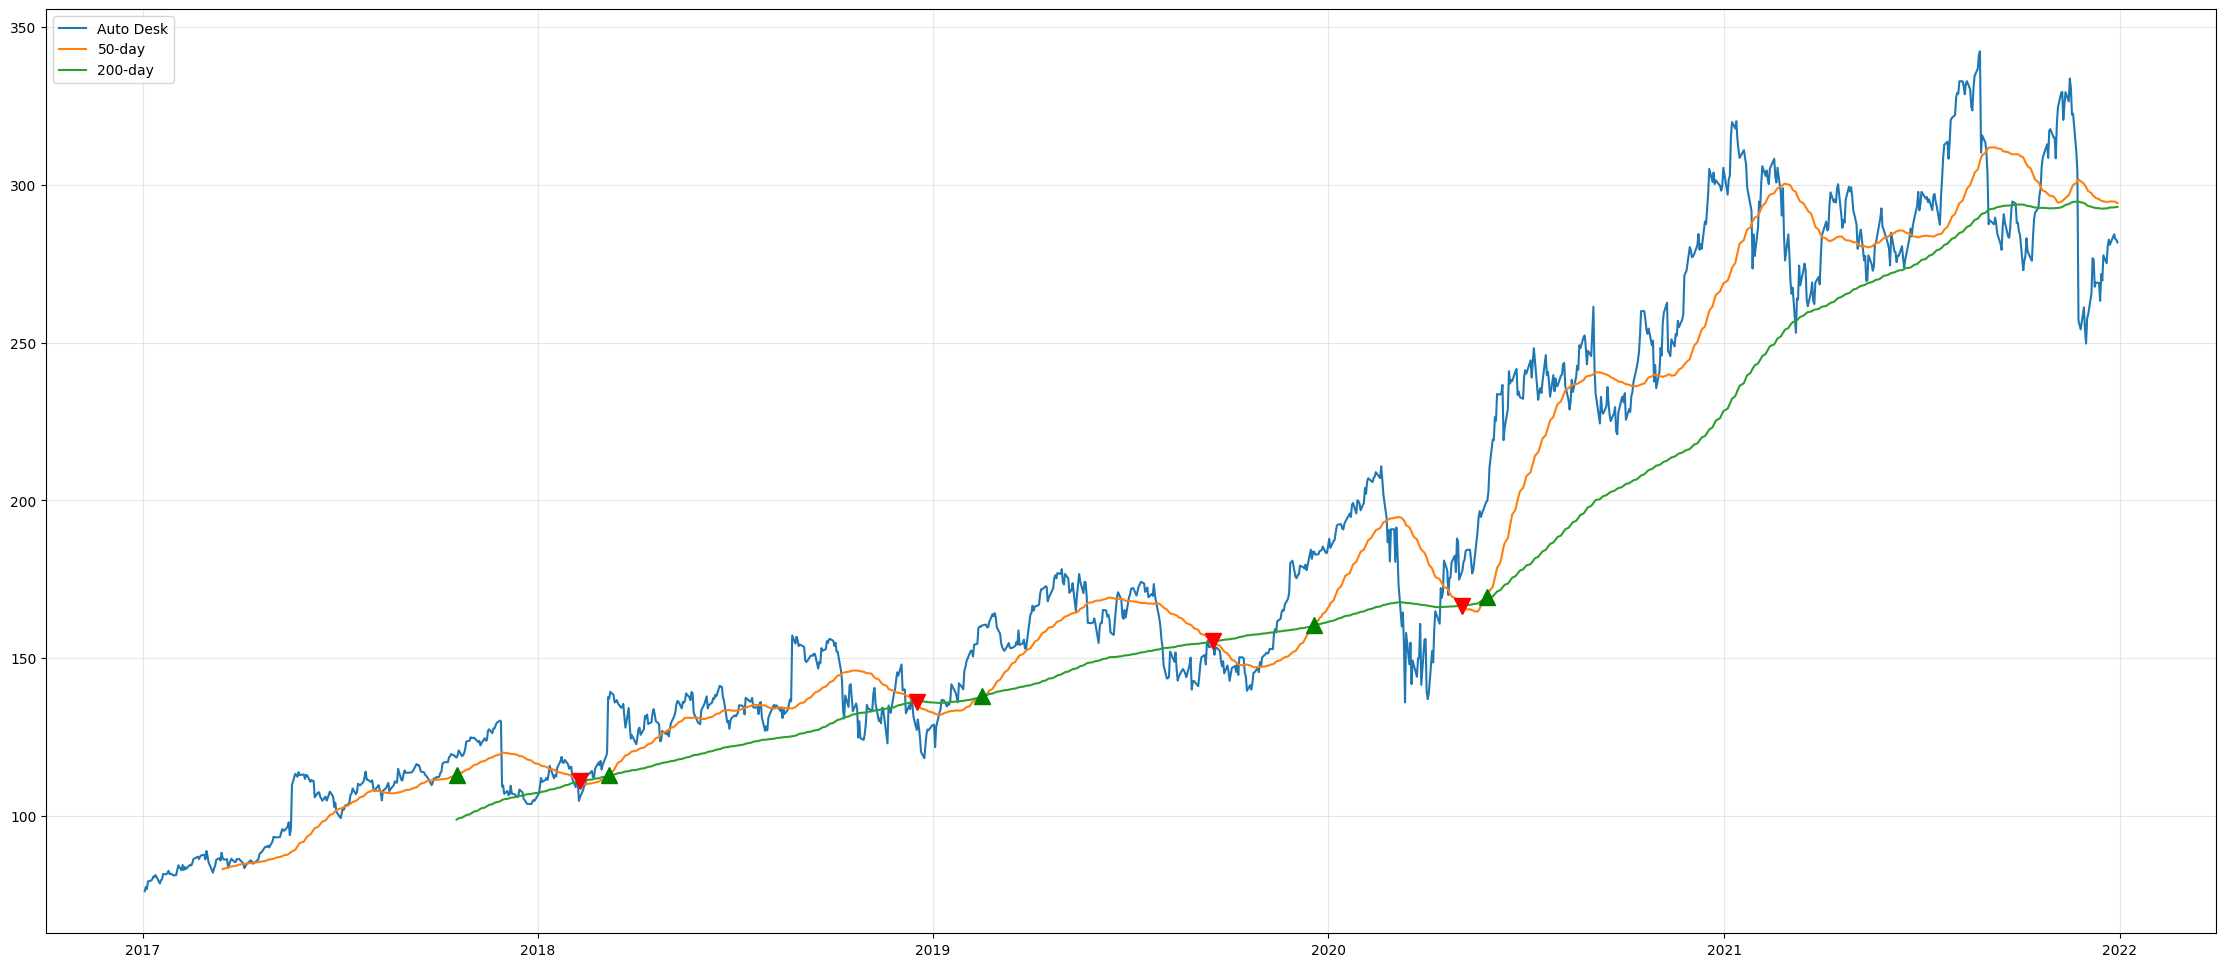

In [94]:
Autodesk_data['invested_3'] = np.where(Autodesk_data['50-day'] > Autodesk_data['200-day'], 1, 0) # Here invested = 1 if 50-day average is greater than 200-day average
Autodesk_data['signal_3'] = Autodesk_data['invested_3'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Autodesk_data['logClose_3'] = np.log(Autodesk_data['ADSK']) 
Autodesk_data['return_3'] = Autodesk_data['logClose_3'].diff() 
Autodesk_data['system_return_3'] = Autodesk_data['invested_3'] * Autodesk_data['return_3'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Autodesk_data['ADSK'], label = 'Auto Desk') # Actual Value
plt.plot(Autodesk_data['50-day'], label = '50-day') # 50-day Average
plt.plot(Autodesk_data['200-day'], label = '200-day') # 200-day Average
plt.plot(Autodesk_data.loc[Autodesk_data.signal_3 == 1].index, Autodesk_data['50-day'][Autodesk_data.signal_3 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Autodesk_data.loc[Autodesk_data.signal_3 == -1].index, Autodesk_data['200-day'][Autodesk_data.signal_3 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

* **Verisk**

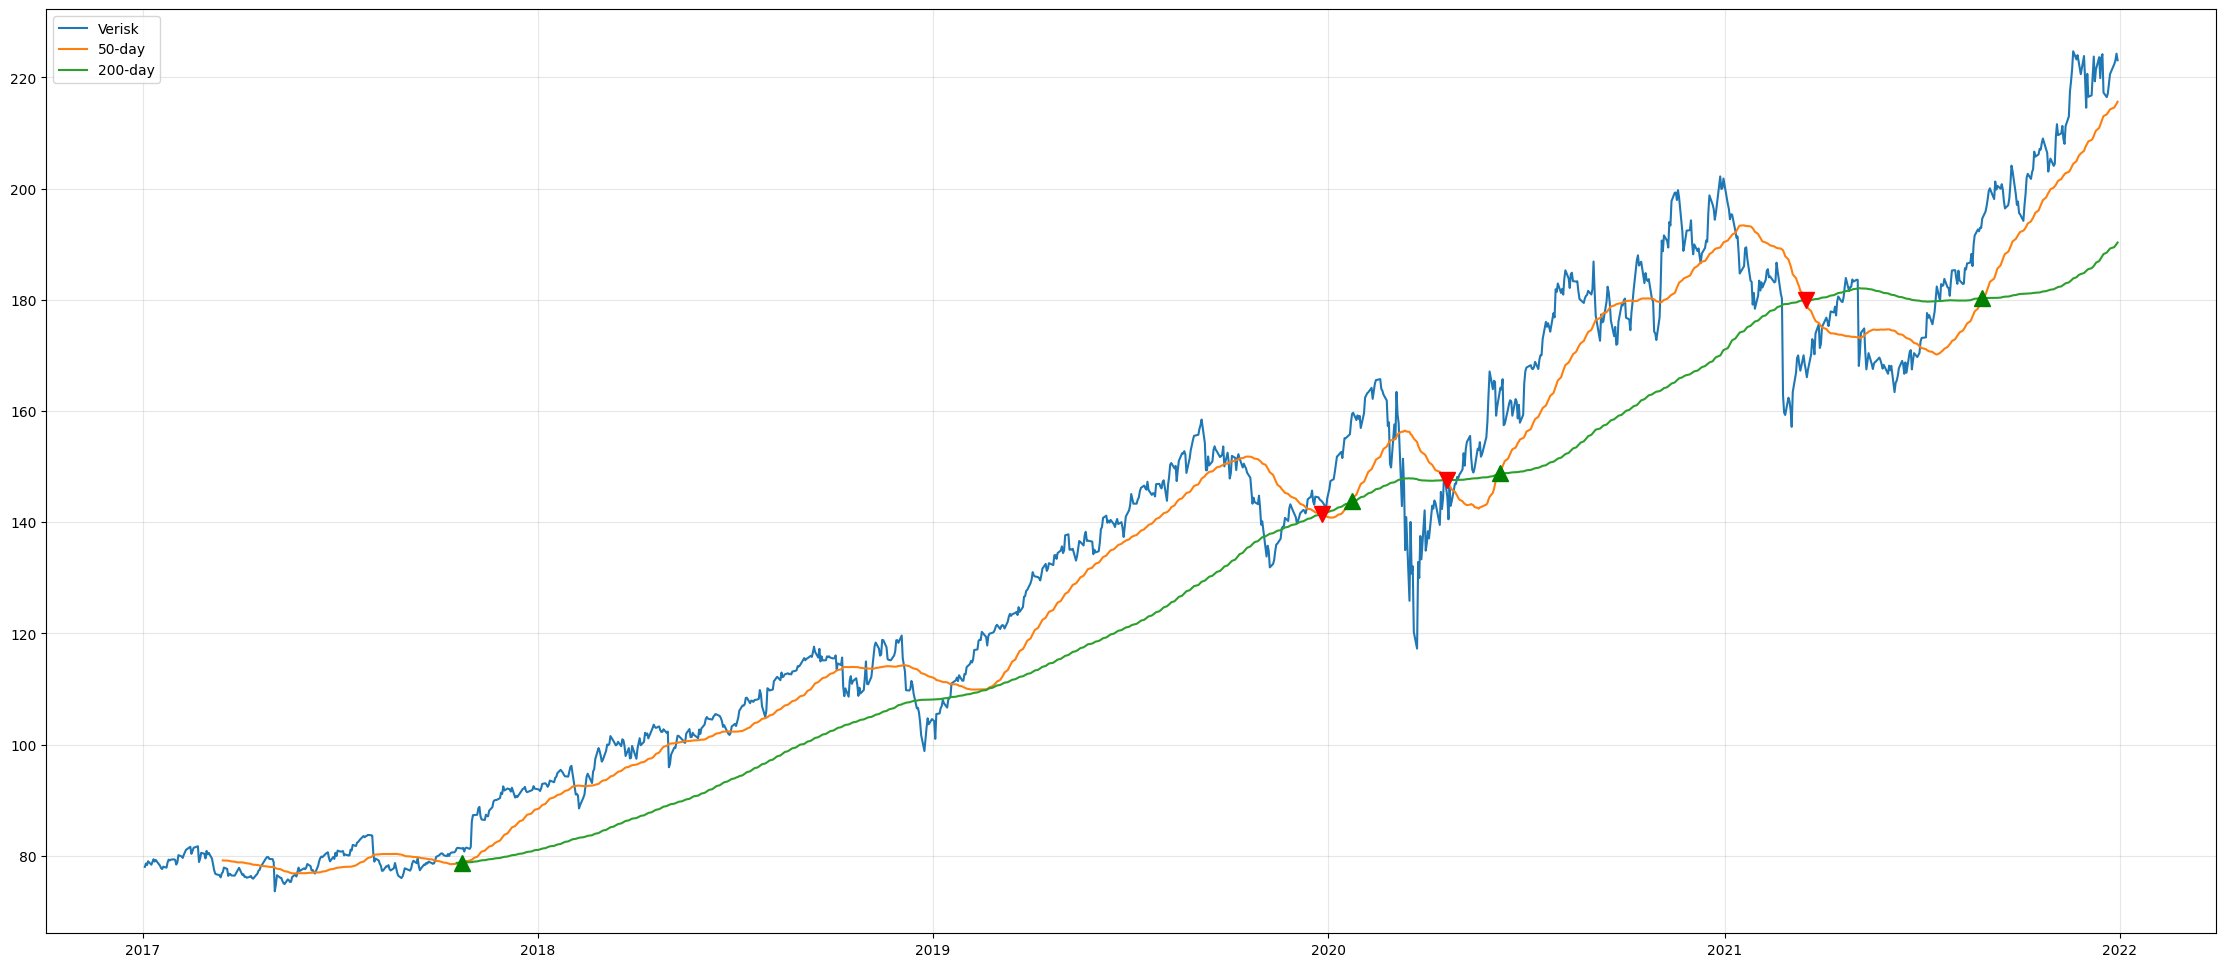

In [95]:
Verisk_data['invested_3'] = np.where(Verisk_data['50-day'] > Verisk_data['200-day'], 1, 0) # Here invested = 1 if 50-day average is greater than 200-day average
Verisk_data['signal_3'] = Verisk_data['invested_3'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Verisk_data['logClose_3'] = np.log(Verisk_data['VRSK']) 
Verisk_data['return_3'] = Verisk_data['logClose_3'].diff() 
Verisk_data['system_return_3'] = Verisk_data['invested_3'] * Verisk_data['return_3'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Verisk_data['VRSK'], label = 'Verisk') # Actual Value
plt.plot(Verisk_data['50-day'], label = '50-day') # 50-day average
plt.plot(Verisk_data['200-day'], label = '200-day') # 200-day average
plt.plot(Verisk_data.loc[Verisk_data.signal_3 == 1].index, Verisk_data['50-day'][Verisk_data.signal_3 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Verisk_data.loc[Verisk_data.signal_3 == -1].index, Verisk_data['200-day'][Verisk_data.signal_3 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

### **21-Day / 55-Day Moving Average Strategy**

In [96]:
# We use shift() to prevent data leakage
Mcd_data['21-day'] = Mcd_data['MCD'].rolling(21).mean().shift() # 21-Day Moving Average
Mcd_data['55-day'] = Mcd_data['MCD'].rolling(55).mean().shift() # 55-Day Moving Average

In [97]:
# We use shift() to prevent data leakage
Autodesk_data['21-day'] = Autodesk_data['ADSK'].rolling(21).mean().shift() # 21-Day Moving Average
Autodesk_data['55-day'] = Autodesk_data['ADSK'].rolling(55).mean().shift() # 55-Day Moving Average

In [98]:
# We use shift() to prevent data leakage
Verisk_data['21-day'] = Verisk_data['VRSK'].rolling(21).mean().shift() # 21-Day Moving Average
Verisk_data['55-day'] = Verisk_data['VRSK'].rolling(55).mean().shift() # 55-Day Moving Average

* **McDonald's**

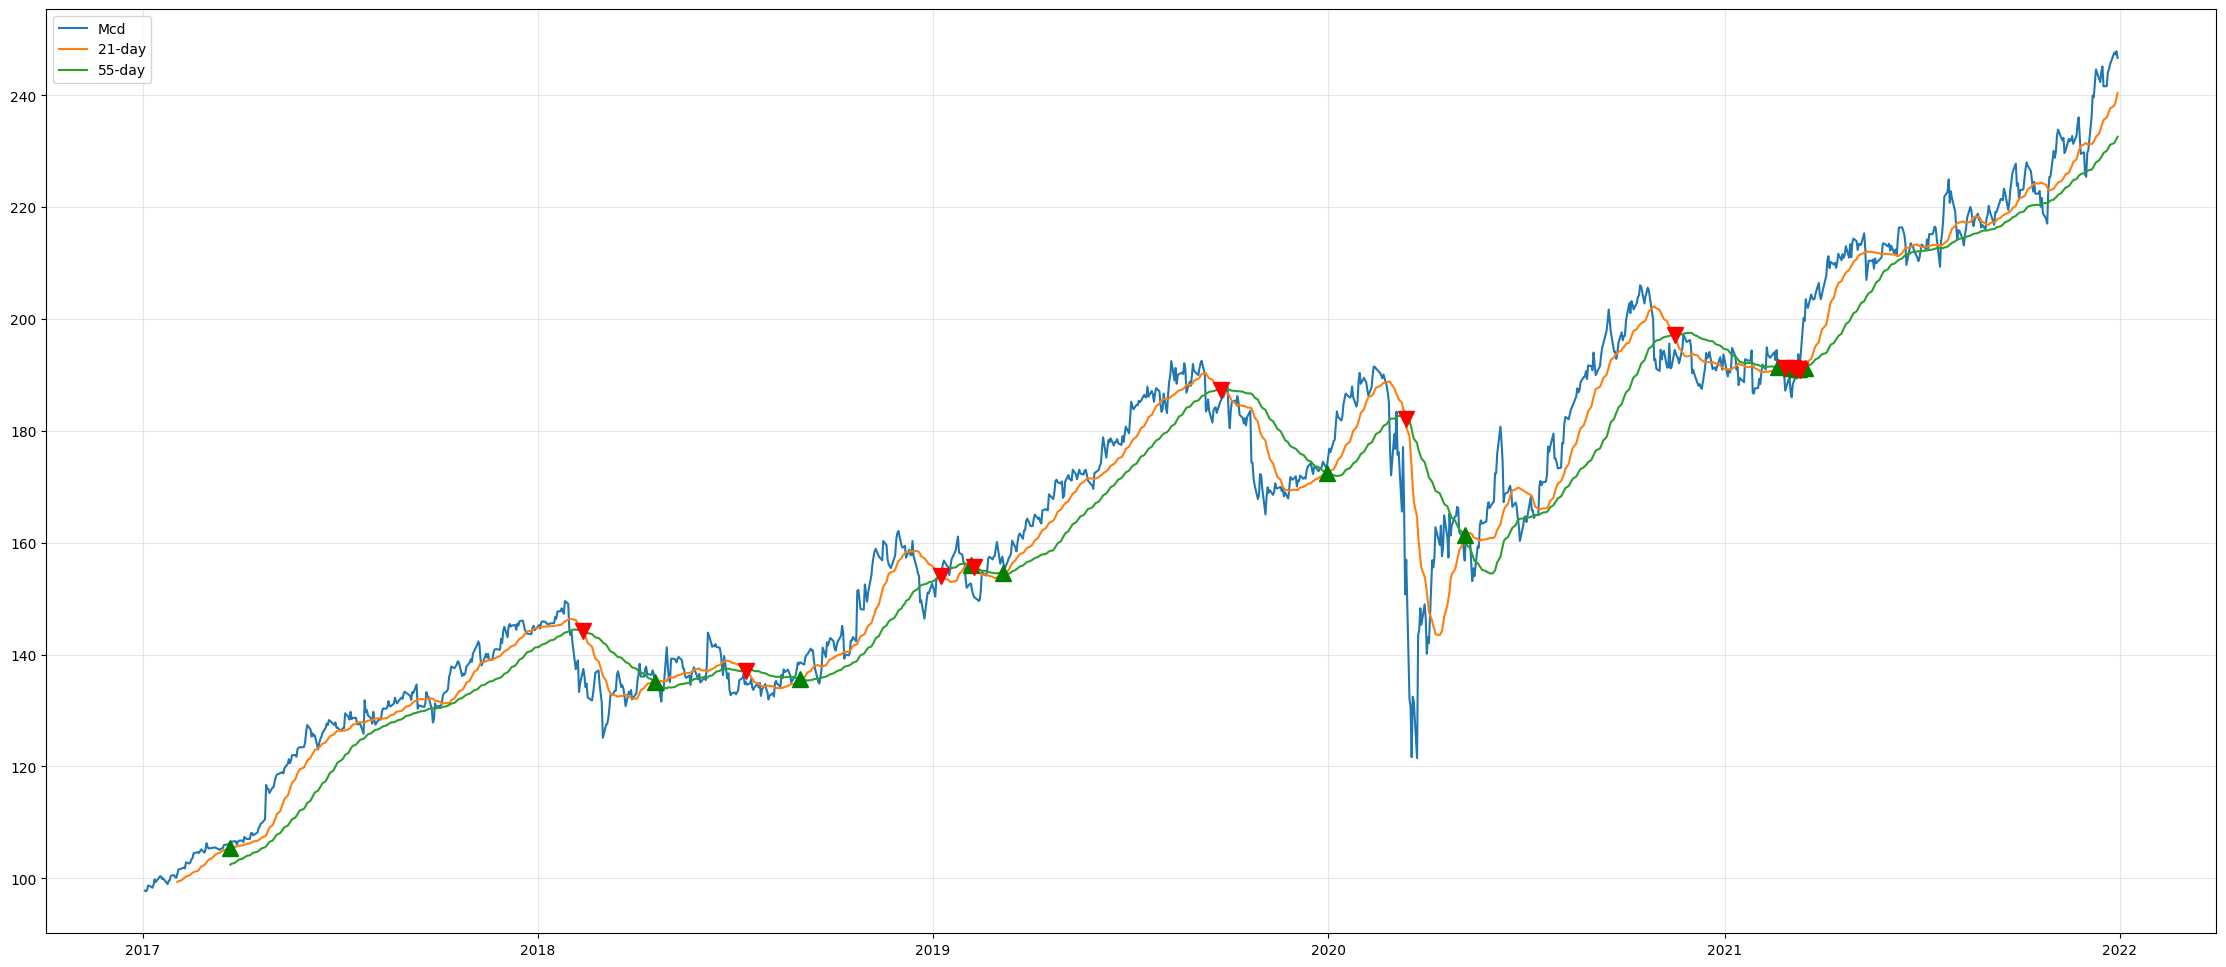

In [99]:
Mcd_data['invested_4'] = np.where(Mcd_data['21-day'] > Mcd_data['55-day'], 1, 0) # Here invested = 1 if 21-day average is greater than 55-day average
Mcd_data['signal_4'] = Mcd_data['invested_4'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Mcd_data['logClose_4'] = np.log(Mcd_data['MCD'])
Mcd_data['return_4'] = Mcd_data['logClose_4'].diff()
Mcd_data['system_return_4'] = Mcd_data['invested_4'] * Mcd_data['return_4'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Mcd_data['MCD'], label = 'Mcd') # Actual Value
plt.plot(Mcd_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Mcd_data['55-day'], label = '55-day') # 55-day Average
plt.plot(Mcd_data.loc[Mcd_data.signal_4 == 1].index, Mcd_data['21-day'][Mcd_data.signal_4 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Mcd_data.loc[Mcd_data.signal_4 == -1].index, Mcd_data['55-day'][Mcd_data.signal_4 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

* **Autodesk**

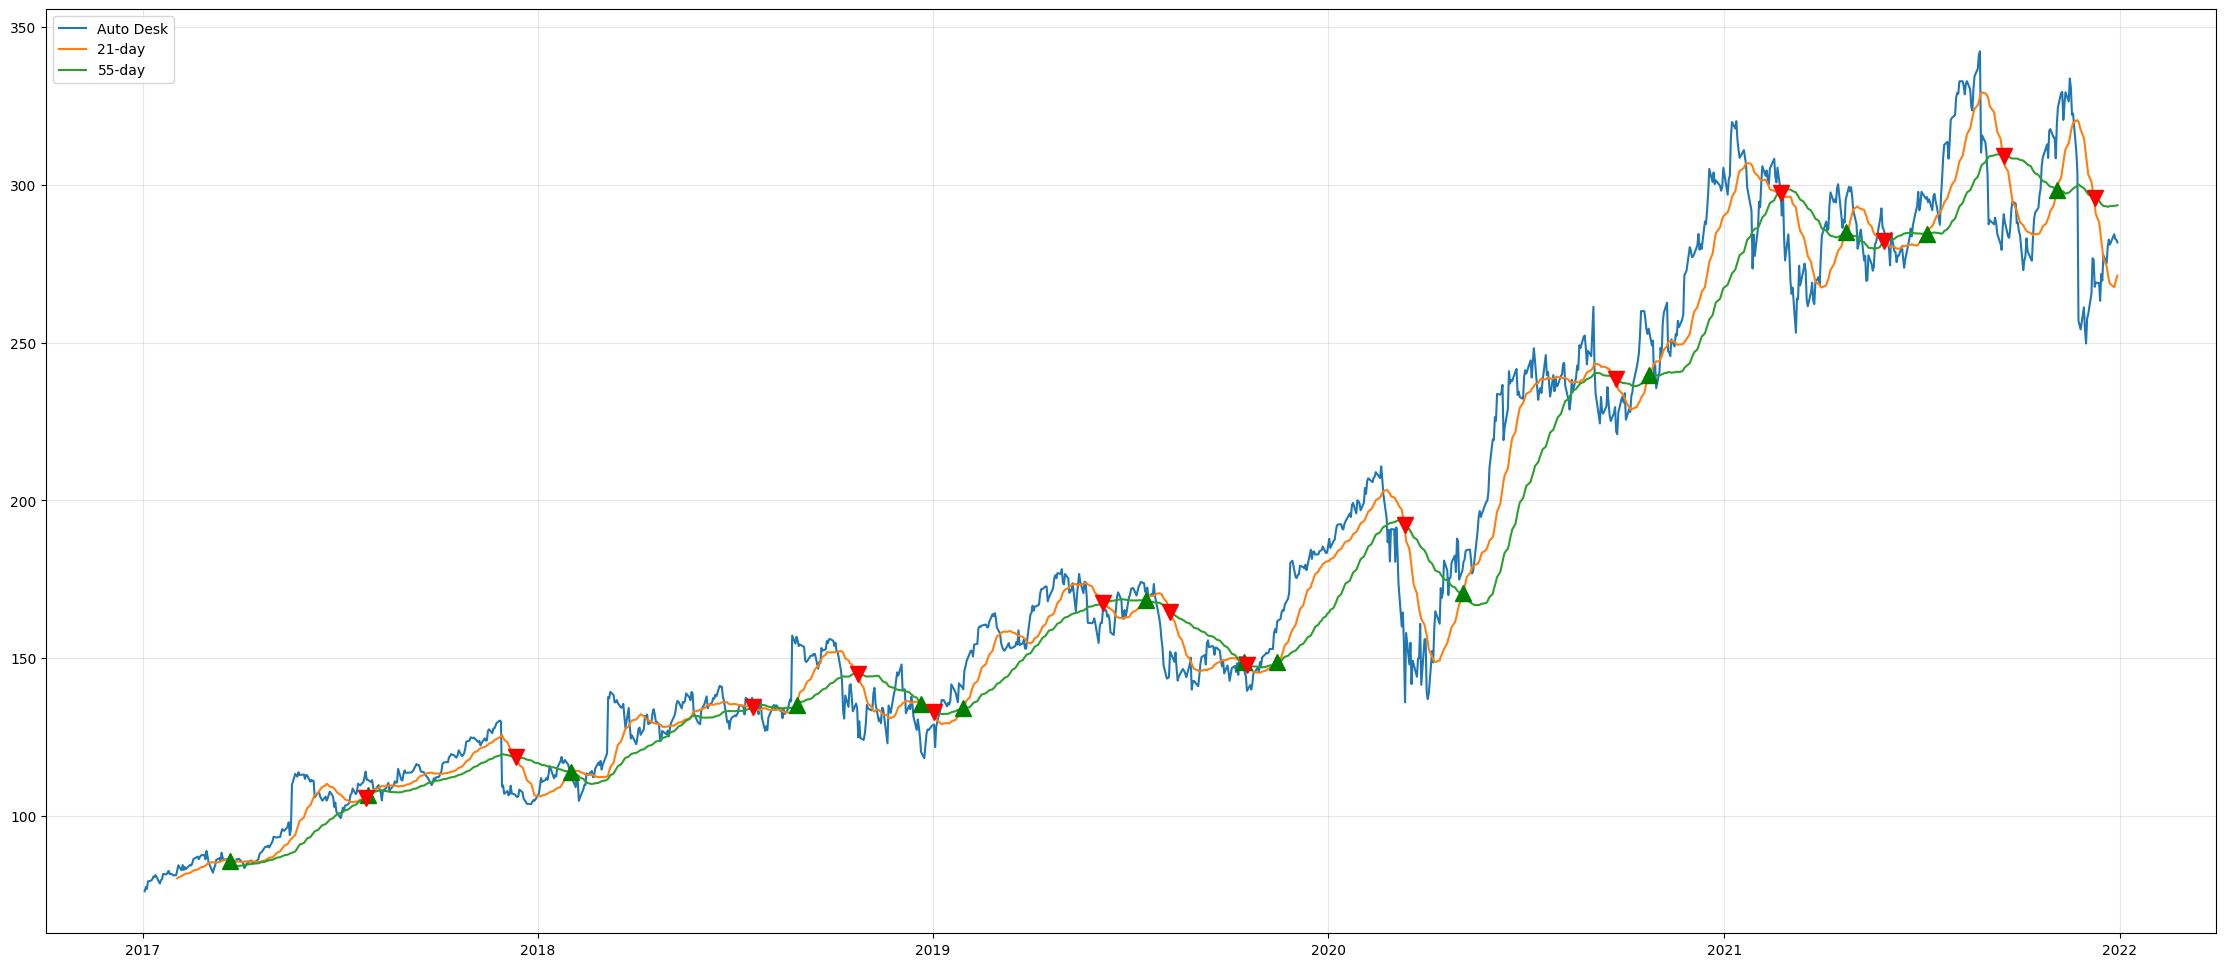

In [100]:
Autodesk_data['invested_4'] = np.where(Autodesk_data['21-day'] > Autodesk_data['55-day'], 1, 0) # Here invested = 1 if 21-day average is greater than 55-day average
Autodesk_data['signal_4'] = Autodesk_data['invested_4'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Autodesk_data['logClose_4'] = np.log(Autodesk_data['ADSK']) 
Autodesk_data['return_4'] = Autodesk_data['logClose_4'].diff() 
Autodesk_data['system_return_4'] = Autodesk_data['invested_4'] * Autodesk_data['return_4'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Autodesk_data['ADSK'], label = 'Auto Desk') # Actual Value
plt.plot(Autodesk_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Autodesk_data['55-day'], label = '55-day') # 55-day Average
plt.plot(Autodesk_data.loc[Autodesk_data.signal_4 == 1].index, Autodesk_data['21-day'][Autodesk_data.signal_4 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Autodesk_data.loc[Autodesk_data.signal_4 == -1].index, Autodesk_data['55-day'][Autodesk_data.signal_4 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

* **Verisk**

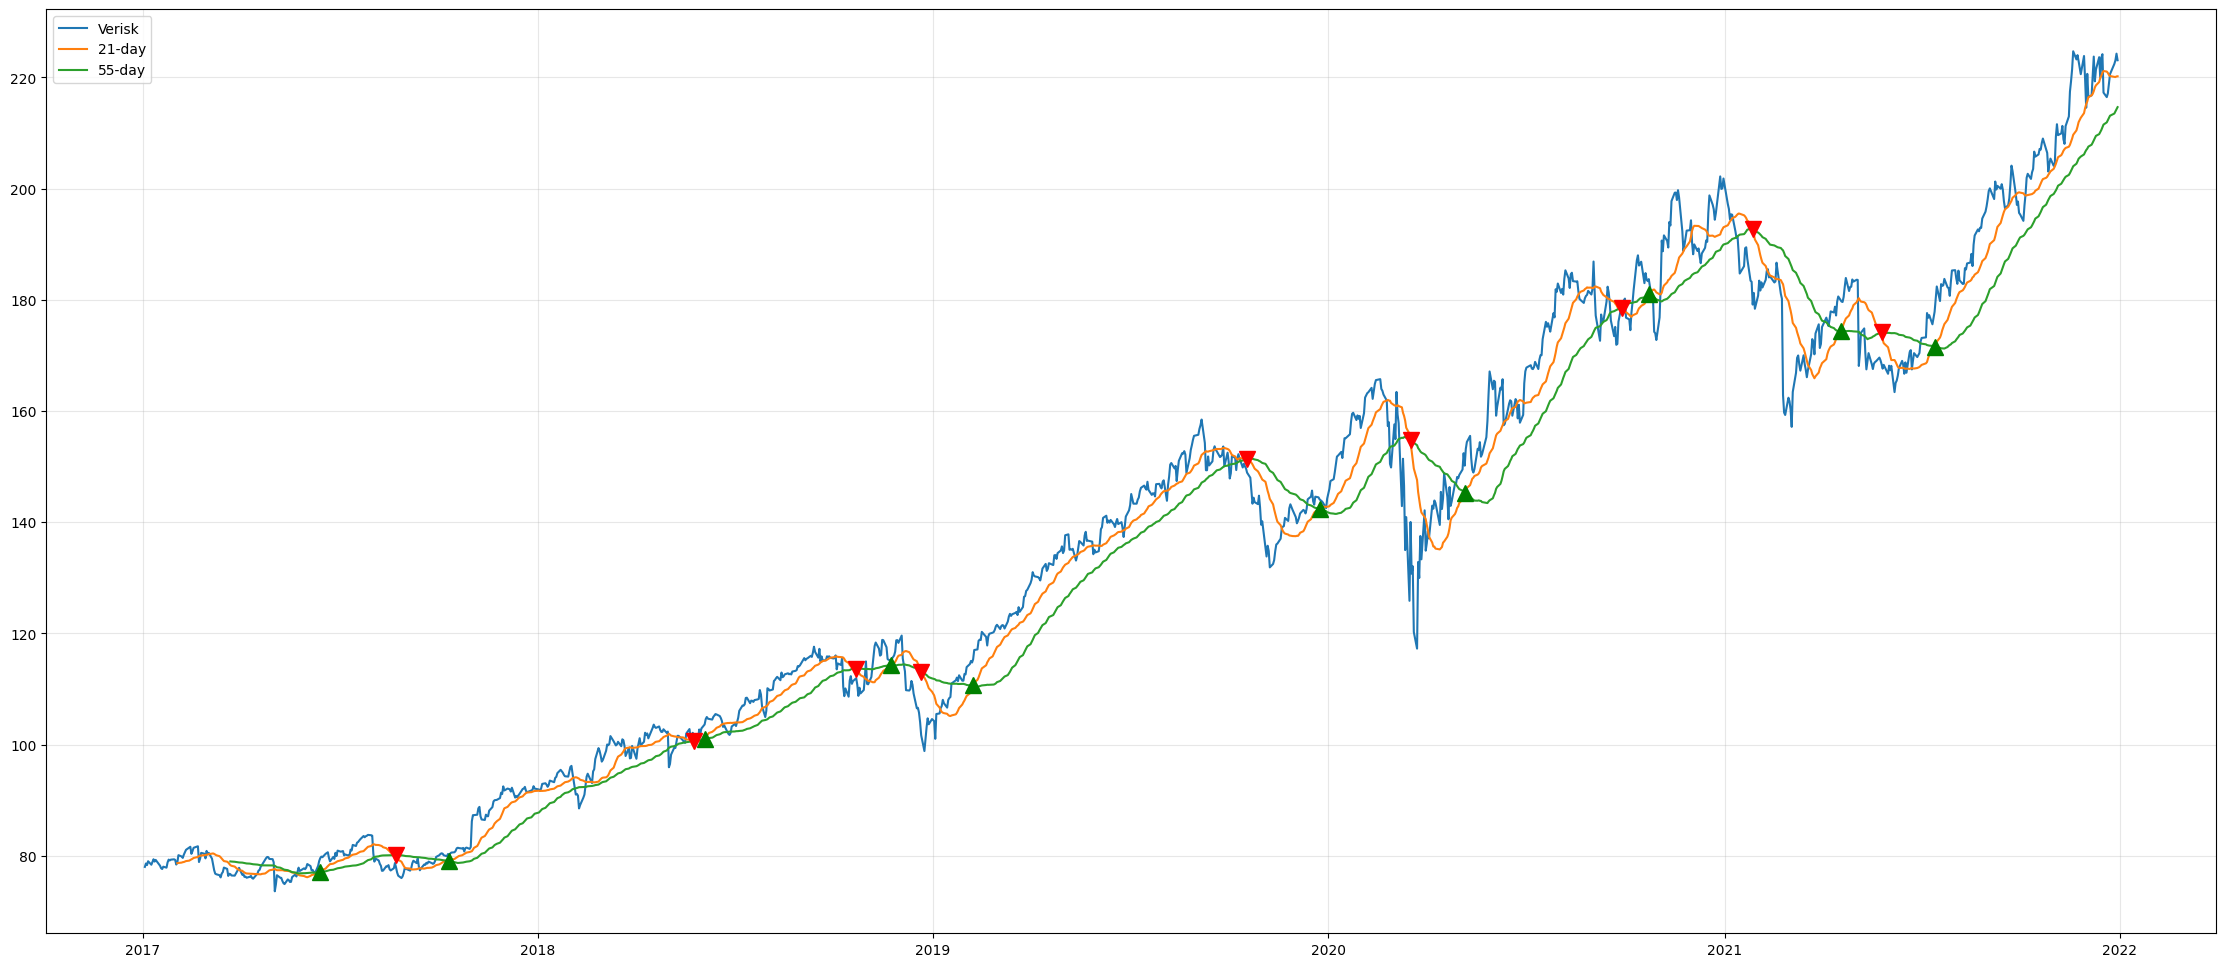

In [101]:
Verisk_data['invested_4'] = np.where(Verisk_data['21-day'] > Verisk_data['55-day'], 1, 0) # Here invested = 1 if 21-day average is greater than 55-day average
Verisk_data['signal_4'] = Verisk_data['invested_4'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Verisk_data['logClose_4'] = np.log(Verisk_data['VRSK']) 
Verisk_data['return_4'] = Verisk_data['logClose_4'].diff() 
Verisk_data['system_return_4'] = Verisk_data['invested_4'] * Verisk_data['return_4'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Verisk_data['VRSK'], label = 'Verisk') # Actual Value
plt.plot(Verisk_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Verisk_data['55-day'], label = '55-day') # 55-day Average
plt.plot(Verisk_data.loc[Verisk_data.signal_4 == 1].index, Verisk_data['21-day'][Verisk_data.signal_4 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Verisk_data.loc[Verisk_data.signal_4 == -1].index, Verisk_data['55-day'][Verisk_data.signal_4 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

### **15-Day / 30-Day Moving Average Strategy**

In [102]:
# We use shift() to prevent data leakage
Mcd_data['15-day'] = Mcd_data['MCD'].rolling(15).mean().shift() # 15-Day Moving Average
Mcd_data['30-day'] = Mcd_data['MCD'].rolling(30).mean().shift() # 30-Day Moving Average

In [103]:
# We use shift() to prevent data leakage
Autodesk_data['15-day'] = Autodesk_data['ADSK'].rolling(15).mean().shift() # 15-Day Moving Average
Autodesk_data['30-day'] = Autodesk_data['ADSK'].rolling(30).mean().shift() # 30-Day Moving Average

In [104]:
# We use shift() to prevent data leakage
Verisk_data['15-day'] = Verisk_data['VRSK'].rolling(15).mean().shift() # 15-Day Moving Average
Verisk_data['30-day'] = Verisk_data['VRSK'].rolling(30).mean().shift() # 30-Day Moving Average

* **McDonald's**

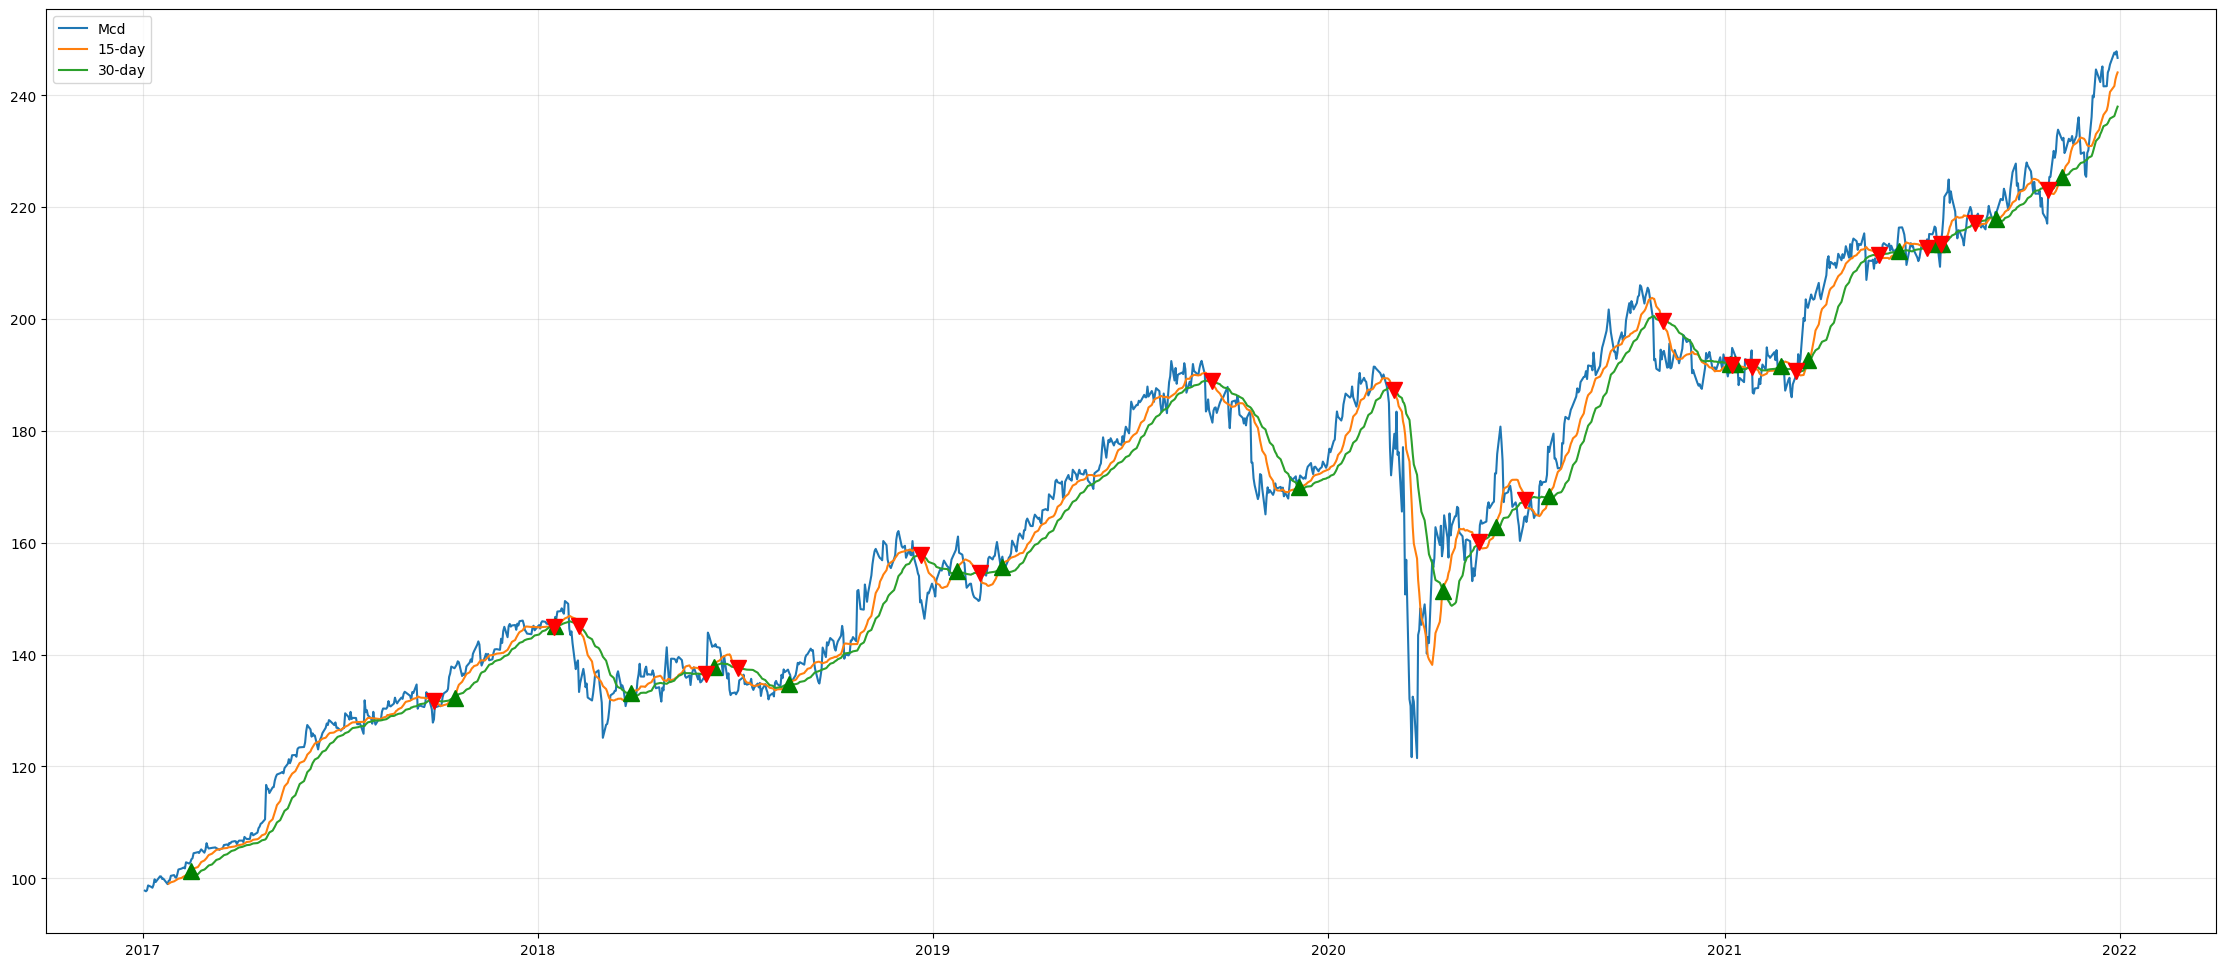

In [105]:
Mcd_data['invested_5'] = np.where(Mcd_data['15-day'] > Mcd_data['30-day'], 1, 0) # Here invested = 1 if 15-day average is greater than 30-day average
Mcd_data['signal_5'] = Mcd_data['invested_5'].diff()  # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Mcd_data['logClose_5'] = np.log(Mcd_data['MCD']) 
Mcd_data['return_5'] = Mcd_data['logClose_5'].diff() 
Mcd_data['system_return_5'] = Mcd_data['invested_5'] * Mcd_data['return_5'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Mcd_data['MCD'], label = 'Mcd') # Actual Value
plt.plot(Mcd_data['15-day'], label = '15-day') # 15-day Average
plt.plot(Mcd_data['30-day'], label = '30-day') # 30-day Average
plt.plot(Mcd_data.loc[Mcd_data.signal_5 == 1].index, Mcd_data['15-day'][Mcd_data.signal_5 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Mcd_data.loc[Mcd_data.signal_5 == -1].index, Mcd_data['30-day'][Mcd_data.signal_5 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

* **Autodesk**

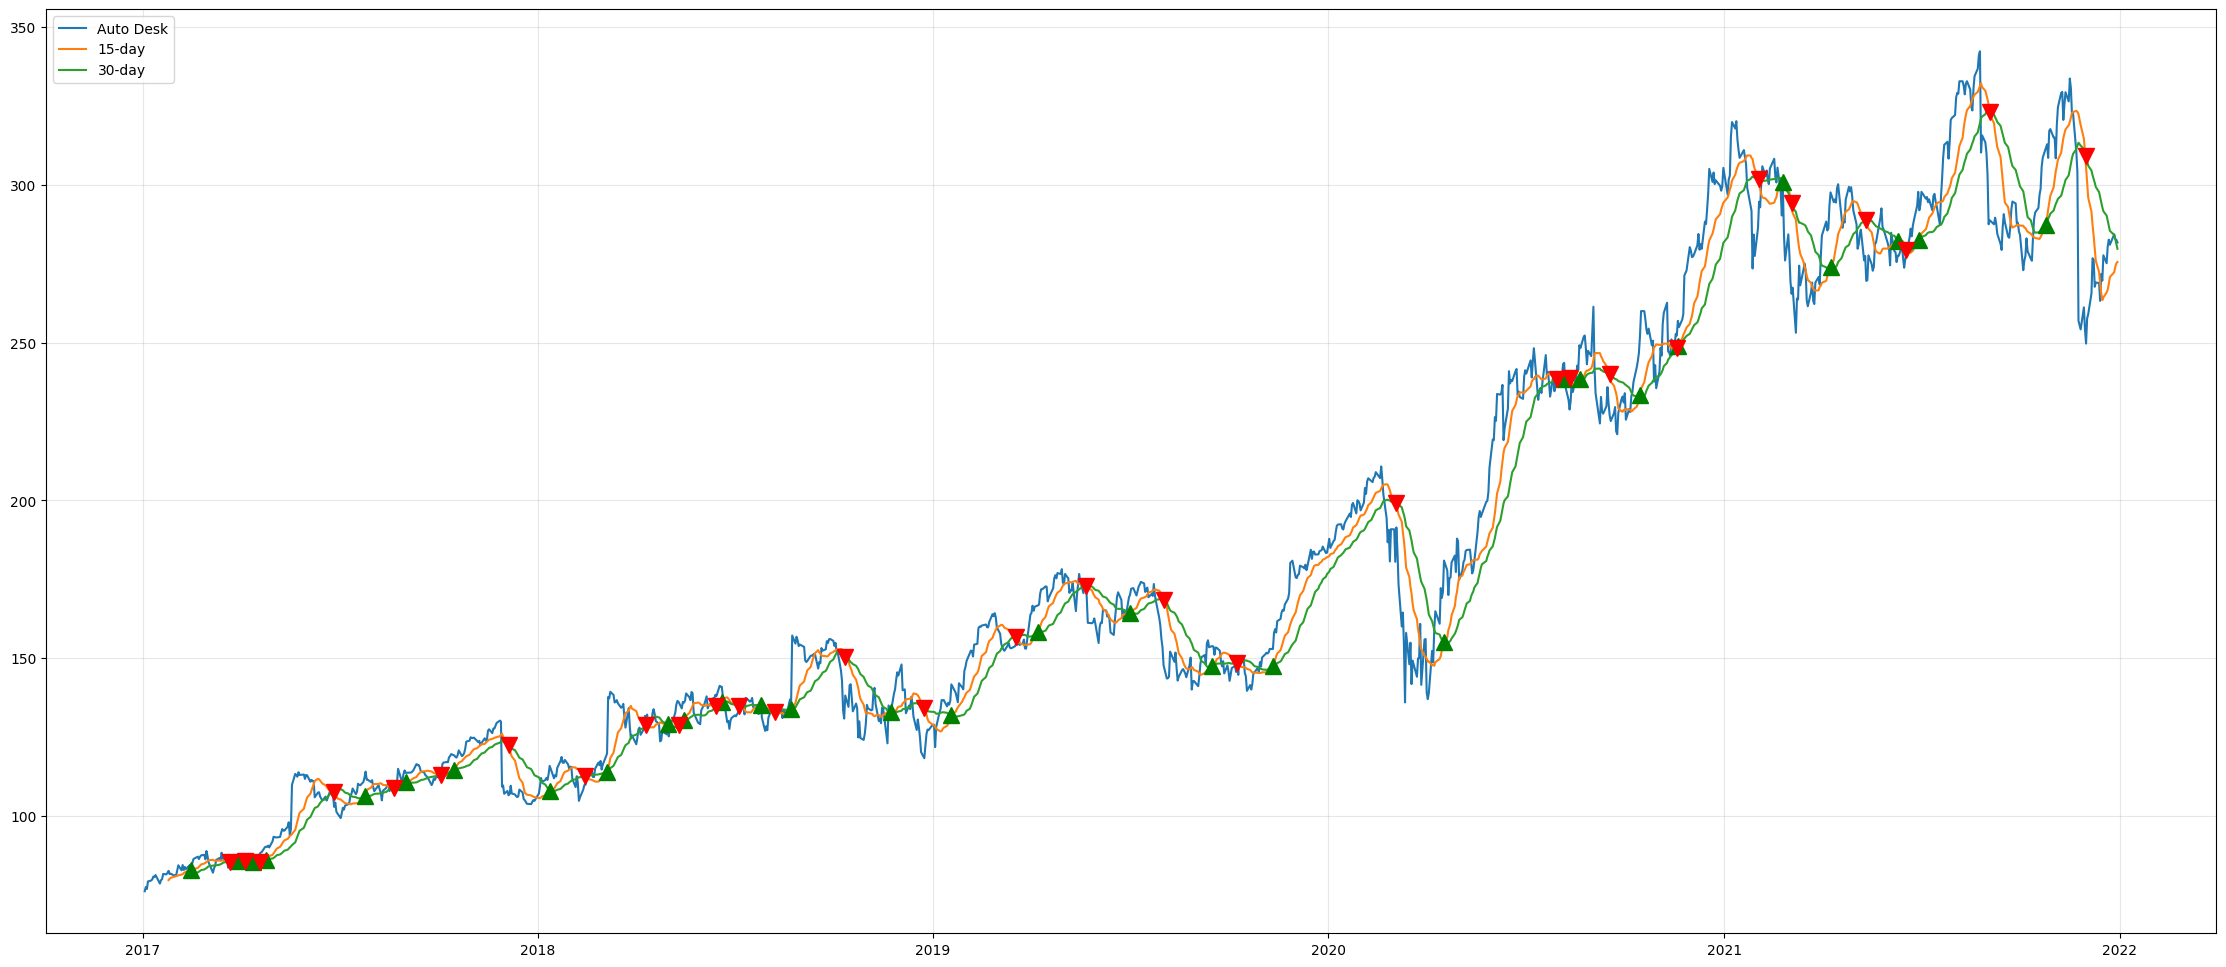

In [106]:
Autodesk_data['invested_5'] = np.where(Autodesk_data['15-day'] > Autodesk_data['30-day'], 1, 0) # Here invested = 1 if 15-day average is greater than 30-day average
Autodesk_data['signal_5'] = Autodesk_data['invested_5'].diff()  # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Autodesk_data['logClose_5'] = np.log(Autodesk_data['ADSK']) 
Autodesk_data['return_5'] = Autodesk_data['logClose_5'].diff() 
Autodesk_data['system_return_5'] = Autodesk_data['invested_5'] * Autodesk_data['return_5'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Autodesk_data['ADSK'], label = 'Auto Desk') # Actual Value
plt.plot(Autodesk_data['15-day'], label = '15-day') # 15-day Average
plt.plot(Autodesk_data['30-day'], label = '30-day') # 30-day Average
plt.plot(Autodesk_data.loc[Autodesk_data.signal_5 == 1].index, Autodesk_data['15-day'][Autodesk_data.signal_5 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Autodesk_data.loc[Autodesk_data.signal_5 == -1].index, Autodesk_data['30-day'][Autodesk_data.signal_5 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

* **Verisk**

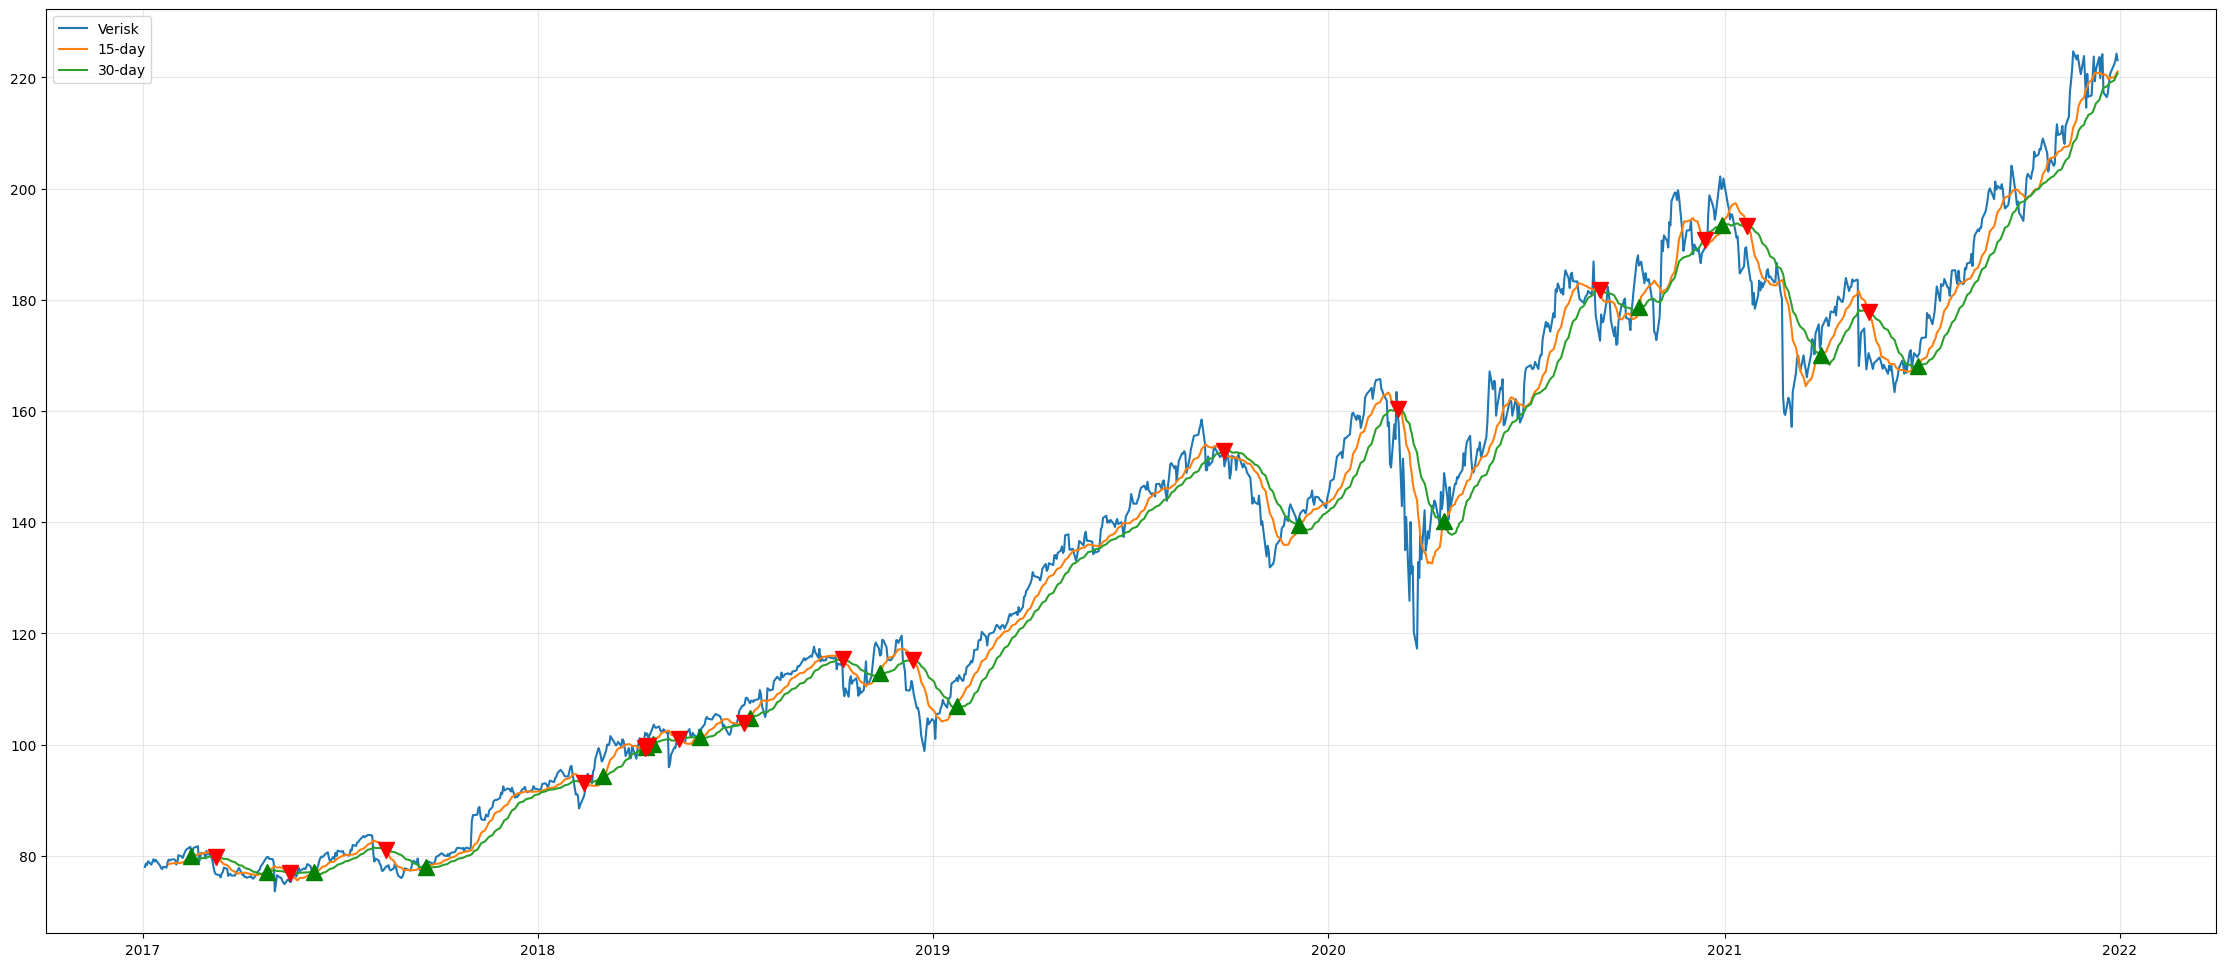

In [107]:
Verisk_data['invested_5'] = np.where(Verisk_data['15-day'] > Verisk_data['30-day'], 1, 0) # Here invested = 1 if 15-day average is greater than 30-day average
Verisk_data['signal_5'] = Verisk_data['invested_5'].diff()  # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Verisk_data['logClose_5'] = np.log(Verisk_data['VRSK']) 
Verisk_data['return_5'] = Verisk_data['logClose_5'].diff() 
Verisk_data['system_return_5'] = Verisk_data['invested_5'] * Verisk_data['return_5'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Verisk_data['VRSK'], label = 'Verisk') # Actual Value
plt.plot(Verisk_data['15-day'], label = '15-day') # 15-day Average
plt.plot(Verisk_data['30-day'], label = '30-day') # 30-day Average
plt.plot(Verisk_data.loc[Verisk_data.signal_5 == 1].index, Verisk_data['15-day'][Verisk_data.signal_5 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Verisk_data.loc[Verisk_data.signal_5 == -1].index, Verisk_data['30-day'][Verisk_data.signal_5 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

In [108]:
# Printing First 5 Rows of McDonald's data
Mcd_data.head()

MCD  9-day  21-day  invested_1  signal_1  logClose_1  \
Date                                                                     
2017-01-03  97.792358    NaN     NaN           0       NaN    4.582846   
2017-01-04  97.677917    NaN     NaN           0       0.0    4.581676   
2017-01-05  97.857758    NaN     NaN           0       0.0    4.583515   
2017-01-06  98.724335    NaN     NaN           0       0.0    4.592331   
2017-01-09  98.454536    NaN     NaN           0       0.0    4.589595   

            return_1  system_return_1  5-day  13-day  ...  logClose_4  \
Date                                                  ...               
2017-01-03       NaN              NaN    NaN     NaN  ...    4.582846   
2017-01-04 -0.001171             -0.0    NaN     NaN  ...    4.581676   
2017-01-05  0.001839              0.0    NaN     NaN  ...    4.583515   
2017-01-06  0.008816              0.0    NaN     NaN  ...    4.592331   
2017-01-09 -0.002737             -0.0    NaN     NaN  ...    4.589595   

            return_4  system_return_4  15-day  30-day  invested_5  signal_5  \
Date                                                                          
2017-01-03       NaN              NaN     NaN     NaN           0       NaN   
2017-01-04 -0.001171             -0.0     NaN     NaN           0       0.0   
2017-01-05  0.001839              0.0     NaN     NaN           0       0.0   
2017-01-06  0.008816              0.0     NaN     NaN           0       0.0   
2017-01-09 -0.002737             -0.0     NaN     NaN           0       0.0   

            logClose_5  return_5  system_return_5  
Date                                               
2017-01-03    4.582846       NaN              NaN  
2017-01-04    4.581676 -0.001171             -0.0  
2017-01-05    4.583515  0.001839              0.0  
2017-01-06    4.592331  0.008816              0.0  
2017-01-09    4.589595 -0.002737             -0.0  

[5 rows x 35 columns]

In [109]:
# Printing First 5 Rows of Autodesk data
Autodesk_data.head()

ADSK  9-day  21-day  invested_1  signal_1  logClose_1  \
Date                                                                     
2017-01-03  76.180000    NaN     NaN           0       NaN    4.333099   
2017-01-04  77.519997    NaN     NaN           0       0.0    4.350536   
2017-01-05  76.930000    NaN     NaN           0       0.0    4.342896   
2017-01-06  79.300003    NaN     NaN           0       0.0    4.373238   
2017-01-09  79.589996    NaN     NaN           0       0.0    4.376888   

            return_1  system_return_1  5-day  13-day  ...  logClose_4  \
Date                                                  ...               
2017-01-03       NaN              NaN    NaN     NaN  ...    4.333099   
2017-01-04  0.017437              0.0    NaN     NaN  ...    4.350536   
2017-01-05 -0.007640             -0.0    NaN     NaN  ...    4.342896   
2017-01-06  0.030342              0.0    NaN     NaN  ...    4.373238   
2017-01-09  0.003650              0.0    NaN     NaN  ...    4.376888   

            return_4  system_return_4  15-day  30-day  invested_5  signal_5  \
Date                                                                          
2017-01-03       NaN              NaN     NaN     NaN           0       NaN   
2017-01-04  0.017437              0.0     NaN     NaN           0       0.0   
2017-01-05 -0.007640             -0.0     NaN     NaN           0       0.0   
2017-01-06  0.030342              0.0     NaN     NaN           0       0.0   
2017-01-09  0.003650              0.0     NaN     NaN           0       0.0   

            logClose_5  return_5  system_return_5  
Date                                               
2017-01-03    4.333099       NaN              NaN  
2017-01-04    4.350536  0.017437              0.0  
2017-01-05    4.342896 -0.007640             -0.0  
2017-01-06    4.373238  0.030342              0.0  
2017-01-09    4.376888  0.003650              0.0  

[5 rows x 35 columns]

In [110]:
# Printing First 5 Rows of Verisk data
Verisk_data.head()

VRSK  9-day  21-day  invested_1  signal_1  logClose_1  \
Date                                                                     
2017-01-03  78.016731    NaN     NaN           0       NaN    4.356923   
2017-01-04  78.630745    NaN     NaN           0       0.0    4.364763   
2017-01-05  78.342941    NaN     NaN           0       0.0    4.361096   
2017-01-06  79.033707    NaN     NaN           0       0.0    4.369874   
2017-01-09  78.410126    NaN     NaN           0       0.0    4.361953   

            return_1  system_return_1  5-day  13-day  ...  logClose_4  \
Date                                                  ...               
2017-01-03       NaN              NaN    NaN     NaN  ...    4.356923   
2017-01-04  0.007839              0.0    NaN     NaN  ...    4.364763   
2017-01-05 -0.003667             -0.0    NaN     NaN  ...    4.361096   
2017-01-06  0.008779              0.0    NaN     NaN  ...    4.369874   
2017-01-09 -0.007921             -0.0    NaN     NaN  ...    4.361953   

            return_4  system_return_4  15-day  30-day  invested_5  signal_5  \
Date                                                                          
2017-01-03       NaN              NaN     NaN     NaN           0       NaN   
2017-01-04  0.007839              0.0     NaN     NaN           0       0.0   
2017-01-05 -0.003667             -0.0     NaN     NaN           0       0.0   
2017-01-06  0.008779              0.0     NaN     NaN           0       0.0   
2017-01-09 -0.007921             -0.0     NaN     NaN           0       0.0   

            logClose_5  return_5  system_return_5  
Date                                               
2017-01-03    4.356923       NaN              NaN  
2017-01-04    4.364763  0.007839              0.0  
2017-01-05    4.361096 -0.003667             -0.0  
2017-01-06    4.369874  0.008779              0.0  
2017-01-09    4.361953 -0.007921             -0.0  

[5 rows x 35 columns]

### **Choosing the Best Strategy of the 5 pairs (for each of the 3 stocks)**

#### **McDonald's**

In [111]:
print("Return from 9-Day/21-Day Strategy :", np.exp(np.sum(Mcd_data['system_return_1'])) -1)
print("Return from 5-Day/13-Day Strategy :", np.exp(np.sum(Mcd_data['system_return_2'])) -1)
print("Return from 50-Day/200-Day Strategy :", np.exp(np.sum(Mcd_data['system_return_3'])) -1)
print("Return from 21-Day/55-Day Strategy :", np.exp(np.sum(Mcd_data['system_return_4'])) -1)
print("Return from 15-Day/30-Day Strategy :", np.exp(np.sum(Mcd_data['system_return_5'])) -1)

Return from 9-Day/21-Day Strategy : 0.47350420879470745
Return from 5-Day/13-Day Strategy : 0.49758846661011336
Return from 50-Day/200-Day Strategy : 0.0554982187942783
Return from 21-Day/55-Day Strategy : 0.9965913618329587
Return from 15-Day/30-Day Strategy : 0.5742727939912482


* **We can see that for McDonald's, the highest return is for the 21-Day/55-Day strategy. Hence, we choose this strategy for McDonald's.**

#### **Autodesk**

In [112]:
print("Return from 9-Day/21-Day Strategy :", np.exp(np.sum(Autodesk_data['system_return_1'])) -1)
print("Return from 5-Day/13-Day Strategy :", np.exp(np.sum(Autodesk_data['system_return_2'])) -1)
print("Return from 50-Day/200-Day Strategy :", np.exp(np.sum(Autodesk_data['system_return_3'])) -1)
print("Return from 21-Day/55-Day Strategy :", np.exp(np.sum(Autodesk_data['system_return_4'])) -1)
print("Return from 15-Day/30-Day Strategy :", np.exp(np.sum(Autodesk_data['system_return_5'])) -1)

Return from 9-Day/21-Day Strategy : 0.47939845079203525
Return from 5-Day/13-Day Strategy : 1.2599689704894987
Return from 50-Day/200-Day Strategy : 0.08999367913527756
Return from 21-Day/55-Day Strategy : 0.646536441375583
Return from 15-Day/30-Day Strategy : 0.1454833642504627


* **We can see that for Autodesk, the highest return is for the 5-Day/13-Day strategy. Hence, we choose this strategy for Autodesk.**

#### **Verisk**

In [113]:
print("Return from 9-Day/21-Day Strategy :", np.exp(np.sum(Verisk_data['system_return_1'])) -1)
print("Return from 5-Day/13-Day Strategy :", np.exp(np.sum(Verisk_data['system_return_2'])) -1)
print("Return from 50-Day/200-Day Strategy :", np.exp(np.sum(Verisk_data['system_return_3'])) -1)
print("Return from 21-Day/55-Day Strategy :", np.exp(np.sum(Verisk_data['system_return_4'])) -1)
print("Return from 15-Day/30-Day Strategy :", np.exp(np.sum(Verisk_data['system_return_5'])) -1)

Return from 9-Day/21-Day Strategy : 1.3764521208352951
Return from 5-Day/13-Day Strategy : 0.7092005881066661
Return from 50-Day/200-Day Strategy : 1.0198330565248583
Return from 21-Day/55-Day Strategy : 0.9186211482138085
Return from 15-Day/30-Day Strategy : 1.7055316144588502


* **We can see that for Verisk, the highest return is for the 15-Day/30-Day strategy. Hence, we choose this strategy for Verisk.**

# **4) Analysis**

## **Buy-and-Hold Strategy** 

### **Chosen Allocation of the Stocks from MPT Model**

In [114]:
# Printing the Chosen Portfolio Allocation
chosen_allocation

MCD      ADSK      VRSK
0.000205  0.000002  0.177997  0.473235

* **If we had USD 100,000 to invest , the amount invested in McDonald's would be USD 27,168.5 , the amount invested in Autodesk would be USD 32,814.4 and the amount invested in Verisk would be USD 40,017.1.**

### **Extracting Data For 2022**

In [119]:
import yfinance as yf

tickers_list_3 = ['MCD', 'ADSK', 'VRSK']
dow_prices_3 = {}

for ticker in tickers_list_3:
    try:
        df = yf.download(ticker, start='2021-12-31', end='2022-11-02', interval='1mo')
        if not df.empty:
            dow_prices_3[ticker] = df
            print(f"{ticker} Data Downloaded")
        else:
            print(f"{ticker} No data returned")
    except Exception as e:
        print(f"{ticker} Error: {e}")

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/327503217.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2021-12-31', end='2022-11-02', interval='1mo')
[*********************100%***********************]  1 of 1 completed
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/327503217.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2021-12-31', end='2022-11-02', interval='1mo')
[*********************100%***********************]  1 of 1 completed
/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/327503217.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2021-12-31', end='2022-11-02', interval='1mo')
[*********************100%***********************]  1 of 1 completed

MCD Data Downloaded
ADSK Data Downloaded
VRSK Data Downloaded


In [121]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store the data
prep_data_3 = pd.DataFrame()

# Using the Tickers to add data to the DataFrame created
for i in tickers_list_3[0:]:
  prep_data_3[i] = pd.DataFrame(dow_prices_3[i]['Close'])

In [122]:
# Adding Variables to show Percentage Difference in Stock Prices for each of the stocks
prep_data_3['MCD_percDiff'] = prep_data_3['MCD'].pct_change()
prep_data_3['ADSK_percDiff'] = prep_data_3['ADSK'].pct_change()
prep_data_3['VRSK_percDiff'] = prep_data_3['VRSK'].pct_change()

In [123]:
# Allocating $100,000 to each of the 3 stocks based on the chosen allocation (initial_investment)
prep_data_3['mcd_init_investment']=100000*chosen_allocation['MCD'].values[0]
prep_data_3['adsk_init_investment']=100000*chosen_allocation['ADSK'].values[0]
prep_data_3['vrsk_init_investment']=100000*chosen_allocation['VRSK'].values[0]

In [124]:
# Initializing Variables to show the Value of each position on a particular day
prep_data_3[['mcd_invst_value','adsk_invst_value','vrsk_invst_value']]=[27168.503019,32814.412656,40017.083675]

In [125]:
# Printing First 5 Rows of the DataFrame
prep_data_3.head()

MCD        ADSK        VRSK  MCD_percDiff  ADSK_percDiff  \
Date                                                                          
2022-01-01  239.527954  249.789993  191.838089           NaN            NaN   
2022-02-01  225.975174  220.229996  173.459244     -0.056581      -0.118339   
2022-03-01  229.562378  214.350006  209.933212      0.015874      -0.026699   
2022-04-01  231.307724  189.279999  199.925201      0.007603      -0.116958   
2022-05-01  234.139160  207.750000  171.384033      0.012241       0.097580   

            VRSK_percDiff  mcd_init_investment  adsk_init_investment  \
Date                                                                   
2022-01-01            NaN             0.167174           17799.70729   
2022-02-01      -0.095804             0.167174           17799.70729   
2022-03-01       0.210274             0.167174           17799.70729   
2022-04-01      -0.047672             0.167174           17799.70729   
2022-05-01      -0.142759             0.167174           17799.70729   

            vrsk_init_investment  mcd_invst_value  adsk_invst_value  \
Date                                                                  
2022-01-01          47323.500573     27168.503019      32814.412656   
2022-02-01          47323.500573     27168.503019      32814.412656   
2022-03-01          47323.500573     27168.503019      32814.412656   
2022-04-01          47323.500573     27168.503019      32814.412656   
2022-05-01          47323.500573     27168.503019      32814.412656   

            vrsk_invst_value  
Date                          
2022-01-01      40017.083675  
2022-02-01      40017.083675  
2022-03-01      40017.083675  
2022-04-01      40017.083675  
2022-05-01      40017.083675

In [126]:
# 'For' Loop to Calculate the Value of Each Position on a Particular Day (McDonald's)
for i in range(1,prep_data_3.shape[0]):
  if i==1:
    prep_data_3.iloc[i,9]=prep_data_3.iloc[i-1,6] * (1+prep_data_3.iloc[i,3]) 
  else:
    prep_data_3.iloc[i,9]=prep_data_3.iloc[i-1,9] * (1+prep_data_3.iloc[i,3])

In [127]:
# 'For' Loop to Calculate the Value of Each Position on a Particular Day (Autodesk)
for i in range(1,prep_data_3.shape[0]):
  if i==1:
    prep_data_3.iloc[i,10]=prep_data_3.iloc[i-1,7] * (1+prep_data_3.iloc[i,4])
  else:
    prep_data_3.iloc[i,10]=prep_data_3.iloc[i-1,10] * (1+prep_data_3.iloc[i,4])

In [128]:
# 'For' Loop to Calculate the Value of Each Position on a Particular Day (Verisk)
for i in range(1,prep_data_3.shape[0]):
  if i==1:
    prep_data_3.iloc[i,11]=prep_data_3.iloc[i-1,8] * (1+prep_data_3.iloc[i,5])
  else:
    prep_data_3.iloc[i,11]=prep_data_3.iloc[i-1,11] * (1+prep_data_3.iloc[i,5])

In [129]:
# Adding a variable to show the Aggregate Value of the Entire Portfolio on a Particular Day
prep_data_3['Aggregate_Value']=prep_data_3['mcd_invst_value']+prep_data_3['adsk_invst_value']+prep_data_3['vrsk_invst_value']

In [130]:
# Printing Shape of the DataFrame
prep_data_3.shape

(11, 13)

In [131]:
# Printing the last 5 Rows of the DataFrame
prep_data_3.tail()

MCD        ADSK        VRSK  MCD_percDiff  ADSK_percDiff  \
Date                                                                          
2022-07-01  245.854614  216.320007  186.762283      0.072706       0.257967   
2022-08-01  235.502136  201.740005  183.728928     -0.042108      -0.067400   
2022-09-01  216.573685  186.800003  167.403793     -0.080375      -0.074056   
2022-10-01  255.919983  214.300003  179.777527      0.181676       0.147216   
2022-11-01  256.042023  201.949997  180.642838      0.000477      -0.057630   

            VRSK_percDiff  mcd_init_investment  adsk_init_investment  \
Date                                                                   
2022-07-01       0.101251             0.167174           17799.70729   
2022-08-01      -0.016242             0.167174           17799.70729   
2022-09-01      -0.088854             0.167174           17799.70729   
2022-10-01       0.073915             0.167174           17799.70729   
2022-11-01       0.004813             0.167174           17799.70729   

            vrsk_init_investment  mcd_invst_value  adsk_invst_value  \
Date                                                                  
2022-07-01          47323.500573         0.171590      15414.679991   
2022-08-01          47323.500573         0.164364      14375.728184   
2022-09-01          47323.500573         0.151154      13311.123205   
2022-10-01          47323.500573         0.178615      15270.737136   
2022-11-01          47323.500573         0.178700      14390.691899   

            vrsk_invst_value  Aggregate_Value  
Date                                           
2022-07-01      46071.377527     61486.229108  
2022-08-01      45323.095413     59698.987961  
2022-09-01      41295.936336     54607.210695  
2022-10-01      44348.345732     59619.261483  
2022-11-01      44561.804541     58952.675140

### **Value of Each Position & Aggregate Value at the Beginning of Each Month (Buy-and-Hold Strategy)**

In [132]:
# Printing Value of Each Position & Aggregate Value at the Beginning of Each Month (Buy-and-Hold Strategy)
prep_data_3[['mcd_invst_value','adsk_invst_value','vrsk_invst_value','Aggregate_Value']]

mcd_invst_value  adsk_invst_value  vrsk_invst_value  \
Date                                                              
2022-01-01     27168.503019      32814.412656      40017.083675   
2022-02-01         0.157715      15693.300636      42789.722653   
2022-03-01         0.160219      15274.300288      51787.288666   
2022-04-01         0.161437      13487.844448      49318.466596   
2022-05-01         0.163413      14803.992509      42277.800181   
2022-06-01         0.159960      12253.644531      41835.491126   
2022-07-01         0.171590      15414.679991      46071.377527   
2022-08-01         0.164364      14375.728184      45323.095413   
2022-09-01         0.151154      13311.123205      41295.936336   
2022-10-01         0.178615      15270.737136      44348.345732   
2022-11-01         0.178700      14390.691899      44561.804541   

            Aggregate_Value  
Date                         
2022-01-01     99999.999350  
2022-02-01     58483.181004  
2022-03-01     67061.749172  
2022-04-01     62806.472482  
2022-05-01     57081.956104  
2022-06-01     54089.295616  
2022-07-01     61486.229108  
2022-08-01     59698.987961  
2022-09-01     54607.210695  
2022-10-01     59619.261483  
2022-11-01     58952.675140

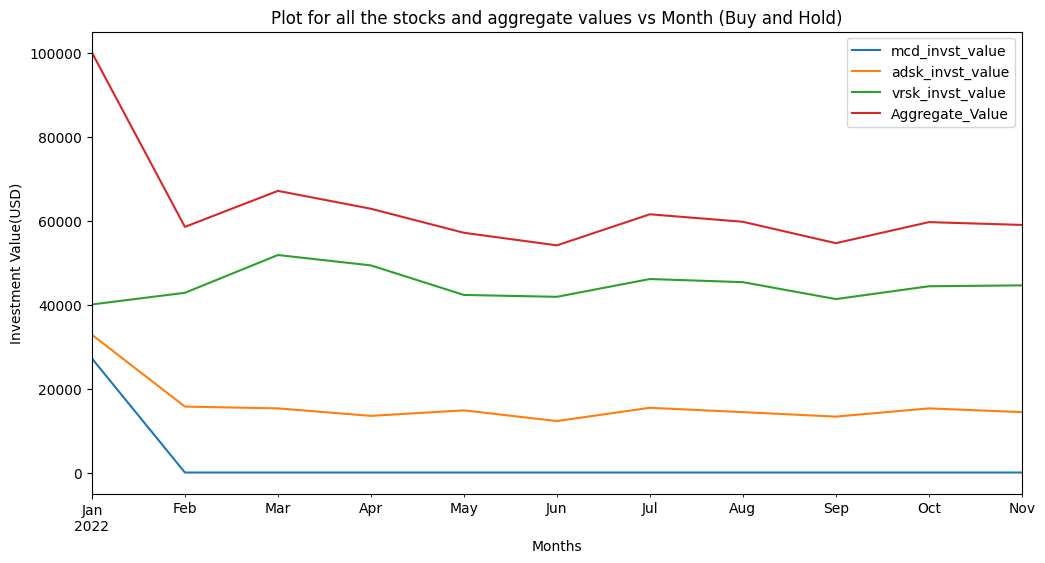

In [133]:
# Plotting the Stock value and Aggregate Value of the Investment at the beginning of each month (for Buy and Hold)
prep_data_3[['mcd_invst_value','adsk_invst_value','vrsk_invst_value','Aggregate_Value']].plot(title='Plot for all the stocks and aggregate values vs Month (Buy and Hold)',xlabel='Months',ylabel='Investment Value(USD)',figsize=(12,6))
plt.show()

* We can see that there is a slight decrease in the aggregate value , and position value for Autodesk. 

## **Momentum Trading Strategy** 

### **Extracting Data For 2022**

* **McDonald's**

In [136]:
import yfinance as yf

tickers_list_mcd = ['MCD']
dow_prices_mcd = {}

for ticker in tickers_list_mcd:
    try:
        df = yf.download(ticker, start='2021-10-01', end='2022-11-02', interval='1d')
        if not df.empty:
            dow_prices_mcd[ticker] = df
            print(f"{ticker} Data Downloaded")
        else:
            print(f"{ticker} No data returned")
    except Exception as e:
        print(f"{ticker} Error: {e}")


/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/3918874059.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2021-10-01', end='2022-11-02', interval='1d')
[*********************100%***********************]  1 of 1 completed

MCD Data Downloaded


In [137]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store McDonald's data
prep_data_mcd = pd.DataFrame()

# Using the Tickers to add data to the DataFrame created
for i in tickers_list_mcd[0:]:
  prep_data_mcd[i] = pd.DataFrame(dow_prices_mcd[i]['Close'])

In [138]:
# Printing first 5 rows of the DataFrame
prep_data_mcd.head()

MCD
Date                  
2021-10-01  223.039917
2021-10-04  223.177643
2021-10-05  225.142426
2021-10-06  226.868484
2021-10-07  227.988617

* **Autodesk**

In [140]:
import yfinance as yf

# Creating a ticker list for the Autodesk stock that we want to scrape
tickers_list_adsk = ['ADSK']
dow_prices_adsk = {}

# Pulling historical stock price data (daily) for Autodesk from Dec 10, 2021 to Nov 2, 2022
for ticker in tickers_list_adsk:
    try:
        df = yf.download(ticker, start='2021-12-10', end='2022-11-02', interval='1d')
        if not df.empty:
            dow_prices_adsk[ticker] = df
            print(f"{ticker} Data Downloaded")
        else:
            print(f"{ticker} No data returned")
    except Exception as e:
        print(f"{ticker} Error: {e}")


/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1142420377.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2021-12-10', end='2022-11-02', interval='1d')
[*********************100%***********************]  1 of 1 completed

ADSK Data Downloaded


In [141]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store Autodesk data 
prep_data_adsk = pd.DataFrame()

# Using the Tickers to add data to the DataFrame created
for i in tickers_list_adsk[0:]:
  prep_data_adsk[i] = pd.DataFrame(dow_prices_adsk[i]['Close'])

In [142]:
# Printing First 5 rows of the DataFrame
prep_data_adsk.head()

ADSK
Date                  
2021-12-10  269.000000
2021-12-13  268.880005
2021-12-14  263.220001
2021-12-15  271.730011
2021-12-16  269.609985

* **Verisk**

In [144]:
import yfinance as yf

# Creating a ticker list for Verisk stock
tickers_list_vrsk = ['VRSK']
dow_prices_vrsk = {}

# Pulling daily historical stock price data from Nov 15, 2021 to Nov 2, 2022
for ticker in tickers_list_vrsk:
    try:
        df = yf.download(ticker, start='2021-11-15', end='2022-11-02', interval='1d')
        if not df.empty:
            dow_prices_vrsk[ticker] = df
            print(f"{ticker} Data Downloaded")
        else:
            print(f"{ticker} No data returned")
    except Exception as e:
        print(f"{ticker} Error: {e}")


/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/3857185232.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2021-11-15', end='2022-11-02', interval='1d')
[*********************100%***********************]  1 of 1 completed

VRSK Data Downloaded


In [145]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store Verisk data 
prep_data_vrsk = pd.DataFrame()

# Using the Tickers to add data to the DataFrame created
for i in tickers_list_vrsk[0:]:
  prep_data_vrsk[i] = pd.DataFrame(dow_prices_vrsk[i]['Close'])

In [146]:
# Printing First 5 rows of the DataFrame
prep_data_vrsk.head()

VRSK
Date                  
2021-11-15  212.988708
2021-11-16  217.453018
2021-11-17  219.309082
2021-11-18  221.477768
2021-11-19  224.711197

### **Checking for Missing Values**

In [147]:
print("Number of Missing Values for ",prep_data_mcd.isnull().sum())
print("Number of Missing Values for ",prep_data_adsk.isnull().sum())
print("Number of Missing Values for ",prep_data_vrsk.isnull().sum())

Number of Missing Values for  MCD    0
dtype: int64
Number of Missing Values for  ADSK    0
dtype: int64
Number of Missing Values for  VRSK    0
dtype: int64


* **We can see that there are no Missing Values in any of the DataFrames created.Hence, no entries have to be removed.**

### **McDonald's (21-Day/55-Day Strategy - for 2022)**

In [148]:
# We use shift() to prevent data leakage
prep_data_mcd['21-day_mcd'] = prep_data_mcd['MCD'].rolling(21).mean().shift() # 21-Day Moving Average
prep_data_mcd['55-day_mcd'] = prep_data_mcd['MCD'].rolling(55).mean().shift() # 55-Day Moving Average
prep_data_mcd['invested_mcd'] = np.where(prep_data_mcd['21-day_mcd'] > prep_data_mcd['55-day_mcd'], 1, 0) # Here invested = 1 if 21-day average is greater than 55-day average
prep_data_mcd['signal_mcd'] = prep_data_mcd['invested_mcd'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
prep_data_mcd['signal_mcd_1']=np.where(prep_data_mcd.index == '2021-12-31',1,prep_data_mcd['signal_mcd'])
prep_data_mcd=prep_data_mcd[prep_data_mcd.index >= '2021-12-31']

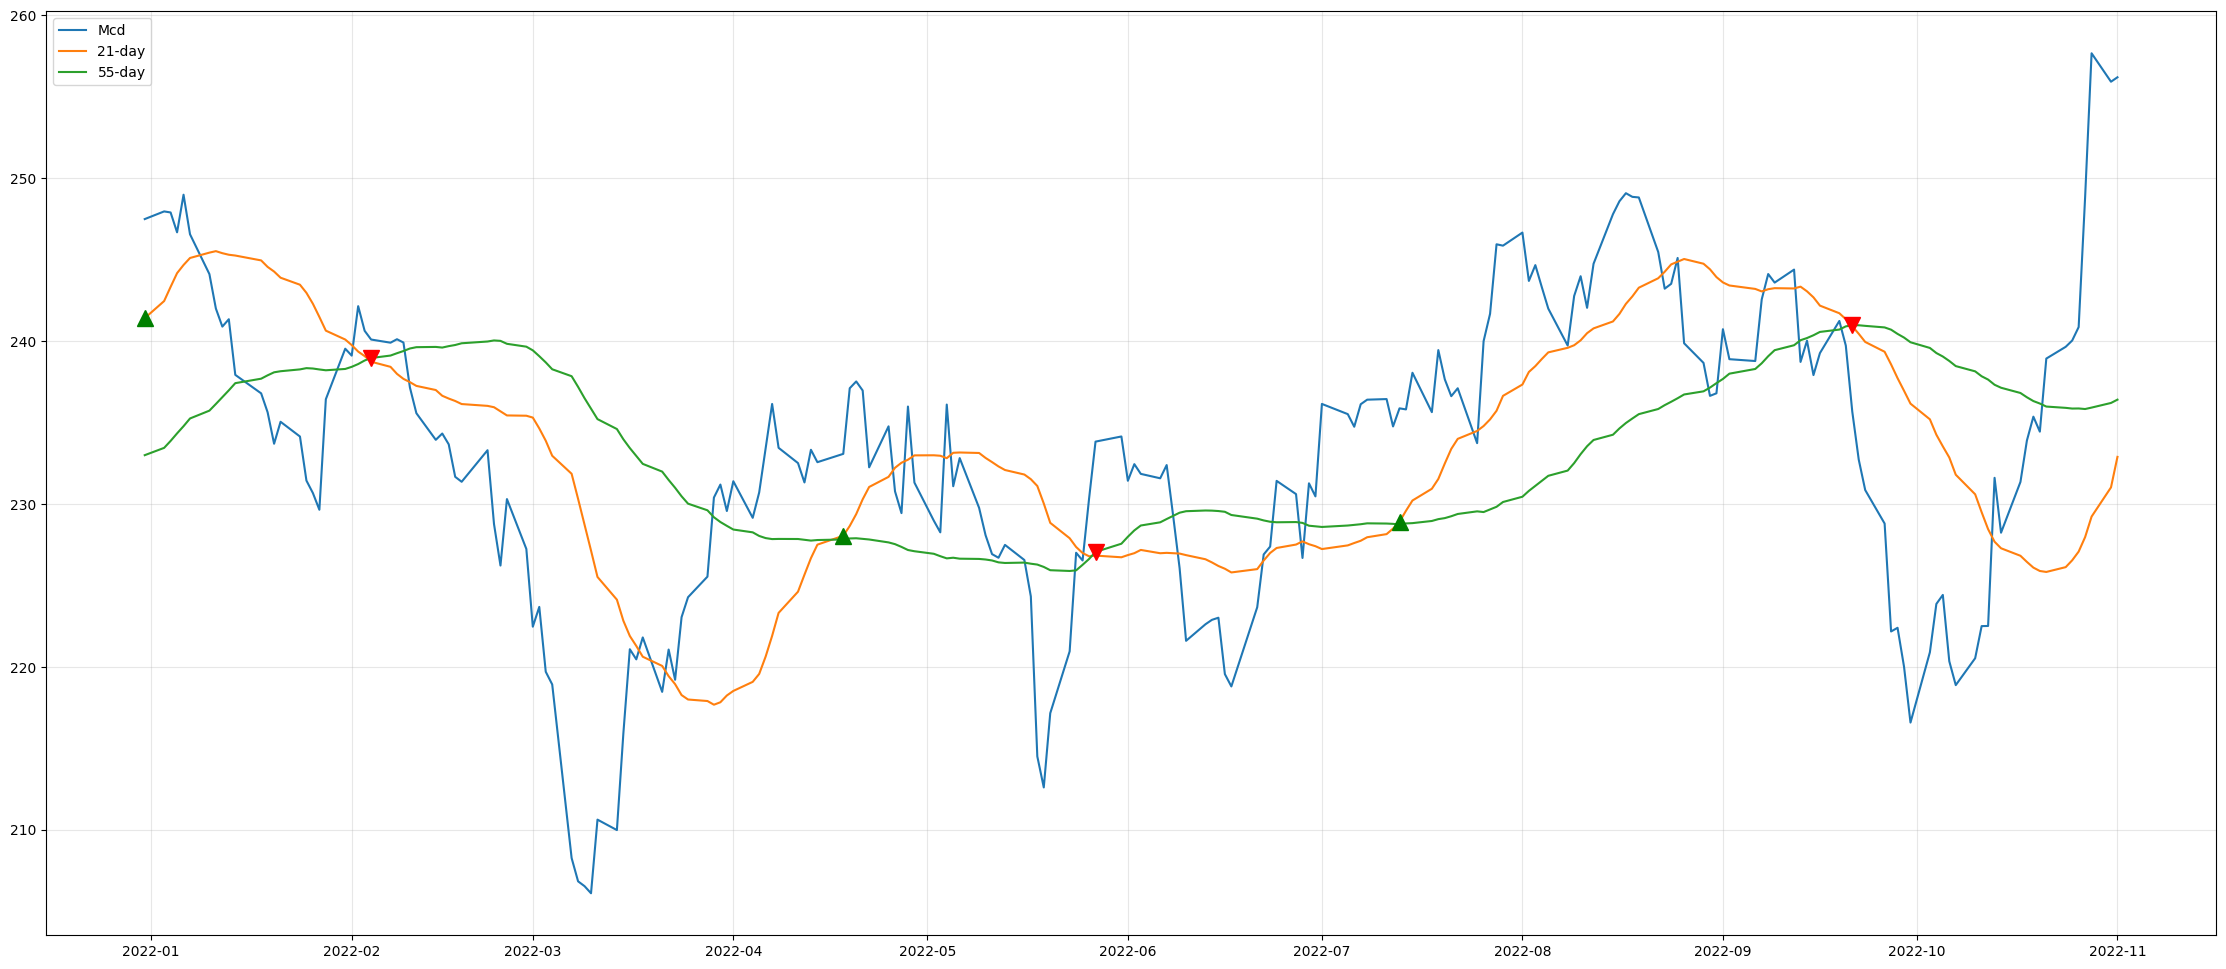

In [149]:
prep_data_mcd['logClose_mcd'] = np.log(prep_data_mcd['MCD']) 
prep_data_mcd['return_mcd'] = prep_data_mcd['logClose_mcd'].diff() 
prep_data_mcd['system_return_mcd'] = prep_data_mcd['invested_mcd'] * prep_data_mcd['return_mcd'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(prep_data_mcd['MCD'], label = 'Mcd') # Actual Value
plt.plot(prep_data_mcd['21-day_mcd'], label = '21-day') # 21-day Average
plt.plot(prep_data_mcd['55-day_mcd'], label = '55-day') # 55-day Average
plt.plot(prep_data_mcd.loc[prep_data_mcd.signal_mcd_1 == 1].index, prep_data_mcd['21-day_mcd'][prep_data_mcd.signal_mcd_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(prep_data_mcd.loc[prep_data_mcd.signal_mcd_1 == -1].index, prep_data_mcd['55-day_mcd'][prep_data_mcd.signal_mcd_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

In [150]:
# Printing the First 5 rows of the DataFrame
prep_data_mcd.head()

MCD  21-day_mcd  55-day_mcd  invested_mcd  signal_mcd  \
Date                                                                       
2021-12-31  247.486053  241.403394  232.990868             1         0.0   
2022-01-03  247.956879  242.453661  233.440017             1         0.0   
2022-01-04  247.892288  243.323239  233.866010             1         0.0   
2022-01-05  246.673645  244.166442  234.329222             1         0.0   
2022-01-06  248.981674  244.667615  234.770110             1         0.0   

            signal_mcd_1  logClose_mcd  return_mcd  system_return_mcd  
Date                                                                   
2021-12-31           1.0      5.511354         NaN                NaN  
2022-01-03           0.0      5.513255    0.001901           0.001901  
2022-01-04           0.0      5.512994   -0.000261          -0.000261  
2022-01-05           0.0      5.508066   -0.004928          -0.004928  
2022-01-06           0.0      5.517379    0.009313           0.009313

In [151]:
# Printing the Shape of the DataFrame
prep_data_mcd.shape

(211, 9)

### **Autodesk (5-Day/13-Day Strategy - for 2022)**

In [152]:
# We use shift() to prevent data leakage
prep_data_adsk['5-day_adsk'] = prep_data_adsk['ADSK'].rolling(5).mean().shift() # 5-Day Moving Average
prep_data_adsk['13-day_adsk'] = prep_data_adsk['ADSK'].rolling(13).mean().shift() # 13-Day Moving Average
prep_data_adsk['invested_adsk'] = np.where(prep_data_adsk['5-day_adsk'] > prep_data_adsk['13-day_adsk'], 1, 0) # Here invested = 1 if 5-day average is greater than 13-day average
prep_data_adsk['signal_adsk'] = prep_data_adsk['invested_adsk'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
prep_data_adsk['signal_adsk_1']=np.where(prep_data_adsk.index == '2021-12-31',1,prep_data_adsk['signal_adsk'])
prep_data_adsk=prep_data_adsk[prep_data_adsk.index >= '2021-12-31']

In [153]:
prep_data_adsk['logClose_adsk'] = np.log(prep_data_adsk['ADSK']) 
prep_data_adsk['return_adsk'] = prep_data_adsk['logClose_adsk'].diff() 
prep_data_adsk['system_return_adsk'] = prep_data_adsk['invested_adsk'] * prep_data_adsk['return_adsk'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(prep_data_adsk['ADSK'], label = 'Autodesk') # Actual Value
plt.plot(prep_data_adsk['5-day_adsk'], label = '5-day') # 5-day Average
plt.plot(prep_data_adsk['13-day_adsk'], label = '13-day') # 13-day Average
plt.plot(prep_data_adsk.loc[prep_data_adsk.signal_adsk_1 == 1].index, prep_data_adsk['5-day_adsk'][prep_data_adsk.signal_adsk_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(prep_data_adsk.loc[prep_data_adsk.signal_adsk_1 == -1].index, prep_data_adsk['13-day_adsk'][prep_data_adsk.signal_adsk_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

In [154]:
# Printing the First 5 rows of the DataFrame
prep_data_adsk.head()

ADSK  5-day_adsk  13-day_adsk  invested_adsk  signal_adsk  \
Date                                                                          
2021-12-31  281.190002  282.467993   277.044612              1          0.0   
2022-01-03  283.720001  282.507996   277.991535              1          0.0   
2022-01-04  278.190002  282.391998   279.568458              1          0.0   
2022-01-05  264.320007  281.476001   280.065380              1          0.0   
2022-01-06  264.109985  277.826001   279.658459              0         -1.0   

            signal_adsk_1  logClose_adsk  return_adsk  system_return_adsk  
Date                                                                       
2021-12-31            1.0       5.639031          NaN                 NaN  
2022-01-03            0.0       5.647988     0.008957            0.008957  
2022-01-04            0.0       5.628304    -0.019683           -0.019683  
2022-01-05            0.0       5.577161    -0.051144           -0.051144  
2022-01-06           -1.0       5.576366    -0.000795           -0.000000

In [155]:
# Printing the Shape of the DataFrame
prep_data_adsk.shape

(211, 9)

### **Verisk (15-Day/30-Day Strategy - for 2022)**

In [156]:
# We use shift() to prevent data leakage
prep_data_vrsk['15-day'] = prep_data_vrsk['VRSK'].rolling(15).mean().shift() # 15-Day Moving Average
prep_data_vrsk['30-day'] = prep_data_vrsk['VRSK'].rolling(30).mean().shift() # 30-Day Moving Average
prep_data_vrsk['invested_vrsk'] = np.where(prep_data_vrsk['15-day'] > prep_data_vrsk['30-day'], 1, 0) # Here invested = 1 if 15-day average is greater than 30-day average
prep_data_vrsk['signal_vrsk'] = prep_data_vrsk['invested_vrsk'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
prep_data_vrsk['signal_vrsk_1']=np.where(prep_data_vrsk.index == '2021-12-31',1,prep_data_vrsk['signal_vrsk'])
prep_data_vrsk=prep_data_vrsk[prep_data_vrsk.index >= '2021-12-31']

In [157]:
prep_data_vrsk['logClose_vrsk'] = np.log(prep_data_vrsk['VRSK'])
prep_data_vrsk['return_vrsk'] = prep_data_vrsk['logClose_vrsk'].diff() 
prep_data_vrsk['system_return_vrsk'] = prep_data_vrsk['invested_vrsk'] * prep_data_vrsk['return_vrsk'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(prep_data_vrsk['VRSK'], label = 'Verisk') # Actual Value
plt.plot(prep_data_vrsk['15-day'], label = '15-day') # 15-day Average
plt.plot(prep_data_vrsk['30-day'], label = '30-day') # 30-day Average
plt.plot(prep_data_vrsk.loc[prep_data_vrsk.signal_vrsk_1 == 1].index, prep_data_vrsk['15-day'][prep_data_vrsk.signal_vrsk_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(prep_data_vrsk.loc[prep_data_vrsk.signal_vrsk_1 == -1].index, prep_data_vrsk['30-day'][prep_data_vrsk.signal_vrsk_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

In [158]:
# Printing the First 5 rows of the DataFrame
prep_data_vrsk.head()

VRSK      15-day      30-day  invested_vrsk  signal_vrsk  \
Date                                                                         
2021-12-31  223.724670  221.022364  220.921499              1          0.0   
2022-01-03  216.809402  221.316737  221.068685              1          0.0   
2022-01-04  216.877869  221.009422  220.913073              1          0.0   
2022-01-05  209.620224  220.558184  220.651962              0         -1.0   
2022-01-06  208.016098  219.874154  220.197775              0          0.0   

            signal_vrsk_1  logClose_vrsk  return_vrsk  system_return_vrsk  
Date                                                                       
2021-12-31            1.0       5.410416          NaN                 NaN  
2022-01-03            0.0       5.379019    -0.031398           -0.031398  
2022-01-04            0.0       5.379334     0.000316            0.000316  
2022-01-05           -1.0       5.345297    -0.034037           -0.000000  
2022-01-06            0.0       5.337615    -0.007682           -0.000000

In [159]:
# Printing the Shape of the DataFrame
prep_data_vrsk.shape

(211, 9)

#### **McDonald's**

In [160]:
# Creating a new DataFrame for McDonald's for Momentum Trading Strategy
mt_mcd=prep_data_3[['MCD']]

# Adding a Variable for Initial Investment
mt_mcd['mcd_invst_value_mt']=27168.503019

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/2835152723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_mcd['mcd_invst_value_mt']=27168.503019


In [161]:
# Adding a Variable for System Return for each month
mt_mcd['sys_return_month_mcd']=[0,(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-07-01':'2022-08-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-08-01':'2022-09-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-09-01':'2022-10-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-10-01':'2022-11-01'])) -1)]

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1898328564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_mcd['sys_return_month_mcd']=[0,(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-07-01':'2022-08-01'])) -1),(np.exp(np.su

In [162]:
# 'For' Loop to calculate the Value of Investment at the beginning of each month
for i in range(0,mt_mcd.shape[0]):
  if i==0:
    mt_mcd.iloc[i,1]=(1+mt_mcd.iloc[i,2]) * (mt_mcd.iloc[i,1])
  else:
    mt_mcd.iloc[i,1]=(1+mt_mcd.iloc[i,2]) * (mt_mcd.iloc[i-1,1])

In [163]:
# Printing the First 5 Rows of the DataFrame
mt_mcd.head()

MCD  mcd_invst_value_mt  sys_return_month_mcd
Date                                                            
2022-01-01  239.527954        27168.503019              0.000000
2022-02-01  225.975174        26248.257013             -0.033872
2022-03-01  229.562378        26368.640416              0.004586
2022-04-01  231.307724        26368.640416              0.000000
2022-05-01  234.139160        26226.538739             -0.005389

#### **Autodesk**

In [164]:
# Creating a new DataFrame for Autodesk for Momentum Trading Strategy
mt_adsk=prep_data_3[['ADSK']]

# Adding a Variable for Initial Investment
mt_adsk['adsk_invst_value_mt']=32814.394198

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1484903620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_adsk['adsk_invst_value_mt']=32814.394198


In [165]:
# Adding a Variable for System Return for each month
mt_adsk['sys_return_month_adsk']=[0,(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-07-01':'2022-08-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-08-01':'2022-09-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-09-01':'2022-10-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-10-01':'2022-11-01'])) -1)]

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1791874898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_adsk['sys_return_month_adsk']=[0,(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-07-01':'2022-08-01'])) -

In [166]:
# 'For' Loop to calculate the Value of Investment at the beginning of each month
for i in range(0,mt_adsk.shape[0]):
  if i==0:
    mt_adsk.iloc[i,1]=(1+mt_adsk.iloc[i,2]) * (mt_adsk.iloc[i,1])
  else:
    mt_adsk.iloc[i,1]=(1+mt_adsk.iloc[i,2]) * (mt_adsk.iloc[i-1,1])

In [167]:
# Printing the First 5 Rows of the DataFrame
mt_adsk.head()

ADSK  adsk_invst_value_mt  sys_return_month_adsk
Date                                                              
2022-01-01  249.789993         32814.394198               0.000000
2022-02-01  220.229996         30845.694511              -0.059995
2022-03-01  214.350006         29466.617205              -0.044709
2022-04-01  189.279999         29558.187151               0.003108
2022-05-01  207.750000         28122.680607              -0.048565

#### **Verisk**

In [168]:
# Creating a new DataFrame for Verisk for Momentum Trading Strategy
mt_vrsk=prep_data_3[['VRSK']]

# Adding a Variable for Initial Investment
mt_vrsk['vrsk_invst_value_mt']=40017.083675

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1905314271.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_vrsk['vrsk_invst_value_mt']=40017.083675


In [169]:
# Adding a Variable for System Return for each month
mt_vrsk['sys_return_month_vrsk']=[0,(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-07-01':'2022-08-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-08-01':'2022-09-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-09-01':'2022-10-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-10-01':'2022-11-01'])) -1)]

/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/2153587927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_vrsk['sys_return_month_vrsk']=[0,(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-07-01':'2022-08-01'])) -

In [170]:
# 'For' Loop to calculate the Value of Investment at the beginning of each month
for i in range(0,mt_vrsk.shape[0]):
  if i==0:
    mt_vrsk.iloc[i,1]=(1+mt_vrsk.iloc[i,2]) * (mt_vrsk.iloc[i,1])
  else:
    mt_vrsk.iloc[i,1]=(1+mt_vrsk.iloc[i,2]) * (mt_vrsk.iloc[i-1,1])

In [171]:
# Printing the First 5 Rows of the DataFrame
mt_vrsk.head()

VRSK  vrsk_invst_value_mt  sys_return_month_vrsk
Date                                                              
2022-01-01  191.838089         40017.083675               0.000000
2022-02-01  173.459244         38792.413019              -0.030604
2022-03-01  209.933212         38792.413019               0.000000
2022-04-01  199.925201         39493.298288               0.018068
2022-05-01  171.384033         37546.509205              -0.049294

In [172]:
# Concatenating the DataFrames
mt_data=pd.concat([mt_mcd,mt_adsk,mt_vrsk],axis=1)

In [173]:
mt_data.head()

MCD  mcd_invst_value_mt  sys_return_month_mcd        ADSK  \
Date                                                                           
2022-01-01  239.527954        27168.503019              0.000000  249.789993   
2022-02-01  225.975174        26248.257013             -0.033872  220.229996   
2022-03-01  229.562378        26368.640416              0.004586  214.350006   
2022-04-01  231.307724        26368.640416              0.000000  189.279999   
2022-05-01  234.139160        26226.538739             -0.005389  207.750000   

            adsk_invst_value_mt  sys_return_month_adsk        VRSK  \
Date                                                                 
2022-01-01         32814.394198               0.000000  191.838089   
2022-02-01         30845.694511              -0.059995  173.459244   
2022-03-01         29466.617205              -0.044709  209.933212   
2022-04-01         29558.187151               0.003108  199.925201   
2022-05-01         28122.680607              -0.048565  171.384033   

            vrsk_invst_value_mt  sys_return_month_vrsk  
Date                                                    
2022-01-01         40017.083675               0.000000  
2022-02-01         38792.413019              -0.030604  
2022-03-01         38792.413019               0.000000  
2022-04-01         39493.298288               0.018068  
2022-05-01         37546.509205              -0.049294

In [174]:
# Creating a subset of the DataFrame with the Value of Each Position at the Beginning of Each Month
mt_data=mt_data[['mcd_invst_value_mt','adsk_invst_value_mt','vrsk_invst_value_mt']]

In [175]:
# Calculating the Aggregate Value
mt_data['Aggregate_value']=mt_data['mcd_invst_value_mt']+mt_data['adsk_invst_value_mt']+mt_data['vrsk_invst_value_mt']

### **Value of Each Position & Aggregate Value at the Beginning of Each Month (Momentum Trading Strategy)**

In [176]:
# Printing Value of Each Position & Aggregate Value at the Beginning of Each Month (Momentum Trading Strategy)
mt_data

mcd_invst_value_mt  adsk_invst_value_mt  vrsk_invst_value_mt  \
Date                                                                       
2022-01-01        27168.503019         32814.394198         40017.083675   
2022-02-01        26248.257013         30845.694511         38792.413019   
2022-03-01        26368.640416         29466.617205         38792.413019   
2022-04-01        26368.640416         29558.187151         39493.298288   
2022-05-01        26226.538739         28122.680607         37546.509205   
2022-06-01        26113.907568         22676.869036         37546.509205   
2022-07-01        26113.907568         20079.934121         37546.509205   
2022-08-01        27437.881326         22945.667140         39855.349316   
2022-09-01        26865.294063         22660.331071         39572.534382   
2022-10-01        27197.539843         20736.161437         39473.163121   
2022-11-01        27197.539843         21363.048663         39473.163121   

            Aggregate_value  
Date                         
2022-01-01     99999.980892  
2022-02-01     95886.364543  
2022-03-01     94627.670640  
2022-04-01     95420.125855  
2022-05-01     91895.728552  
2022-06-01     86337.285809  
2022-07-01     83740.350894  
2022-08-01     90238.897782  
2022-09-01     89098.159516  
2022-10-01     87406.864401  
2022-11-01     88033.751627

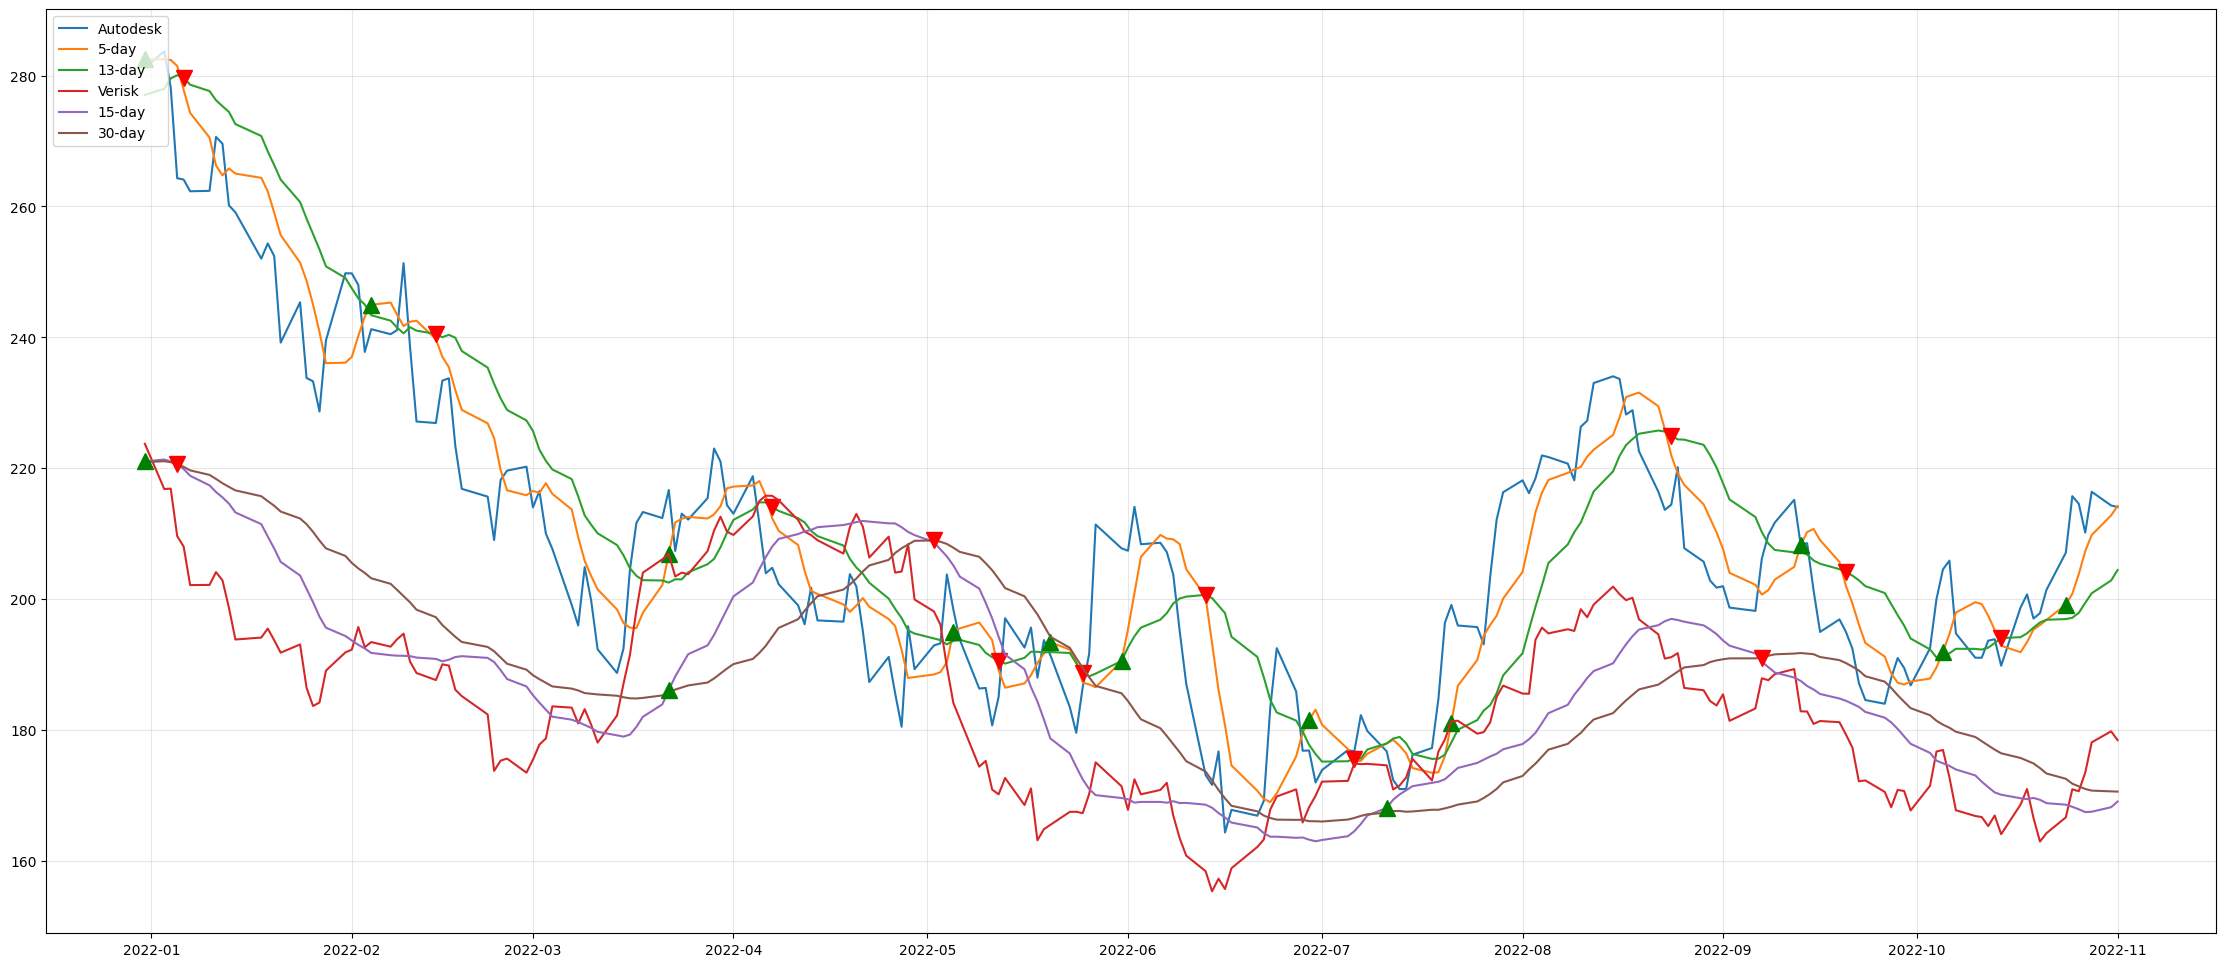

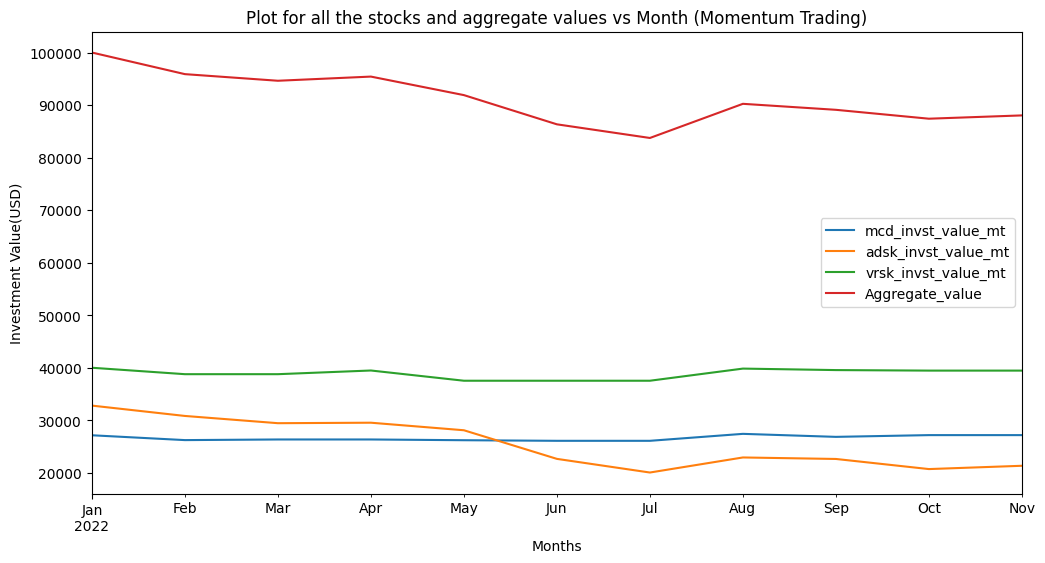

In [177]:
# Plotting the Stock value and Aggregate Value of the Investment at the beginning of each month (for Momentum Trading)
mt_data.plot(title='Plot for all the stocks and aggregate values vs Month (Momentum Trading)',xlabel='Months',ylabel='Investment Value(USD)',figsize=(12,6))
plt.show()

* We can see that the aggregate value and position value for Autodesk have decreased over the period, whereas Verisk and McDonald's stocks have only very slight changes in their position values towards the end.

## **Investing in S&P 500** 

In [180]:
import yfinance as yf

# Creating a ticker for S&P 500
tickers_list = ['^GSPC']
sp = {}

# Pulling historical monthly price data from Dec 31, 2021 to Nov 2, 2022
for ticker in tickers_list:
    try:
        df = yf.download(ticker, start='2021-12-31', end='2022-11-02', interval='1mo')
        if not df.empty:
            sp[ticker] = df
            print(f"{ticker} Data Downloaded")
        else:
            print(f"{ticker} No data returned")
    except Exception as e:
        print(f"{ticker} Error: {e}")


/var/folders/_g/25m8yggn3vdg8k5t4s6rks9c0000gn/T/ipykernel_11921/1676377700.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2021-12-31', end='2022-11-02', interval='1mo')
[*********************100%***********************]  1 of 1 completed

^GSPC Data Downloaded


In [181]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store the data
SP500 = pd.DataFrame()

# Using all the Tickers to add data to the DataFrame created
for i in tickers_list[0:]:
  SP500[i] = pd.DataFrame(sp[i]['Close'])

In [182]:
# Printing the First 5 rows of the DataFrame
SP500.head()

^GSPC
Date                   
2022-01-01  4515.549805
2022-02-01  4373.939941
2022-03-01  4530.410156
2022-04-01  4131.930176
2022-05-01  4132.149902

In [183]:
# Renaming the Column to 'Price'
SP500=SP500.rename(columns={'^GSPC':'Price'})

In [184]:
# Adding a Variable for Percentage Difference
SP500['PercDiff']=SP500['Price'].pct_change()

In [185]:
# Filling Null Values with 0
SP500=SP500.fillna(0)

In [186]:
# Adding a Variable for Investment Value
SP500['Invst_Value']=100000*(1+SP500['PercDiff'])

### **Value of Investment at the Beginning of Each Month (Investing $100,000 in S&P Index)**

In [187]:
# Printing Value of Investment at the Beginning of Each Month (Investing $100,000 in S&P Index)
SP500

Price  PercDiff    Invst_Value
Date                                            
2022-01-01  4515.549805  0.000000  100000.000000
2022-02-01  4373.939941 -0.031360   96863.950805
2022-03-01  4530.410156  0.035773  103577.328837
2022-04-01  4131.930176 -0.087957   91204.328820
2022-05-01  4132.149902  0.000053  100005.317770
2022-06-01  3785.379883 -0.083920   91608.000007
2022-07-01  4130.290039  0.091116  109111.639173
2022-08-01  3955.000000 -0.042440   95755.987173
2022-09-01  3585.620117 -0.093396   90660.432799
2022-10-01  3871.979980  0.079863  107986.341384
2022-11-01  4080.110107  0.053753  105375.289335

* The value of the investment on November 1st 2022 (when invested in S&P 500) is **$105,375.**

* Hence, we can say that the Portfolio did not do better than investing in S&P 500.

## **Comparing Three Strategies** 

In [188]:
# Creating an empty DataFrame to Store the Aggregate Value of Investment at the beginning of each month (for all 3 strategies)
investment_value=pd.DataFrame()

In [189]:
# Adding Variables for Storing Aggregate Values for all three strategies
investment_value['agg_value_buy_and_hold'] = prep_data_3['Aggregate_Value']
investment_value['agg_value_momentum_trading'] = mt_data['Aggregate_value']
investment_value['agg_value_S&P_500'] = SP500['Invst_Value']

In [190]:
# Printing the DataFrame
investment_value

agg_value_buy_and_hold  agg_value_momentum_trading  \
Date                                                             
2022-01-01            99999.999350                99999.980892   
2022-02-01            58483.181004                95886.364543   
2022-03-01            67061.749172                94627.670640   
2022-04-01            62806.472482                95420.125855   
2022-05-01            57081.956104                91895.728552   
2022-06-01            54089.295616                86337.285809   
2022-07-01            61486.229108                83740.350894   
2022-08-01            59698.987961                90238.897782   
2022-09-01            54607.210695                89098.159516   
2022-10-01            59619.261483                87406.864401   
2022-11-01            58952.675140                88033.751627   

            agg_value_S&P_500  
Date                           
2022-01-01      100000.000000  
2022-02-01       96863.950805  
2022-03-01      103577.328837  
2022-04-01       91204.328820  
2022-05-01      100005.317770  
2022-06-01       91608.000007  
2022-07-01      109111.639173  
2022-08-01       95755.987173  
2022-09-01       90660.432799  
2022-10-01      107986.341384  
2022-11-01      105375.289335

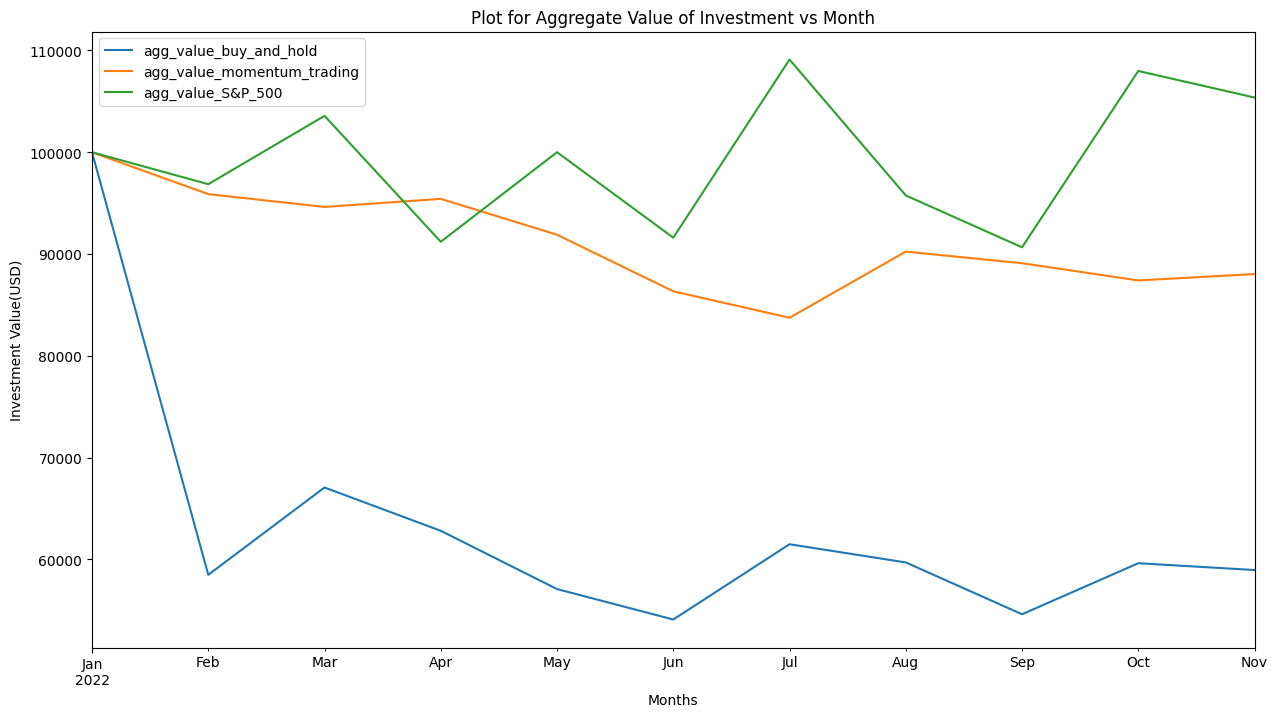

In [191]:
# Plotting the Aggregate Value of the Investment at the beginning of each month (for all 3 strategies)
investment_value.plot(title='Plot for Aggregate Value of Investment vs Month',xlabel='Months',ylabel='Investment Value(USD)',figsize=(15,8))
plt.show()

* For the Buy_and_Hold strategy, the Aggregate Value of the investment on November 1st 2022 was **$93,253.**

* For the Momentum Trading strategy, the Aggregate Value of the investment on November 1st 2022 was **$88,033.**

* If we invested in S&P 500 index, the Aggregate Value of the investment on November 1st 2022 was **$105,375.**

* **Therefore, we can conclude that if we used the 'Buy & Hold Strategy' or the 'Momentum Trading Strategy' based on the chosen portfolio allocation, we would be losing money. However, if we invest in S&P 500 index, we would make a profit of approx $5,375.**.

# **5) Conclusions**

### **Takeaways**

* For the Portfolio Allocation Model, we have used binary constraints to ensure that we select one and only one stock from each sector.

* From the models we learned that, by decreasing the max limit for risk and reducing the step size gave us good results as the data collected is on a daily basis (for 5 years). Using the parameter analysis, the optimal risk was chosen, and was used for further analysis.

* We considered 5 different pairs of values of moving averages to determin the best Momentum Trading Strategy for each stock. The best strategy for each stock was decided based on the system return value for all the combinations.

* Based on the analysis for 2022, we got to know that 'Buy and Hold' strategy worked better for the chosen portfolio on the whole when compared to Momentum Trading strategy.

* Coming to Individual stocks, for Verisk, the Momentum Trading Strategy worked better than Buy and Hold Strategy. For the other two stocks (McDonald's & Autodesk), Buy and Hold strategt worked better than Momentum Trading Strategy.

* During the course of this project, we got to learn more about various terms in the stock market and how a strategy could be used to an investor's advantage.

* Investment strategies play a vital role for investors; they can be goal-oriented and hence can help the investors make investment decisions based on their goals. The best investing strategies are the ones that have higher returns & lower risks. However, there is always a trade-off.

* The obtained strategy may vary on several factors, including but not limited to, one’s investment goals such as short term or long term, asset sector considered, the timeframe considered, and the risk ceiling considered. 